# Microsoft Malware Prediction

## Importación de librerías 

In [1071]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')
pd.set_option('display.max_rows', 500)
pd.options.display.float_format = '{:,.2f}'.format

from sklearn import preprocessing

from sklearn import model_selection
from sklearn import metrics 

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz
from sklearn.metrics import confusion_matrix


In [3]:
from sklearn import __version__ as sklearn_version
print('La versión instalada de scikit-learn es {}.'.format(sklearn_version))

La versión instalada de scikit-learn es 0.21.3.


## Importación de datos 

Importaremos el Dataset de trabajo:

In [600]:
df = pd.read_csv('sample_mmp.csv', sep=',', encoding='utf-8', index_col=False, skipinitialspace=True)

C:\Users\charl\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (29,42) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Este warning, según stackoverflow tiene que ver con lo complejo del proceso de determinar el tipo de variable.

## MLC2: Data Understanding and Data Preparation

### MLC2.1: Análisis Univariante de datos

#### Tamaño del dataset

In [601]:
df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Columns: 84 entries, Unnamed: 0 to HasDetections
dtypes: float64(36), int64(18), object(30)
memory usage: 320.4+ MB


Podemos ver 500000 registros y 84 atributos. Valores conformados pro float64, int64 y objects (Categóricas)

#### Visualización directa de los datos

In [602]:
df.head(4).T

,0,1,2,3
Unnamed: 0,8427007,8829090,2731904,1359513
MachineIdentifier,f1cd864e97bae82bdf96523e1a539121,fd5ba6f5b75325ec0423a6c67cc75942,4e628391e7cc7c482fb3286f486dbd25,270a2e9d028144a4df12a9e3da79fba5
ProductName,win8defender,win8defender,win8defender,win8defender
EngineVersion,1.1.15100.1,1.1.15100.1,1.1.15100.1,1.1.15200.1
AppVersion,4.18.1807.18075,4.18.1807.18075,4.9.10586.1106,4.18.1807.18075
AvSigVersion,1.273.1234.0,1.273.1282.0,1.273.781.0,1.275.1639.0
IsBeta,0,0,0,0
RtpStateBitfield,7.00,7.00,7.00,7.00
IsSxsPassiveMode,0,0,0,0
DefaultBrowsersIdentifier,NaN,NaN,NaN,NaN


In [603]:
df.tail(4).T

,499996,499997,499998,499999
Unnamed: 0,5740034,8819786,8713685,4295573
MachineIdentifier,a4c232d528d98343e8f1b73650da7b82,fd16cd542d660848d272e4552bcccb1e,fa0841f8f6147de7c3d287e05270ed42,7b45dc3537e17f16305c5983ca0a1cb9
ProductName,win8defender,win8defender,win8defender,win8defender
EngineVersion,1.1.15100.1,1.1.15300.5,1.1.15100.1,1.1.15100.1
AppVersion,4.18.1807.18075,4.13.17134.112,4.14.17639.18041,4.18.1807.18075
AvSigVersion,1.273.1620.0,1.275.1343.0,1.273.483.0,1.273.1644.0
IsBeta,0,0,0,0
RtpStateBitfield,7.00,7.00,7.00,7.00
IsSxsPassiveMode,0,0,0,0
DefaultBrowsersIdentifier,NaN,NaN,NaN,NaN


Ya podemos ver columnas como el Unnamed que sirven como index del dataset pero no será utilizado aquí. Se debe borrar. Por otro lado, el MachineIdentifier también funciona como Index y no genera ningún valor al modelo, se puede borrar. 

Analizamos todas las variables explicadas segun el Kaggle en un documento anexo:

Borramos la columnas Unnamed y MachineIdentifier

In [604]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [605]:
df['MachineIdentifier'].nunique()

500000

In [606]:
df.drop('MachineIdentifier', axis=1, inplace=True)

In [607]:
df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Columns: 82 entries, ProductName to HasDetections
dtypes: float64(36), int64(17), object(29)
memory usage: 312.8+ MB


In [608]:
df.head().T

,0,1,2,3,4
ProductName,win8defender,win8defender,win8defender,win8defender,win8defender
EngineVersion,1.1.15100.1,1.1.15100.1,1.1.15100.1,1.1.15200.1,1.1.15200.1
AppVersion,4.18.1807.18075,4.18.1807.18075,4.9.10586.1106,4.18.1807.18075,4.18.1807.18075
AvSigVersion,1.273.1234.0,1.273.1282.0,1.273.781.0,1.275.1639.0,1.275.511.0
IsBeta,0,0,0,0,0
RtpStateBitfield,7.00,7.00,7.00,7.00,7.00
IsSxsPassiveMode,0,0,0,0,0
DefaultBrowsersIdentifier,NaN,NaN,NaN,NaN,NaN
AVProductStatesIdentifier,"53,447.00","53,447.00","46,781.00","53,447.00","47,238.00"
AVProductsInstalled,1.00,1.00,2.00,1.00,2.00


#### Tipo de atributos disponibles

In [609]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 82 columns):
ProductName                                          500000 non-null object
EngineVersion                                        500000 non-null object
AppVersion                                           500000 non-null object
AvSigVersion                                         500000 non-null object
IsBeta                                               500000 non-null int64
RtpStateBitfield                                     498168 non-null float64
IsSxsPassiveMode                                     500000 non-null int64
DefaultBrowsersIdentifier                            24061 non-null float64
AVProductStatesIdentifier                            498062 non-null float64
AVProductsInstalled                                  498062 non-null float64
AVProductsEnabled                                    498062 non-null float64
HasTpm                                             

#### Estadísticos descriptivos


In [610]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
IsBeta,"500,000.00",0.00,0.00,0.00,0.00,0.00,0.00,1.00
RtpStateBitfield,"498,168.00",6.85,1.02,0.00,7.00,7.00,7.00,35.00
IsSxsPassiveMode,"500,000.00",0.02,0.13,0.00,0.00,0.00,0.00,1.00
DefaultBrowsersIdentifier,"24,061.00","1,652.82","1,004.75",1.00,788.00,"1,632.00","2,381.00","3,209.00"
AVProductStatesIdentifier,"498,062.00","47,850.91","14,023.09",3.00,"49,480.00","53,447.00","53,447.00","70,492.00"
AVProductsInstalled,"498,062.00",1.33,0.52,1.00,1.00,1.00,2.00,5.00
AVProductsEnabled,"498,062.00",1.02,0.17,0.00,1.00,1.00,1.00,4.00
HasTpm,"500,000.00",0.99,0.11,0.00,1.00,1.00,1.00,1.00
CountryIdentifier,"500,000.00",108.04,63.07,1.00,51.00,97.00,162.00,222.00
CityIdentifier,"481,760.00","81,271.65","48,985.13",7.00,"36,825.00","82,373.00","123,939.50","167,958.00"


In [611]:
df.describe(include=['object']).T

,count,unique,top,freq
ProductName,500000,3,win8defender,494604
EngineVersion,500000,53,1.1.15200.1,216491
AppVersion,500000,95,4.18.1807.18075,288809
AvSigVersion,500000,6455,1.273.1420.0,5771
Platform,500000,4,windows10,483048
Processor,500000,3,x64,454423
OsVer,500000,21,10.0.0.0,483830
OsPlatformSubRelease,500000,9,rs4,220779
OsBuildLab,499999,453,17134.1.amd64fre.rs4_release.180410-1804,206436
SkuEdition,500000,8,Home,308567


#### Número de valores nulos

In [612]:
df.select_dtypes(include='number').isnull().sum()

IsBeta                                                    0
RtpStateBitfield                                       1832
IsSxsPassiveMode                                          0
DefaultBrowsersIdentifier                            475939
AVProductStatesIdentifier                              1938
AVProductsInstalled                                    1938
AVProductsEnabled                                      1938
HasTpm                                                    0
CountryIdentifier                                         0
CityIdentifier                                        18240
OrganizationIdentifier                               154563
GeoNameIdentifier                                        16
LocaleEnglishNameIdentifier                               0
OsBuild                                                   0
OsSuite                                                   0
IsProtected                                            1926
AutoSampleOptIn                         

In [613]:
df.select_dtypes(include='object').isnull().sum()

ProductName                              0
EngineVersion                            0
AppVersion                               0
AvSigVersion                             0
Platform                                 0
Processor                                0
OsVer                                    0
OsPlatformSubRelease                     0
OsBuildLab                               1
SkuEdition                               0
PuaMode                             499874
SmartScreen                         178596
Census_MDC2FormFactor                    0
Census_DeviceFamily                      0
Census_ProcessorClass               497918
Census_PrimaryDiskTypeName             709
Census_ChassisTypeName                  37
Census_PowerPlatformRoleName             2
Census_InternalBatteryType          355603
Census_OSVersion                         0
Census_OSArchitecture                    0
Census_OSBranch                          0
Census_OSEdition                         0
Census_OSSk

#### Resumen descriptivo y borrado de atributos 

In [614]:
stats = []
for col in df.columns:
    stats.append((col, df[col].nunique(), df[col].isnull().sum() * 100 / df.shape[0], df[col].value_counts(normalize=True, dropna=False).values[0] * 100, df[col].dtype))
    
stats_df = pd.DataFrame(stats, columns=['Feature', 'Unique_values', '% de nulos', '% de rep. mayor valor', 'type'])
stats_df.sort_values('% de nulos', ascending=False)

,Feature,Unique_values,% de nulos,% de rep. mayor valor,type
27,PuaMode,1,99.97,99.97,object
40,Census_ProcessorClass,3,99.58,99.58,object
7,DefaultBrowsersIdentifier,554,95.19,95.19,float64
67,Census_IsFlightingInternal,2,83.05,83.05,float64
51,Census_InternalBatteryType,28,71.12,71.12,object
70,Census_ThresholdOptIn,2,63.62,63.62,float64
74,Census_IsWIMBootEnabled,1,63.53,63.53,float64
30,SmartScreen,12,35.72,48.32,object
14,OrganizationIdentifier,44,30.91,46.98,float64
28,SMode,2,5.97,93.99,float64


Creo que en este caso deberíamos borrar varios atributos que, creo, no generan valor para el anáilisis. Aunque el decision tree es muy flexible.
- PuaMode y Census_ProcessorClass por tener más del 99& de valores vacios.


In [615]:
stats = []
for col in df.columns:
    stats.append((col, df[col].nunique(), df[col].isnull().sum() * 100 / df.shape[0], df[col].value_counts(normalize=True, dropna=False).values[0] * 100, df[col].dtype))
    
stats_df = pd.DataFrame(stats, columns=['Feature', 'Unique_values', '% de nulos', '% de rep. mayor valor', 'type'])
stats_df.sort_values('% de rep. mayor valor', ascending=False)

,Feature,Unique_values,% de nulos,% de rep. mayor valor,type
4,IsBeta,2,0.00,100.00,int64
26,AutoSampleOptIn,2,0.00,100.00,int64
27,PuaMode,1,99.97,99.97,object
64,Census_IsPortableOperatingSystem,2,0.00,99.95,int64
34,Census_DeviceFamily,3,0.00,99.84,object
40,Census_ProcessorClass,3,99.58,99.58,object
32,UacLuaenable,5,0.12,99.26,float64
75,Census_IsVirtualDevice,2,0.18,99.11,float64
0,ProductName,3,0.00,98.92,object
11,HasTpm,2,0.00,98.78,int64


Aquí aparecen varios atributos con con un % muy elevado de un único valor:
- IsBeta, AutoSampleOptIn. 
Se dejan los demás por el algoritmo que utilizaremos. 

In [616]:
df.drop(['IsBeta', 'AutoSampleOptIn', 'PuaMode', 'Census_ProcessorClass'], axis=1, inplace=True)

#### Duplicados

In [617]:
df[df.duplicated(keep=False)]

,ProductName,EngineVersion,AppVersion,AvSigVersion,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,...,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
4337,win8defender,1.1.15200.1,4.18.1807.18075,1.275.11.0,7.00,0,nan,"53,447.00",1.00,1.00,...,"57,723.00",1,nan,0.00,0,0,0.00,0.00,3.00,0
15396,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1494.0,7.00,0,nan,"53,447.00",1.00,1.00,...,"44,624.00",1,nan,0.00,0,0,0.00,0.00,10.00,1
15841,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1198.0,7.00,0,nan,"53,447.00",1.00,1.00,...,"51,023.00",1,nan,0.00,0,0,0.00,1.00,3.00,1
17354,win8defender,1.1.13504.0,4.11.15063.0,1.237.0.0,7.00,0,"3,195.00","53,447.00",1.00,1.00,...,"9,599.00",0,nan,0.00,0,0,0.00,1.00,10.00,0
21260,win8defender,1.1.15200.1,4.18.1807.18075,1.275.850.0,7.00,0,nan,"53,447.00",1.00,1.00,...,"13,790.00",0,nan,0.00,0,0,0.00,0.00,15.00,0
29043,win8defender,1.1.15200.1,4.12.16299.15,1.275.767.0,7.00,0,nan,"15,911.00",2.00,1.00,...,"46,890.00",1,nan,0.00,0,0,0.00,0.00,3.00,0
33176,win8defender,1.1.13504.0,4.11.15063.0,1.237.0.0,7.00,0,"3,195.00","53,447.00",1.00,1.00,...,"9,599.00",0,nan,0.00,0,0,0.00,1.00,10.00,0
35132,win8defender,1.1.14104.0,4.12.16299.15,1.251.42.0,7.00,0,"2,064.00","53,447.00",1.00,1.00,...,nan,1,nan,0.00,0,0,nan,0.00,3.00,0
36789,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1494.0,7.00,0,nan,"53,447.00",1.00,1.00,...,"44,624.00",1,nan,0.00,0,0,0.00,0.00,10.00,1
37665,win8defender,1.1.15200.1,4.18.1807.18075,1.275.197.0,7.00,0,nan,"53,447.00",1.00,1.00,...,"7,134.00",0,nan,0.00,0,0,0.00,0.00,7.00,0


In [618]:
#df.drop_duplicates(inplace=True)

Aunque muestra duplicados, en realidad las filas son diferentes. 

#### Distribución de los valores del target

In [619]:
df['HasDetections'].value_counts(dropna=True)

0    250047
1    249953
Name: HasDetections, dtype: int64

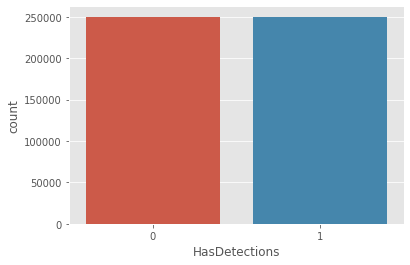

In [620]:
sns.countplot(data=df, x='HasDetections')

En este caso, el Target no requiere modificaciones ya que se encuentra como 0 = NoDetection 1 = Detection.

Parece también, que la muestra del Dataset está muy bien tomada debido a el número ceros vs unos y la media del 50% en el target.

In [621]:
df['HasDetections'].count()

500000

In [622]:
df['HasDetections'].sum()

249953

In [623]:
df['HasDetections'].mean()

0.499906

#### Identificación de Outliers/Datos erróneos/Correlación de variables con target/Correlación de variables con la clase/Visualización/ Limpieza de variables.

###### Atributo ProductName

Es un atributo categórico, que representa los nombres de los Windows Defender.

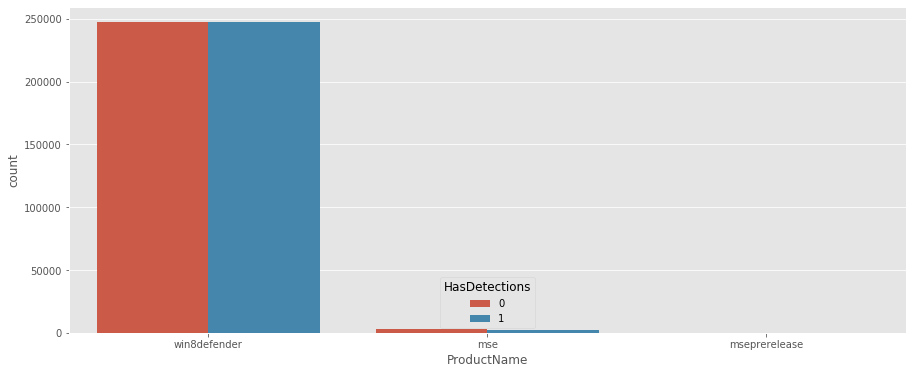

In [624]:
plt.figure(figsize= [15, 6])
sns.countplot(data=df, x='ProductName', hue='HasDetections')

In [625]:
pd.crosstab(df['ProductName'], df['HasDetections'])

HasDetections,0,1
ProductName,,
mse,2809,2586
mseprerelease,1,0
win8defender,247237,247367


No tiene casi ninguna correlación con el target.Se puede borrar o dejar por utilizar arbol de decisiones.
Por comodidad, pasaré el mseprelease a mse ya que tiene un solo valor.

In [626]:
df.loc[df['ProductName']=='mseprerelease', 'ProductName'] = 'mse'

In [627]:
pd.crosstab(df['ProductName'], df['HasDetections'])

HasDetections,0,1
ProductName,,
mse,2810,2586
win8defender,247237,247367


##### Atributo EngineVersion

Es un atributo categórico, que representa la versión del sistema de seguridad.

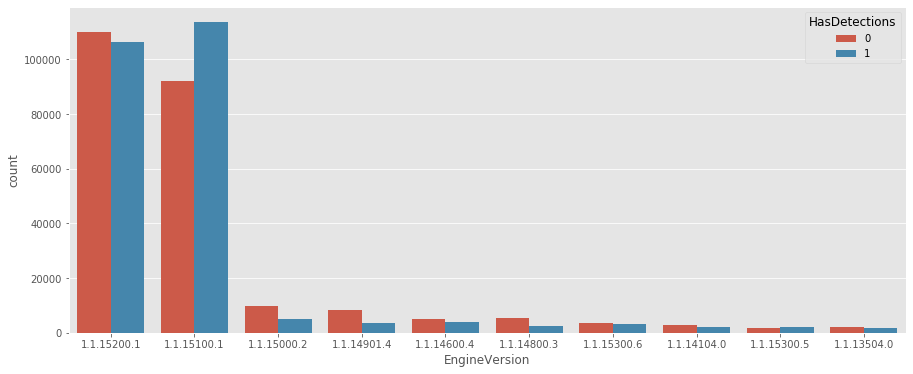

In [628]:
plt.figure(figsize= [15, 6])
sns.countplot(data=df, x='EngineVersion', hue='HasDetections', order=pd.value_counts(df['EngineVersion']).iloc[:10].index)

In [629]:
df['EngineVersion'].value_counts(normalize=False, dropna=False).head(15)

1.1.15200.1    216491
1.1.15100.1    205494
1.1.15000.2     14752
1.1.14901.4     11984
1.1.14600.4      9005
1.1.14800.3      7548
1.1.15300.6      6769
1.1.14104.0      5240
1.1.15300.5      3883
1.1.13504.0      3876
1.1.14700.5      2593
1.1.14500.5      2591
1.1.14405.2      1972
1.1.14306.0      1329
1.1.14202.0       840
Name: EngineVersion, dtype: int64

In [630]:
pd.crosstab(df['EngineVersion'], df['HasDetections']).sort_values(0, ascending=False).head(10)

HasDetections,0,1
EngineVersion,,
1.1.15200.1,110038,106453
1.1.15100.1,91937,113557
1.1.15000.2,9711,5041
1.1.14901.4,8314,3670
1.1.14800.3,5242,2306
1.1.14600.4,5019,3986
1.1.15300.6,3482,3287
1.1.14104.0,2942,2298
1.1.13504.0,2170,1706


In [631]:
df['EngineVersion'].nunique()

53

Existe correlación y podría generarse una agrupación de valores. Se tomarán los primeros 12 valores


In [632]:
#agrupar = df['EngineVersion'].value_counts(normalize=True, dropna=False).index[12:]

In [633]:
#df.loc[df['EngineVersion'].isin(agrupar) == True, 'EngineVersion'] = 'Resto'

In [634]:
#df['EngineVersion'].value_counts(normalize=True, dropna=False).head(15)

Para no perder información, posteriormente se cambió la estrategia y se dejaron los valores como estaban. 

##### Atributo AppVersión

Es un atributo categórico, que representa la versión del app.

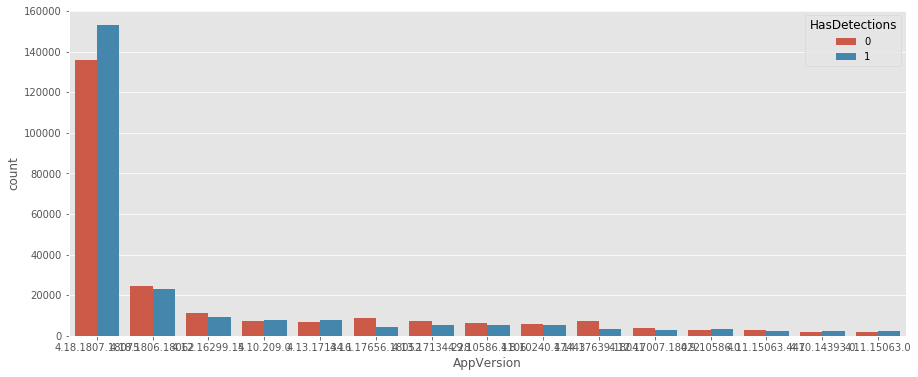

In [635]:
plt.figure(figsize= [15, 6])
sns.countplot(data=df, x='AppVersion', hue='HasDetections', order=pd.value_counts(df['AppVersion']).iloc[:15].index)

La correlación importante se ve en el valor que tiene mayor frequencia.

In [638]:
df.pivot_table(index='AppVersion', values='HasDetections', aggfunc=[len, sum, np.mean])

,len,sum,mean
,HasDetections,HasDetections,HasDetections
AppVersion,,,
4.10.14393.0,4399,2332,0.53
4.10.14393.1066,404,192,0.48
4.10.14393.1198,1271,653,0.51
4.10.14393.1532,7,4,0.57
4.10.14393.1593,536,278,0.52
4.10.14393.1613,760,360,0.47
4.10.14393.1794,2425,1157,0.48
4.10.14393.2248,14,4,0.29


In [639]:
pd.crosstab(df['AppVersion'], df['HasDetections'])

HasDetections,0,1
AppVersion,,
4.10.14393.0,2067,2332
4.10.14393.1066,212,192
4.10.14393.1198,618,653
4.10.14393.1532,3,4
4.10.14393.1593,258,278
4.10.14393.1613,400,360
4.10.14393.1794,1268,1157
4.10.14393.2248,10,4
4.10.14393.2273,19,35


In [640]:
df['AppVersion'].value_counts(normalize=False, dropna=False).head(20)

4.18.1807.18075     288809
4.18.1806.18062      47641
4.12.16299.15        20197
4.10.209.0           15292
4.13.17134.1         14414
4.16.17656.18052     13185
4.13.17134.228       12729
4.9.10586.1106       11432
4.8.10240.17443      11385
4.14.17639.18041     10670
4.12.17007.18022      6470
4.9.10586.0           6213
4.11.15063.447        5100
4.10.14393.0          4399
4.11.15063.0          3874
4.12.17007.18011      3392
4.14.17613.18039      2991
4.8.10240.16384       2617
4.11.15063.1155       2477
4.10.14393.1794       2425
Name: AppVersion, dtype: int64

In [641]:
df['AppVersion'].nunique()

95

Existe correlación con el target. Se agruparán los valores a partir del índice 18, donde el % es 0.

In [642]:
#agrupar = df['AppVersion'].value_counts(normalize=True, dropna=False).index[18:]

In [643]:
#df.loc[df['AppVersion'].isin(agrupar) == True, 'AppVersion'] = 'Resto'

In [644]:
#df['AppVersion'].value_counts(normalize=True, dropna=False).head(20)

Para no perder información, posteriormente se cambió la estrategia y se dejaron los valores como estaban. 

##### Atributo AvSigVersion

Es un atributo categórico, que representa otra versión.

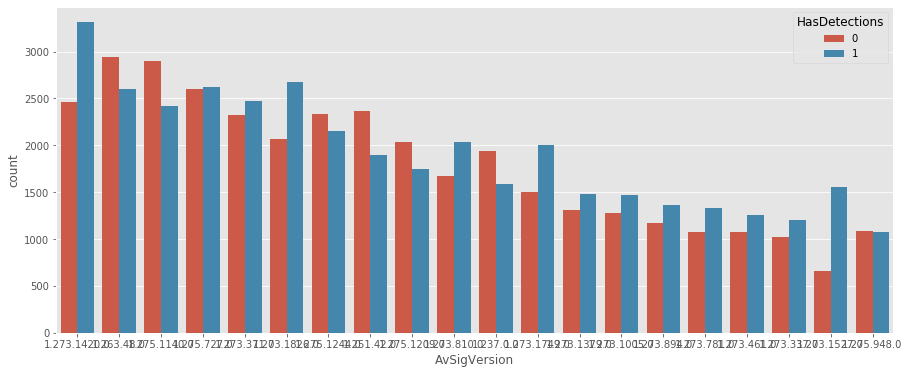

In [645]:
plt.figure(figsize= [15, 6])
sns.countplot(data=df, x='AvSigVersion', hue='HasDetections', order=pd.value_counts(df['AvSigVersion']).iloc[:20].index)

In [646]:
pd.crosstab(df['AvSigVersion'], df['HasDetections'])

HasDetections,0,1
AvSigVersion,,
0.0.0.0,4,0
1.169.55.0,1,0
1.199.1615.0,1,2
1.207.1891.0,0,1
1.207.2950.0,3,3
...,...,...
1.277.51.0,241,170
1.277.58.0,51,25
1.277.62.0,45,35


In [647]:
df['AvSigVersion'].value_counts(normalize=False, dropna=False).head(20)

1.273.1420.0    5771
1.263.48.0      5537
1.275.1140.0    5317
1.275.727.0     5214
1.273.371.0     4799
1.273.1826.0    4744
1.275.1244.0    4487
1.251.42.0      4258
1.275.1209.0    3787
1.273.810.0     3708
1.237.0.0       3534
1.273.1749.0    3508
1.273.1379.0    2789
1.273.1005.0    2747
1.273.894.0     2540
1.273.781.0     2409
1.273.461.0     2332
1.273.337.0     2219
1.273.1527.0    2218
1.275.948.0     2170
Name: AvSigVersion, dtype: int64

In [648]:
df['AvSigVersion'].nunique()

6455

Existe correlación con el target. Se agruparán los valores a partir del índice 15, donde el % es 0.

In [649]:
#agrupar = df['AvSigVersion'].value_counts(normalize=True, dropna=False).index[15:]

In [650]:
#df.loc[df['AvSigVersion'].isin(agrupar) == True, 'AvSigVersion'] = 'Resto'

In [651]:
#df['AvSigVersion'].value_counts(normalize=True, dropna=False).head(20)

Para no perder información, posteriormente se cambió la estrategia y se dejaron los valores como estaban. También porque para este atributo se usará el Mean Encoding y será menos necesario la agrupación.

##### Atributo RtpStateBitfield

Atributo sin información. No sabemos si es numérica o categórica. Investigando parece numérica

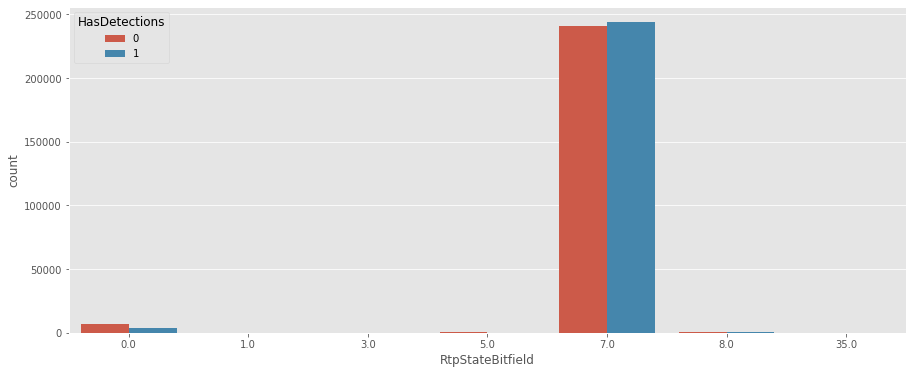

In [652]:
plt.figure(figsize= [15, 6])
sns.countplot(data=df, x='RtpStateBitfield', hue='HasDetections')

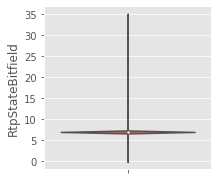

In [653]:
plt.figure(figsize= [3, 3])
sns.violinplot(data=df, y='RtpStateBitfield', hue='HasDetections')

In [654]:
pd.crosstab(df['RtpStateBitfield'], df['HasDetections']).sort_values(0, ascending=False)

HasDetections,0,1
RtpStateBitfield,,
7.00,240986,243855
0.00,6567,4043
5.00,983,175
8.00,299,978
3.00,127,49
1.00,71,34
35.00,0,1


Existe correlación interesante para el modelo, solo nos encontramos con el 35 que parece un outlier con frecuencia 1. Se limpiará para optimizar el OHE. 

In [655]:
df['RtpStateBitfield'].value_counts(normalize=True, dropna=False).head(20)

7.00    0.97
0.00    0.02
nan     0.00
8.00    0.00
5.00    0.00
3.00    0.00
1.00    0.00
35.00   0.00
Name: RtpStateBitfield, dtype: float64

In [656]:
df['RtpStateBitfield'].fillna(df["RtpStateBitfield"].median(), inplace=True)

In [657]:
df.loc[df['RtpStateBitfield'] == 35, 'RtpStateBitfield'] = df["RtpStateBitfield"].median()

In [658]:
df['RtpStateBitfield'].astype(int)

0         7
1         7
2         7
3         7
4         7
         ..
499995    7
499996    7
499997    7
499998    7
499999    7
Name: RtpStateBitfield, Length: 500000, dtype: int32

##### Atributo IsSxsPassiveMode

Atributo booleano. PassiveMode es al parecer un sistema de protección de Windows.

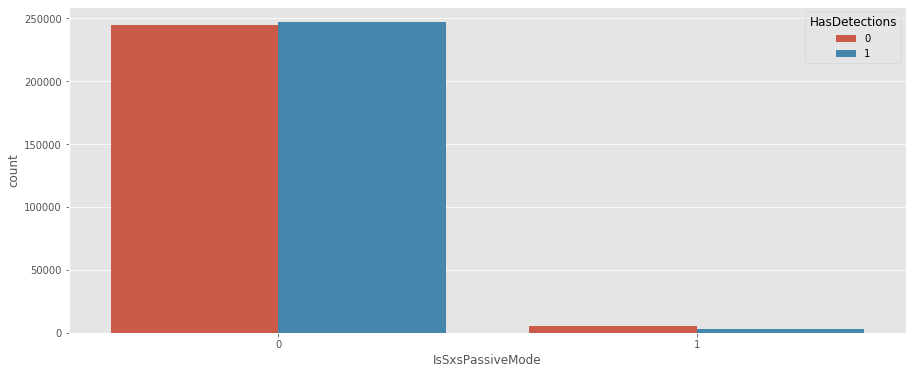

In [659]:
plt.figure(figsize= [15, 6])
sns.countplot(data=df, x='IsSxsPassiveMode', hue='HasDetections')

In [660]:
pd.crosstab(df['IsSxsPassiveMode'], df['HasDetections'])

HasDetections,0,1
IsSxsPassiveMode,,
0,244628,246751
1,5419,3202


Tiene algo de correlación. Pocos valores True/1 pero se deja.

##### Atributo DefaultBrowsersIdentifier

Tiene una gran cantidad de nulos. Es cuantitativa.

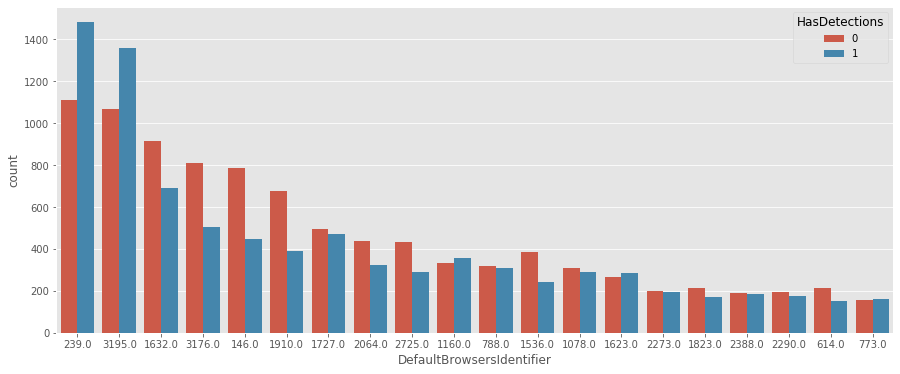

In [661]:
plt.figure(figsize= [15, 6])
sns.countplot(data=df, x='DefaultBrowsersIdentifier', hue='HasDetections', order=pd.value_counts(df['DefaultBrowsersIdentifier']).iloc[:20].index)

In [662]:
df['DefaultBrowsersIdentifier'].value_counts(dropna=False).head(20)

nan         475939
239.00        2589
3,195.00      2423
1,632.00      1601
3,176.00      1313
146.00        1231
1,910.00      1067
1,727.00       968
2,064.00       760
2,725.00       724
1,160.00       690
788.00         626
1,536.00       623
1,078.00       601
1,623.00       549
2,273.00       392
1,823.00       382
2,388.00       374
2,290.00       372
614.00         366
Name: DefaultBrowsersIdentifier, dtype: int64

In [663]:
df['DefaultBrowsersIdentifier'].nunique()

554

Aunque existe una cantidad exagerada de nulos, se deja el atributo para aprovechar la inf.

Intentaremos agrupar para aplicar un OHE y evitar tantas columnas

In [664]:
list = (df['DefaultBrowsersIdentifier'].value_counts(dropna=True).values > 50)
len(list[list==True])

49

In [665]:
list_1 = df['DefaultBrowsersIdentifier'].value_counts(dropna=True).head(49).index

In [666]:
df.loc[df['DefaultBrowsersIdentifier'].isin(list_1)==False, 'DefaultBrowsersIdentifier'] = 'resto'

En este caso rellenamos los nulos con un valor diferente.

In [667]:
df['DefaultBrowsersIdentifier'].fillna(value=-999, inplace=True)

In [668]:
df['DefaultBrowsersIdentifier'].astype(str)

0         resto
1         resto
2         resto
3         resto
4         resto
          ...  
499995    resto
499996    resto
499997    resto
499998    resto
499999    resto
Name: DefaultBrowsersIdentifier, Length: 500000, dtype: object

##### Atributo AVProductStatesIdentifier

Atributo categórico. Es un ID.

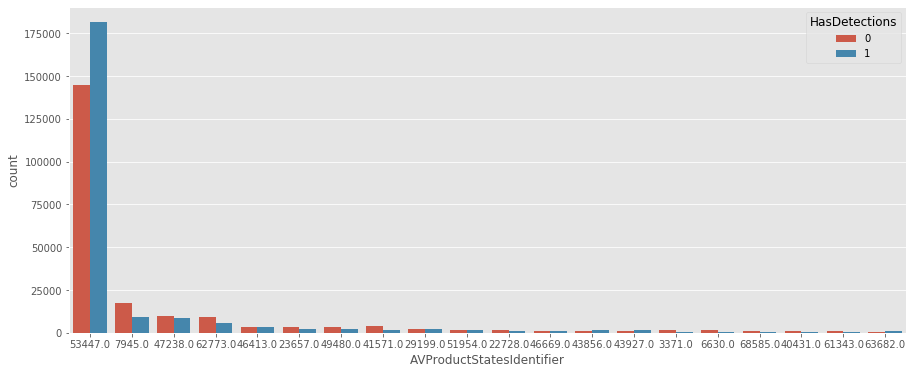

In [669]:
plt.figure(figsize= [15, 6])
sns.countplot(data=df, x='AVProductStatesIdentifier', hue='HasDetections', order=pd.value_counts(df['AVProductStatesIdentifier']).iloc[:20].index)

In [670]:
pd.crosstab(df['AVProductStatesIdentifier'], df['HasDetections']).sort_values(0, ascending=False).head(20)

HasDetections,0,1
AVProductStatesIdentifier,,
"53,447.00",144946,181517
"7,945.00",17286,9356
"47,238.00",9911,8525
"62,773.00",9259,5672
"41,571.00",3829,1643
"49,480.00",3386,2298
"23,657.00",3335,2382
"46,413.00",3234,3109
"29,199.00",2157,2007


In [671]:
df['AVProductStatesIdentifier'].value_counts(normalize=True, dropna=False).head(20)

53,447.00   0.65
7,945.00    0.05
47,238.00   0.04
62,773.00   0.03
46,413.00   0.01
23,657.00   0.01
49,480.00   0.01
41,571.00   0.01
29,199.00   0.01
51,954.00   0.01
22,728.00   0.01
46,669.00   0.01
43,856.00   0.01
43,927.00   0.00
3,371.00    0.00
6,630.00    0.00
nan         0.00
68,585.00   0.00
40,431.00   0.00
61,343.00   0.00
Name: AVProductStatesIdentifier, dtype: float64

In [672]:
df['AVProductStatesIdentifier'].nunique()

5516

Tiene correlación con el target, pero tiene muchos outliers. Realizaré agrupación desde el valor 43.927.00 0.00

In [673]:
#agrupar = df['AVProductStatesIdentifier'].value_counts(normalize=True, dropna=False).index[13:]

In [674]:
#df.loc[df['AVProductStatesIdentifier'].isin(agrupar) == True, 'AVProductStatesIdentifier'] = 'Resto'

In [675]:
#df['AVProductStatesIdentifier'].value_counts(normalize=True, dropna=False).head(20)

Se termina no agrupando para no perder información y porque se aplicará el mean encoding.

In [676]:
df['AVProductStatesIdentifier'].fillna(value='-999', inplace=True)

In [677]:
df['AVProductStatesIdentifier'].astype(str)

0         53447.0
1         53447.0
2         46781.0
3         53447.0
4         47238.0
           ...   
499995    53447.0
499996    53447.0
499997    53447.0
499998    43856.0
499999    53447.0
Name: AVProductStatesIdentifier, Length: 500000, dtype: object

##### Atributo AVProductsInstalled

Atributo numérico. Número de antivirus instalados. 

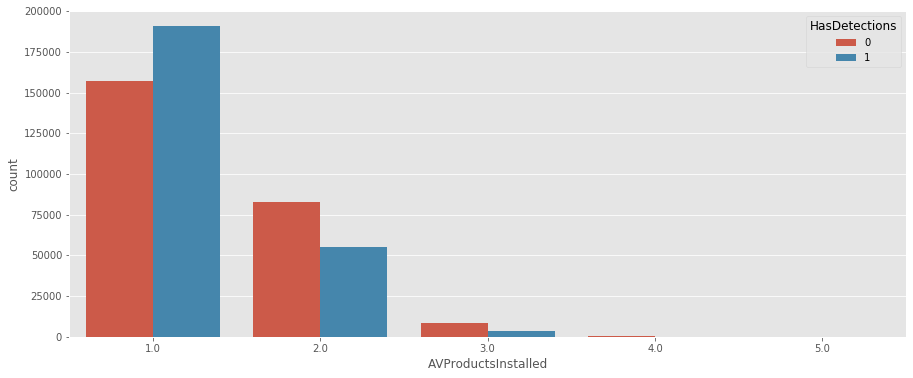

In [678]:
plt.figure(figsize= [15, 6])
sns.countplot(data=df, x='AVProductsInstalled', hue='HasDetections', order=pd.value_counts(df['AVProductsInstalled']).iloc[:20].index)

Interesante ver como al tener dos antivirus la probabilidad de ataque baja. 

In [679]:
df['AVProductsInstalled'].value_counts(normalize=True, dropna=False)

1.00   0.70
2.00   0.28
3.00   0.02
nan    0.00
4.00   0.00
5.00   0.00
Name: AVProductsInstalled, dtype: float64

Existen outliers pero se dejan. La correlación con el target existe. 

In [680]:
df['AVProductsInstalled'].fillna(df['AVProductsInstalled'].median(), inplace=True)

In [681]:
df['AVProductsInstalled'].astype(int)

0         1
1         1
2         2
3         1
4         2
         ..
499995    1
499996    1
499997    1
499998    2
499999    1
Name: AVProductsInstalled, Length: 500000, dtype: int32

##### Atributo AVProductsEnabled

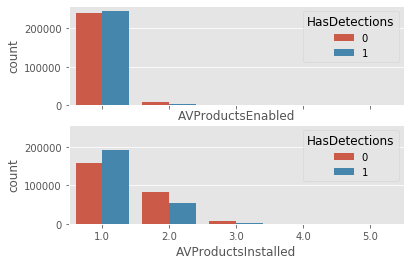

<Figure size 1080x1080 with 0 Axes>

In [682]:
fig, ax =plt.subplots(2, sharex=True, sharey=True)
plt.figure(figsize= [15, 15])
sns.countplot(data=df, x='AVProductsEnabled', hue='HasDetections', order=pd.value_counts(df['AVProductsEnabled']).iloc[:20].index, ax=ax[0])
sns.countplot(data=df, x='AVProductsInstalled', hue='HasDetections', order=pd.value_counts(df['AVProductsInstalled']).iloc[:20].index, ax=ax[1])

Aunque hay mucha gente con dos antivirus, muy pocos tienen los dos funcionando. 

In [683]:
df['AVProductsEnabled'].value_counts(normalize=True, dropna=False)

1.00   0.97
2.00   0.02
nan    0.00
0.00   0.00
3.00   0.00
4.00   0.00
Name: AVProductsEnabled, dtype: float64

In [684]:
pd.crosstab(df['AVProductsEnabled'], df['AVProductsInstalled'])

AVProductsInstalled,1.00,2.00,3.00,4.00,5.00
AVProductsEnabled,,,,,
0.00,826,564,75,2,0
1.00,347220,129699,8034,222,4
2.00,0,7593,3283,185,13
3.00,0,0,225,86,5
4.00,0,0,0,19,7


In [685]:
df['AVProductsEnabled'].fillna(df['AVProductsEnabled'].median(), inplace=True)

In [686]:
df['AVProductsEnabled'].astype(int)

0         1
1         1
2         1
3         1
4         1
         ..
499995    1
499996    1
499997    1
499998    1
499999    1
Name: AVProductsEnabled, Length: 500000, dtype: int32

##### Atributo HasTpm

Valor booleano.

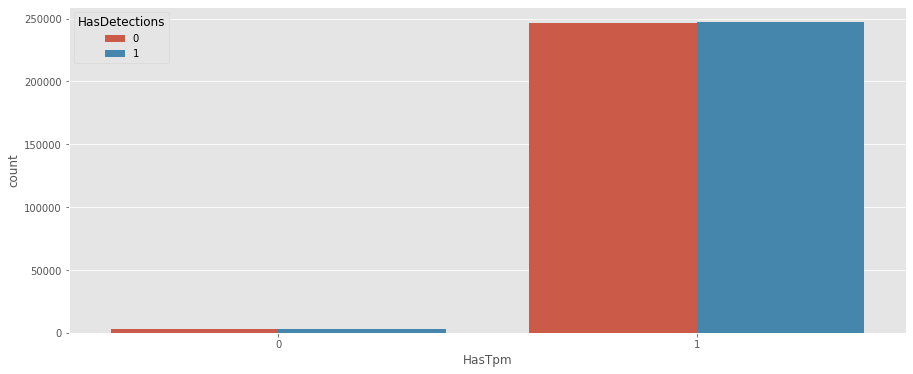

In [687]:
plt.figure(figsize= [15, 6])
sns.countplot(data=df, x='HasTpm', hue='HasDetections')

In [688]:
pd.crosstab(df['HasTpm'], df['HasDetections'])

HasDetections,0,1
HasTpm,,
0,3244,2848
1,246803,247105


Poca correlación. Pocos valores de 0. Se deja y no se cambia nada.

##### Atributo CountryIdentifier

Identificación de países. Es categórica.

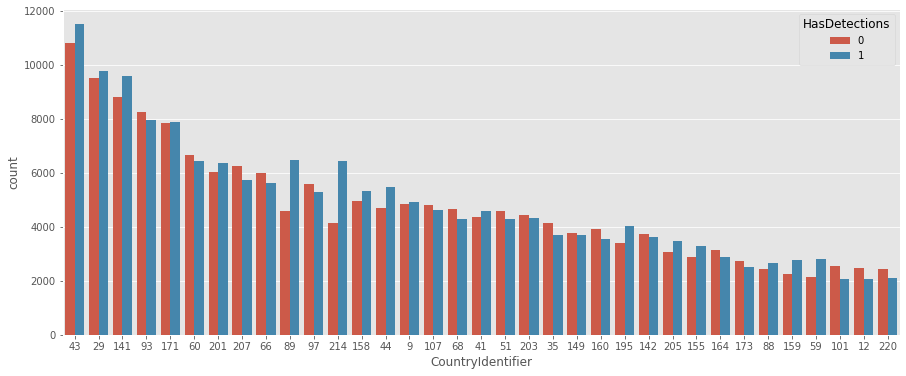

In [689]:
plt.figure(figsize= [15, 6])
sns.countplot(data=df, x='CountryIdentifier', hue='HasDetections', order=pd.value_counts(df['CountryIdentifier']).iloc[:35].index)

Hay países que muestran muchos más detección de malware que no detección. Lástima no saber cuales son. 

In [690]:
df['CountryIdentifier'].value_counts(normalize=True, dropna=False).head(20).sort_values(0)

203   0.02
51    0.02
41    0.02
68    0.02
107   0.02
9     0.02
44    0.02
158   0.02
214   0.02
97    0.02
89    0.02
66    0.02
207   0.02
201   0.02
60    0.03
171   0.03
93    0.03
141   0.04
29    0.04
43    0.04
Name: CountryIdentifier, dtype: float64

No se agrupa para no perder información.

In [691]:
df['CountryIdentifier'].nunique()

222

In [692]:
df['CountryIdentifier'].astype(object)

0           8
1         129
2         149
3         164
4         207
         ... 
499995     85
499996    149
499997     93
499998    195
499999     35
Name: CountryIdentifier, Length: 500000, dtype: object

##### Atributo CityIdentifier

Identificación de ciudades. Es categórica.

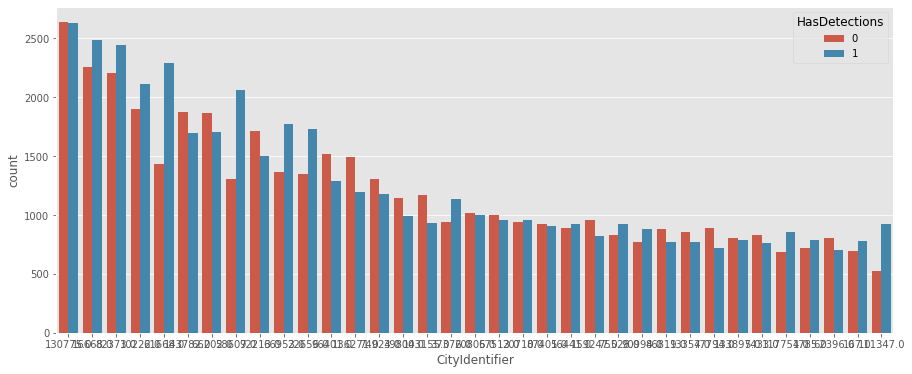

In [693]:
plt.figure(figsize= [15, 6])
sns.countplot(data=df, x='CityIdentifier', hue='HasDetections', order=pd.value_counts(df['CityIdentifier']).iloc[:35].index)

In [694]:
df['CityIdentifier'].value_counts(normalize=True, dropna=False).sort_values(0, ascending=False).head(20).sort_values(0, ascending=False)

nan          0.04
130,775.00   0.01
16,668.00    0.01
82,373.00    0.01
10,222.00    0.01
61,668.00    0.01
143,782.00   0.01
66,202.00    0.01
58,607.00    0.01
92,213.00    0.01
66,953.00    0.01
22,656.00    0.01
96,401.00    0.01
136,271.00   0.01
74,924.00    0.00
39,800.00    0.00
143,155.00   0.00
37,376.00    0.00
20,805.00    0.00
67,513.00    0.00
Name: CityIdentifier, dtype: float64

In [695]:
df['CityIdentifier'].nunique()

37157

Tiene muchos valores únicos.  Como hay mucha inf. en este caso no se va a agrupar y se aplicará el mean encoding.

In [696]:
df['CityIdentifier'].fillna(value='-999', inplace=True)

In [697]:
df['CityIdentifier'].astype(str)

0          85219.0
1          54198.0
2         122689.0
3         114587.0
4          72421.0
            ...   
499995    129210.0
499996     80920.0
499997      4342.0
499998     10222.0
499999    101119.0
Name: CityIdentifier, Length: 500000, dtype: object

##### Atributo OrganizationIdentifier

Variable categórica que identifica la organización. 

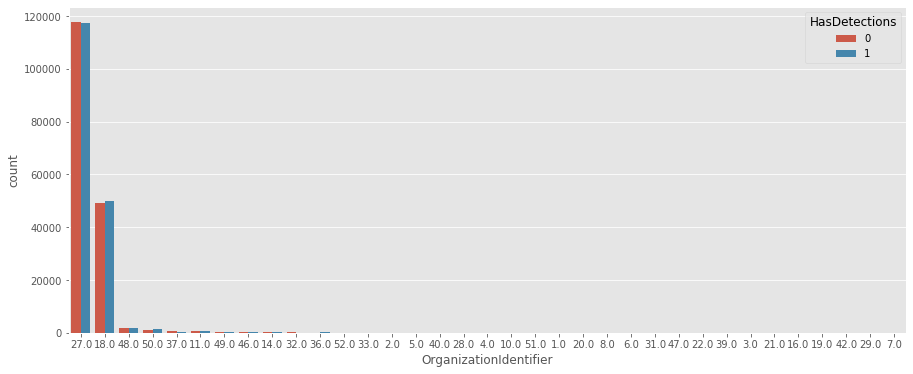

In [698]:
plt.figure(figsize= [15, 6])
sns.countplot(data=df, x='OrganizationIdentifier', hue='HasDetections', order=pd.value_counts(df['OrganizationIdentifier']).iloc[:35].index)

Interesante ver que dos organizaciones superan el 60% de los valores. Igual, incluye la organización Home que todos se ponen cuando no eres empresa. Tiene poca correlación con el target este valor. 

In [699]:
df['OrganizationIdentifier'].value_counts(normalize=True, dropna=False).sort_values(0, ascending=False).head(20).sort_values(0, ascending=False)

27.00   0.47
nan     0.31
18.00   0.20
48.00   0.01
50.00   0.01
37.00   0.00
11.00   0.00
49.00   0.00
46.00   0.00
14.00   0.00
32.00   0.00
36.00   0.00
52.00   0.00
33.00   0.00
2.00    0.00
5.00    0.00
40.00   0.00
28.00   0.00
4.00    0.00
10.00   0.00
Name: OrganizationIdentifier, dtype: float64

In [700]:
df['OrganizationIdentifier'].value_counts(dropna=True).sort_values(0, ascending=False).head(15)

27.00    234885
18.00     98842
48.00      3658
50.00      2538
37.00      1048
11.00      1037
49.00       747
46.00       641
14.00       255
32.00       230
36.00       207
52.00       174
33.00       171
2.00        153
5.00        110
Name: OrganizationIdentifier, dtype: int64

In [701]:
df['OrganizationIdentifier'].nunique()

44

Aunque hay muchos valores y muchos outliers, con el dicision-tree se puede tratar sin ningún problema. Se deja igual y no se agrupa. 

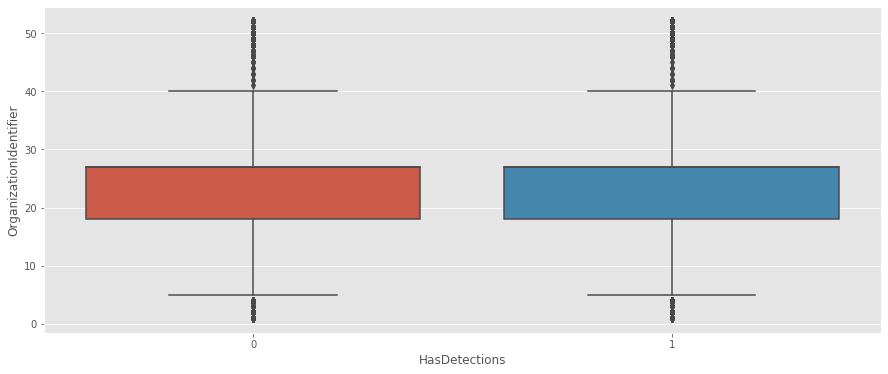

In [702]:
plt.figure(figsize= [15, 6])
sns.boxplot(data=df, y='OrganizationIdentifier', x='HasDetections')

In [703]:
df['OrganizationIdentifier'].fillna(value='-999', inplace=True)

In [704]:
df['OrganizationIdentifier'].astype(str)

0         -999
1         -999
2         27.0
3         27.0
4         27.0
          ... 
499995    27.0
499996    27.0
499997    -999
499998    18.0
499999    27.0
Name: OrganizationIdentifier, Length: 500000, dtype: object

##### Atributo GeoNameIdentifier

Atributo categórico con muchos valores únicos. Es un código que representa una región.

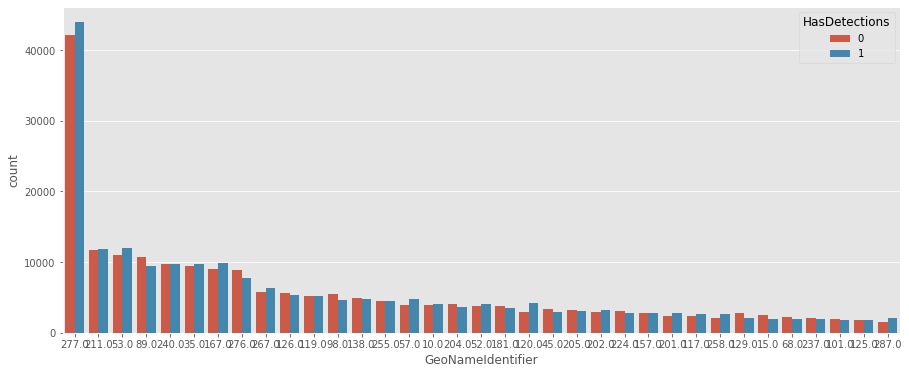

In [705]:
plt.figure(figsize= [15, 6])
sns.countplot(data=df, x='GeoNameIdentifier', hue='HasDetections', order=pd.value_counts(df['GeoNameIdentifier']).iloc[:35].index)

Existe cierta correlación con el target. 

In [706]:
df['GeoNameIdentifier'].value_counts(normalize=True, dropna=False).sort_values(0, ascending=False).head(20).sort_values(0, ascending=False)

277.00   0.17
211.00   0.05
53.00    0.05
89.00    0.04
240.00   0.04
35.00    0.04
167.00   0.04
276.00   0.03
267.00   0.02
126.00   0.02
119.00   0.02
98.00    0.02
138.00   0.02
255.00   0.02
57.00    0.02
10.00    0.02
204.00   0.02
52.00    0.02
181.00   0.01
120.00   0.01
Name: GeoNameIdentifier, dtype: float64

No se agrupa para no perder información de cada región. 

In [707]:
df['GeoNameIdentifier'].nunique()

268

In [708]:
df['GeoNameIdentifier'].fillna(value='-999', inplace=True)

In [709]:
df['GeoNameIdentifier'].astype(str)

0         205.0
1         126.0
2         181.0
3         205.0
4         277.0
          ...  
499995     53.0
499996    181.0
499997    119.0
499998    258.0
499999    277.0
Name: GeoNameIdentifier, Length: 500000, dtype: object

##### Atributo LocaleEnglishNameIdentifier

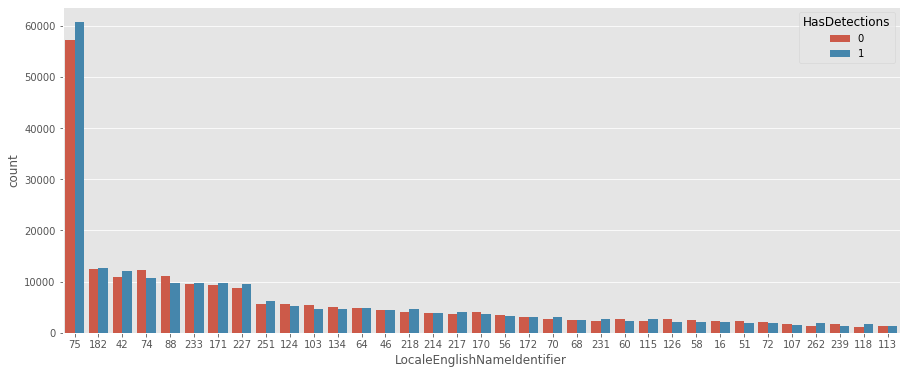

In [710]:
plt.figure(figsize= [15, 6])
sns.countplot(data=df, x='LocaleEnglishNameIdentifier', hue='HasDetections', order=pd.value_counts(df['LocaleEnglishNameIdentifier']).iloc[:35].index)

Se puede ver la correlación con el target.

In [711]:
df['LocaleEnglishNameIdentifier'].value_counts(normalize=True, dropna=False).sort_values(0, ascending=False).head(20).sort_values(0, ascending=False)

75    0.24
182   0.05
42    0.05
74    0.05
88    0.04
233   0.04
171   0.04
227   0.04
251   0.02
124   0.02
103   0.02
134   0.02
64    0.02
46    0.02
218   0.02
214   0.02
217   0.02
170   0.02
56    0.01
172   0.01
Name: LocaleEnglishNameIdentifier, dtype: float64

In [712]:
df['LocaleEnglishNameIdentifier'].nunique()

233

In [713]:
pd.crosstab(df['LocaleEnglishNameIdentifier'], df['HasDetections'], normalize=True).sort_values(0, ascending=False)

HasDetections,0,1
LocaleEnglishNameIdentifier,,
75,0.11,0.12
182,0.02,0.03
74,0.02,0.02
88,0.02,0.02
42,0.02,0.02
233,0.02,0.02
171,0.02,0.02
227,0.02,0.02
251,0.01,0.01


La correalación con el target es baja. Agruparemos las variables de menor frequencia.

In [714]:
list = (df['LocaleEnglishNameIdentifier'].value_counts(dropna=True).values > 100)
len(list[list==True])

107

In [715]:
list_1 = df['LocaleEnglishNameIdentifier'].value_counts(dropna=True).head(107).index
df.loc[df['LocaleEnglishNameIdentifier'].isin(list_1)==False, 'LocaleEnglishNameIdentifier'] = 'resto'

In [716]:
df['LocaleEnglishNameIdentifier'].fillna(value='-999', inplace=True)

In [717]:
df['LocaleEnglishNameIdentifier'].astype(str)

0         172
1         124
2          56
3         172
4          75
         ... 
499995     42
499996     56
499997     64
499998    246
499999     75
Name: LocaleEnglishNameIdentifier, Length: 500000, dtype: object

##### Atributo Platform

Categórica que especifica el sistema operativo. 

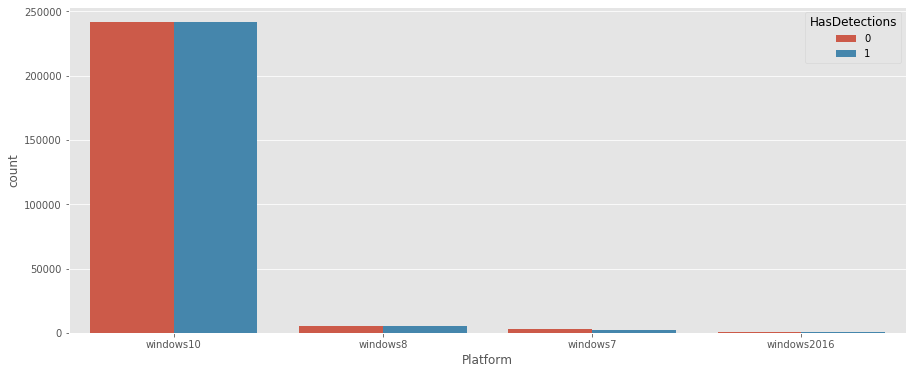

In [718]:
plt.figure(figsize= [15, 6])
sns.countplot(data=df, x='Platform', hue='HasDetections', order=pd.value_counts(df['Platform']).iloc[:35].index)

In [719]:
pd.crosstab(df['Platform'], df['HasDetections'], normalize=False).sort_values(0, ascending=False)

HasDetections,0,1
Platform,,
windows10,241572,241476
windows8,5211,5614
windows7,2752,2562
windows2016,512,301


Se ve que Windows10 es casi la única opción utilizada actualmente como sistema operativo de microsoft. También se ve una muy baja correlación con el target. Se deja como está.

Sería interesante ver la comparativa con los ordenadores Mac. 

Este atributo no creo que agregue ninguna información interesante al modelo.

##### Atributo Processor

Tipo de OS relacionado con procesador. Categórica. 

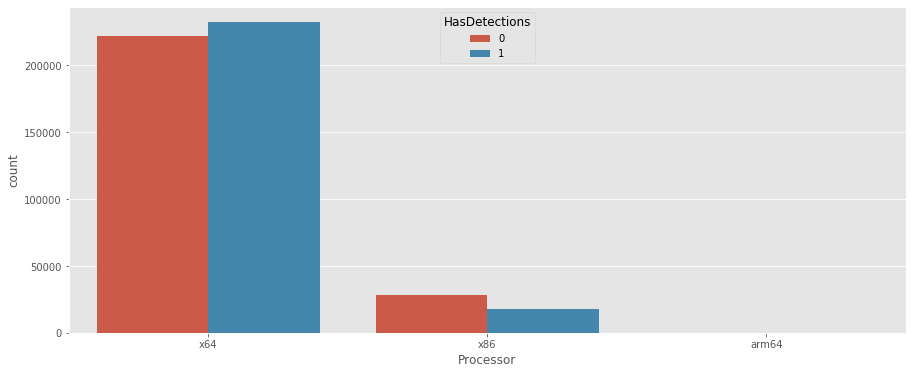

In [720]:
plt.figure(figsize= [15, 6])
sns.countplot(data=df, x='Processor', hue='HasDetections', order=pd.value_counts(df['Processor']).iloc[:35].index)

Existe una correlación interesante. x64 tiene más detecciones que no detecciones a diferencia de x86. Investigando,
ARM es el procesador de moviles, lo cual indica también que los OS de moviles no es el negocio de Microsoft.

Se deja la variable ARM porque es interesante ver la correlación en móviles.

In [721]:
pd.crosstab(df['Processor'], df['HasDetections'], normalize=False).sort_values(0, ascending=False)

HasDetections,0,1
Processor,,
x64,222102,232321
x86,27931,17632
arm64,14,0


##### Atributo OsVer

Atributo categórico de la versión del sistema operativo. 

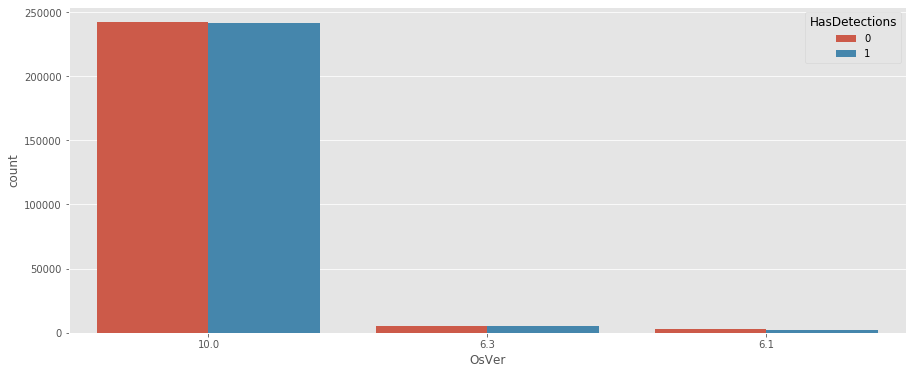

In [746]:
plt.figure(figsize= [15, 6])
sns.countplot(data=df, x='OsVer', hue='HasDetections', order=pd.value_counts(df['OsVer']).iloc[:5].index)

In [723]:
df['OsVer'].nunique()

21

In [739]:
df['OsVer'].value_counts(normalize=False, dropna=False).sort_values(0, ascending=False).head(20).sort_values(0, ascending=False)

10.0.0.0      483830
6.3.0.0        10818
6.1.1.0         5281
6.1.0.0           33
10.0.3.0          12
10.0.1.0           7
6.3.1.0            2
10.0.0.1           2
10.0.32.72         2
6.3.3.0            2
10.0.2.0           1
10.0.5.0           1
6.3.32.72          1
10.0.80.0          1
10.0.32.0          1
6.3.7.0            1
6.3.5.0            1
10.0.0.112         1
10.0.7.0           1
10.0.8.0           1
Name: OsVer, dtype: int64

Viendo que hay varios datos con frequencia super baja y la correlación general no muestra mucha importancia, vale la pena practicar una agrupación X.X
Eso nos dejaría con 10.0, 6.3, 6.1.

In [725]:
to_replace = ['10.0', '6.3', '6.1']

In [726]:
n_OsVer = []
for i in df.index:
    if '10.0' in df.at[i,'OsVer']:
        n_OsVer.append('10.0')
    elif '6.3' in df.at[i,'OsVer']:
        n_OsVer.append('6.3')
    elif '6.1' in df.at[i,'OsVer']:
        n_OsVer.append('6.1')
    else:
        n_OsVer.append('other')

In [727]:
sn_OsVer=pd.Series(n_OsVer, name='OsVer')

In [728]:
sn_OsVer_index.nunique()

3

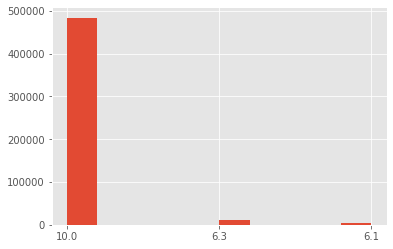

In [729]:
sn_OsVer.hist()

In [730]:
sn_OsVer.head(4)

0    10.0
1    10.0
2    10.0
3    10.0
Name: OsVer, dtype: object

In [740]:
df.drop(columns='OsVer', inplace=True)

In [741]:
df['OsVer'] = sn_OsVer

In [743]:
df['OsVer'].head(2)

0    10.0
1    10.0
Name: OsVer, dtype: object

In [744]:
df['OsVer'].nunique()

3

In [745]:
df['OsVer'].isnull().sum()

0

##### Atributo Osbuild

Atributo categórico de builds de OS.

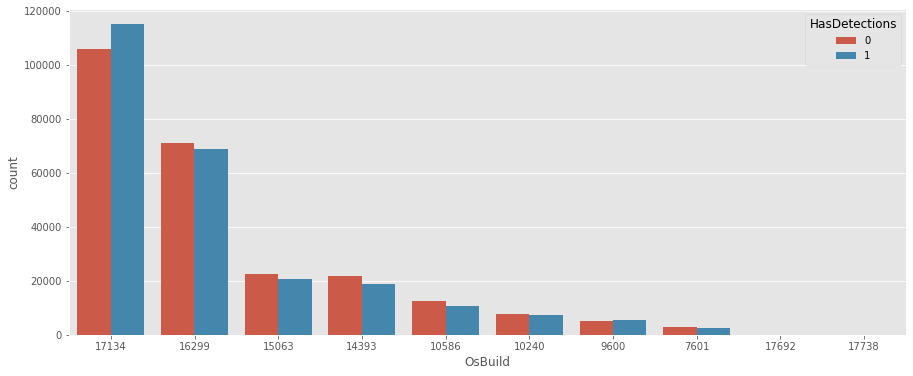

In [747]:
plt.figure(figsize= [15, 6])
sns.countplot(data=df, x='OsBuild', hue='HasDetections', order=pd.value_counts(df['OsBuild']).iloc[:10].index)

In [748]:
df['OsBuild'].nunique()

48

In [753]:
df['OsBuild'].value_counts(normalize=False, dropna=False).sort_values(0, ascending=False).head(20).sort_values(0, ascending=False)

17134    220779
16299    139901
15063     43352
14393     40717
10586     22955
10240     15014
9600      10825
7601       5281
17692       155
17738       134
17744       129
17758        86
17746        62
17713        60
17754        56
17751        53
17741        51
17755        45
17735        37
17686        36
Name: OsBuild, dtype: int64

Se deja como está.

In [754]:
df['OsBuild'].astype(str)

0         17134
1         17134
2         10586
3         17134
4         17134
          ...  
499995    16299
499996    16299
499997    17134
499998    16299
499999    17134
Name: OsBuild, Length: 500000, dtype: object

In [755]:
df['OsBuild'].index

RangeIndex(start=0, stop=500000, step=1)

In [756]:
df['OsBuild'].isnull().sum()

0

##### Atributo OsSuite

Atributo categórico. No tan seguro pero parece que si. 

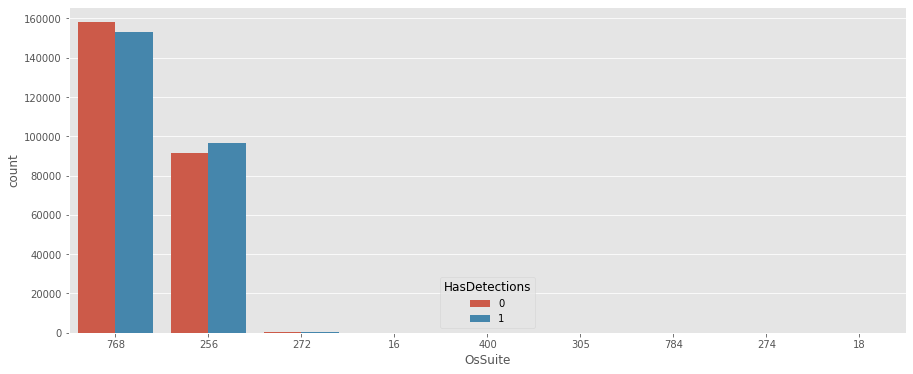

In [757]:
plt.figure(figsize= [15, 6])
sns.countplot(data=df, x='OsSuite', hue='HasDetections', order=pd.value_counts(df['OsSuite']).iloc[:10].index)

In [758]:
df['OsSuite'].nunique()

9

In [759]:
df['OsSuite'].value_counts(normalize=False, dropna=False).sort_values(0, ascending=False).head(20).sort_values(0, ascending=False)

768    311226
256    187951
272       677
16         53
400        47
305        33
784        10
274         2
18          1
Name: OsSuite, dtype: int64

In [760]:
df['OsSuite'].astype(str)

0         256
1         256
2         768
3         768
4         256
         ... 
499995    768
499996    768
499997    256
499998    256
499999    256
Name: OsSuite, Length: 500000, dtype: object

In [761]:
df['OsSuite'].nunique()

9

In [762]:
df['OsSuite'].isnull().sum()

0

##### Atributo OsPlatformSubRelease

Atributo categórico. Returns the OS Platform sub-release 

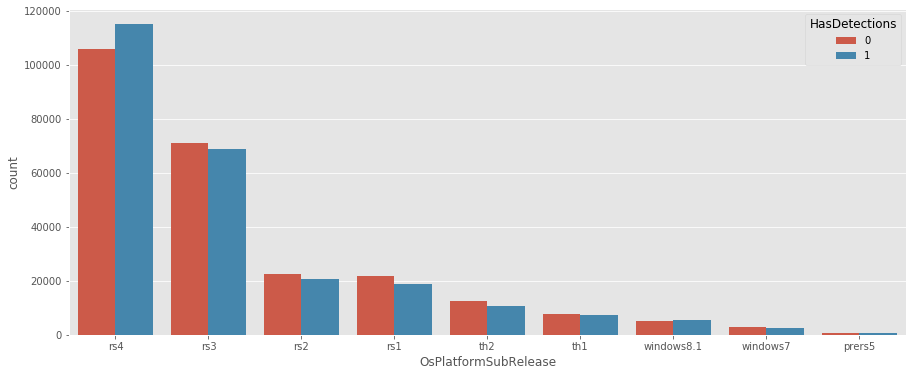

In [763]:
plt.figure(figsize= [15, 6])
sns.countplot(data=df, x='OsPlatformSubRelease', hue='HasDetections', order=pd.value_counts(df['OsPlatformSubRelease']).iloc[:10].index)

In [764]:
df['OsPlatformSubRelease'].value_counts(normalize=False, dropna=False).sort_values(0, ascending=False).head(20).sort_values(0, ascending=False)

rs4           220779
rs3           139901
rs2            43352
rs1            40717
th2            22955
th1            15014
windows8.1     10825
windows7        5314
prers5          1143
Name: OsPlatformSubRelease, dtype: int64

Existe correlación y todo está bien

##### Atributo OsBuildLab

Atributo categórico. Build lab that generated the current OS

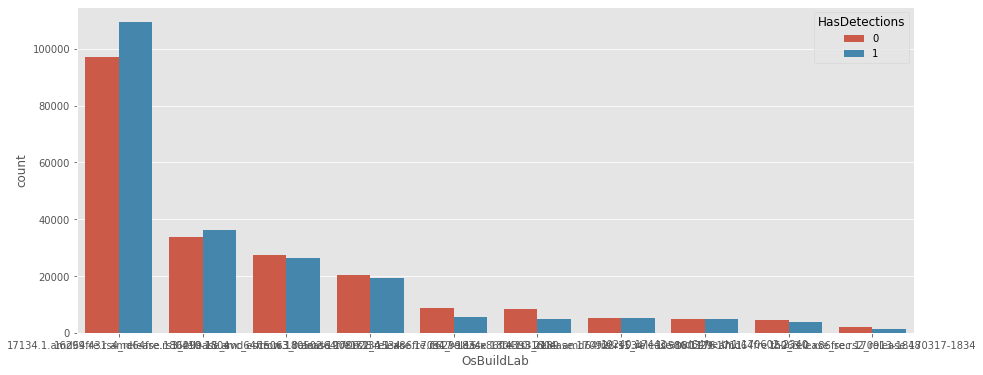

In [765]:
plt.figure(figsize= [15, 6])
sns.countplot(data=df, x='OsBuildLab', hue='HasDetections', order=pd.value_counts(df['OsBuildLab']).iloc[:10].index)

In [766]:
df['OsBuildLab'].value_counts(normalize=False, dropna=False).sort_values(0, ascending=False).sort_values(0, ascending=False)

17134.1.amd64fre.rs4_release.180410-1804                    206436
16299.431.amd64fre.rs3_release_svc_escrow.180502-1908        69884
16299.15.amd64fre.rs3_release.170928-1534                    53826
15063.0.amd64fre.rs2_release.170317-1834                     39908
17134.1.x86fre.rs4_release.180410-1804                       14334
16299.15.x86fre.rs3_release.170928-1534                      13105
14393.2189.amd64fre.rs1_release.180329-1711                  10724
10240.17443.amd64fre.th1.170602-2340                          9538
10586.1176.amd64fre.th2_release_sec.170913-1848               8385
15063.0.x86fre.rs2_release.170317-1834                        3444
14393.0.amd64fre.rs1_release.160715-1616                      3239
9600.19067.amd64fre.winblue_ltsb_escrow.180619-2033           3160
9600.19101.amd64fre.winblue_ltsb_escrow.180718-1800           3139
16299.637.amd64fre.rs3_release_svc.180808-1748                2439
14393.2189.x86fre.rs1_release.180329-1711                     

In [767]:
df['OsBuildLab'].nunique()

453

Aunque parece muy incomodo de leer, es dificil agrupar porque hay demasiada información, por eso se dejan los valores como están, ya que hay mucha inf.

In [770]:
df['OsBuildLab'].astype(str)

0                  17134.1.amd64fre.rs4_release.180410-1804
1                  17134.1.amd64fre.rs4_release.180410-1804
2           10586.1176.amd64fre.th2_release_sec.170913-1848
3                  17134.1.amd64fre.rs4_release.180410-1804
4                  17134.1.amd64fre.rs4_release.180410-1804
                                ...                        
499995    16299.431.amd64fre.rs3_release_svc_escrow.1805...
499996            16299.15.amd64fre.rs3_release.170928-1534
499997               17134.1.x86fre.rs4_release.180410-1804
499998            16299.15.amd64fre.rs3_release.170928-1534
499999             17134.1.amd64fre.rs4_release.180410-1804
Name: OsBuildLab, Length: 500000, dtype: object

In [771]:
df['OsBuildLab'].fillna(value='-999', inplace=True)

##### Atributo SkuEdition

Atributo categórico- The goal of this feature is to use the Product Type defined in the MSDN to map to a 'SKU-Edition' name that is useful in population reporting

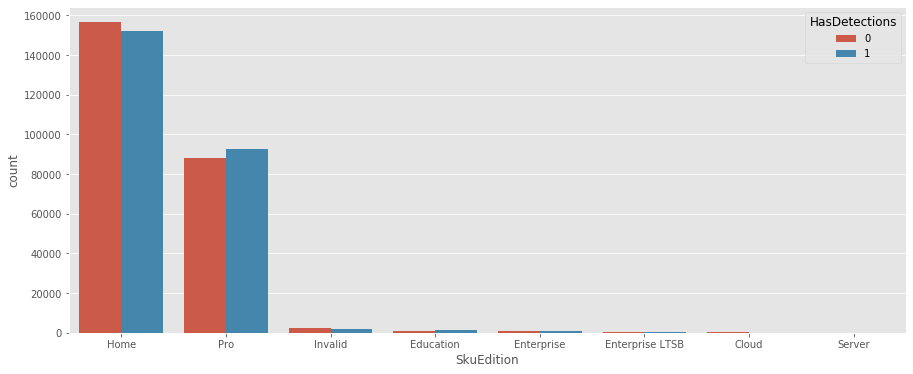

In [772]:
plt.figure(figsize= [15, 6])
sns.countplot(data=df, x='SkuEdition', hue='HasDetections', order=pd.value_counts(df['SkuEdition']).iloc[:10].index)

A simple vista parece que la edición pro tiene mas riesgo de malware.

In [773]:
df['SkuEdition'].value_counts(normalize=False, dropna=False).sort_values(0, ascending=False).sort_values(0, ascending=False)

Home               308567
Pro                181042
Invalid              4423
Education            2321
Enterprise           1999
Enterprise LTSB      1141
Cloud                 309
Server                198
Name: SkuEdition, dtype: int64

##### Atributo IsProtected

Atributo booleano. This is a calculated field derived from the Spynet Report's AV Products field. Returns: a. TRUE if there is at least one active and up-to-date antivirus product running on this machine. b. FALSE if there is no active AV product on this machine, or if the AV is active, but is not receiving the latest updates. c. null if there are no Anti Virus Products in the report. Returns: Whether a machine is protected

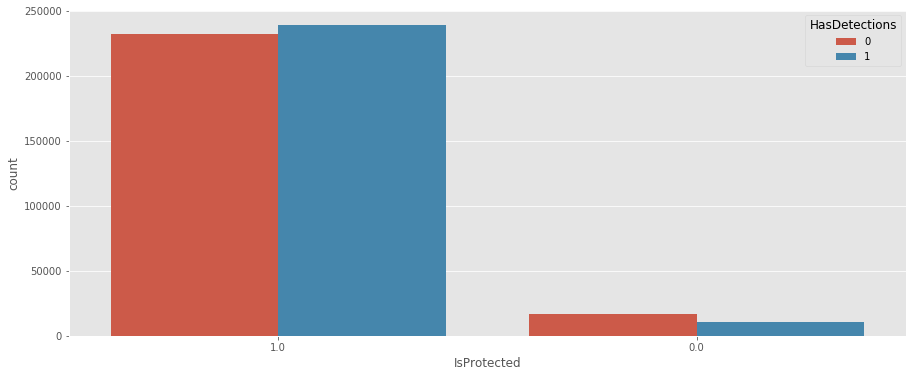

In [774]:
plt.figure(figsize= [15, 6])
sns.countplot(data=df, x='IsProtected', hue='HasDetections', order=pd.value_counts(df['IsProtected']).iloc[:10].index)

Parece que no tenemos que estar protegidos. Interesante

In [775]:
df['IsProtected'].value_counts(normalize=False, dropna=False).sort_values(0, ascending=False).sort_values(0, ascending=False)

1.00    471073
0.00     27001
nan       1926
Name: IsProtected, dtype: int64

Para quitar los nulos se usará la moda.

In [776]:
df['IsProtected'].fillna(df['IsProtected'].mode()[0], inplace=True)

In [777]:
df['IsProtected'].value_counts(normalize=False, dropna=False).sort_values(0, ascending=False).sort_values(0, ascending=False)

1.00    472999
0.00     27001
Name: IsProtected, dtype: int64

##### Atributo SMode

Atributo booleano. This field is set to true when the device is known to be in 'S Mode', as in, Windows 10 S mode, where only Microsoft Store apps can be installed

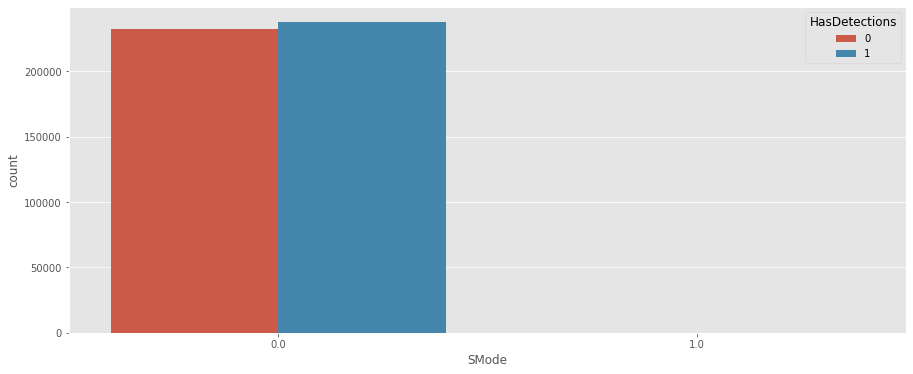

In [778]:
plt.figure(figsize= [15, 6])
sns.countplot(data=df, x='SMode', hue='HasDetections', order=pd.value_counts(df['SMode']).iloc[:10].index)

In [779]:
df['SMode'].value_counts(normalize=False, dropna=False).sort_values(0, ascending=False).sort_values(0, ascending=False)

0.00    469946
nan      29848
1.00       206
Name: SMode, dtype: int64

In [780]:
pd.crosstab(df['SMode'], df['HasDetections'], normalize=False).sort_values(0, ascending=False)

HasDetections,0,1
SMode,,
0.00,232495,237451
1.00,169,37


No borro esta columna solo porque usaremos decision-tree, pero me incomoda.

In [781]:
df['SMode'].fillna(df['SMode'].mode()[0], inplace=True)

In [782]:
df['SMode'].value_counts(normalize=False, dropna=False).sort_values(0, ascending=False).sort_values(0, ascending=False)

0.00    499794
1.00       206
Name: SMode, dtype: int64

##### Atributo IeVerIdentifier

Atributo categórico. Sin información. Es una identificación de algo. 

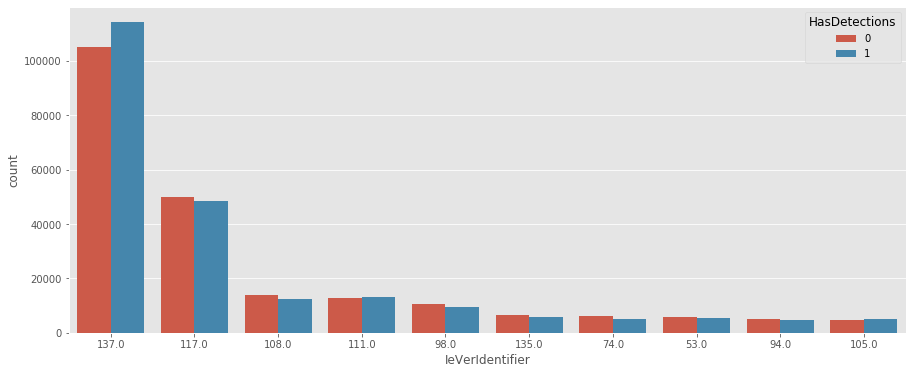

In [783]:
plt.figure(figsize= [15, 6])
sns.countplot(data=df, x='IeVerIdentifier', hue='HasDetections', order=pd.value_counts(df['IeVerIdentifier']).iloc[:10].index)

In [784]:
df['IeVerIdentifier'].nunique()

179

In [785]:
df['IeVerIdentifier'].value_counts(normalize=False, dropna=False).sort_values(0, ascending=False).sort_values(0, ascending=False)

137.00    219142
117.00     98667
108.00     26353
111.00     26143
98.00      19731
135.00     12314
74.00      11395
53.00      11352
94.00       9715
105.00      9695
333.00      8751
107.00      7080
103.00      6364
96.00       4695
76.00       3242
nan         3209
71.00       2275
41.00       1918
114.00      1862
323.00      1814
335.00      1422
334.00      1356
87.00        936
81.00        809
78.00        655
73.00        615
82.00        571
337.00       540
42.00        502
302.00       413
85.00        399
84.00        355
91.00        310
72.00        263
92.00        262
86.00        258
68.00        258
332.00       254
88.00        246
90.00        228
44.00        181
327.00       150
163.00       135
180.00       131
295.00       128
185.00       126
331.00       107
325.00       106
64.00        103
49.00         92
65.00         84
199.00        83
45.00         77
288.00        77
52.00         73
322.00        71
307.00        68
311.00        63
186.00        

Vamos a agrupar los valores con muy baja frequencia.

In [792]:
list = (df['IeVerIdentifier'].value_counts(dropna=True).values > 50)
len(list[list==True])

62

In [793]:
list_1 = df['IeVerIdentifier'].value_counts(dropna=True).head(62).index
df.loc[df['IeVerIdentifier'].isin(list_1)==False, 'IeVerIdentifier'] = 'resto'

In [795]:
df['IeVerIdentifier'].fillna(df['IeVerIdentifier'].mode(), inplace=True)

In [796]:
df['IeVerIdentifier'].isnull().sum()

0

In [797]:
df['IeVerIdentifier'].astype(str)

0         137.0
1         137.0
2          74.0
3         137.0
4         137.0
          ...  
499995    117.0
499996    111.0
499997    137.0
499998    117.0
499999    137.0
Name: IeVerIdentifier, Length: 500000, dtype: object

##### Atributo SmartScreen

Atributo categorico. This is the SmartScreen enabled string value from registry. This is obtained by checking in order.  SmartScreen es un componente anti-phishing y anti-malware basado en la nube incluido en varios productos de Microsoft HKLM\SOFTWARE\Policies\Microsoft\Windows\System\SmartScreenEnabled and HKLM\SOFTWARE\Microsoft\Windows\CurrentVersion\Explorer\SmartScreenEnabled. If the value exists but is blank, the value "ExistsNotSet" is sent in telemetry.

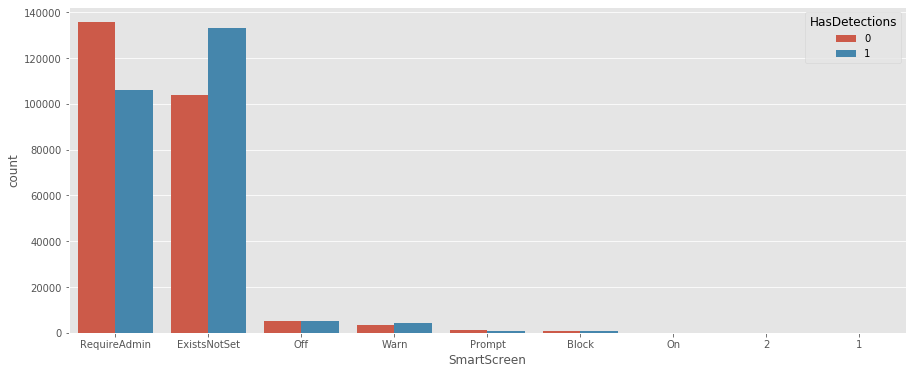

In [803]:
plt.figure(figsize= [15, 6])
sns.countplot(data=df, x='SmartScreen', hue='HasDetections', order=pd.value_counts(df['SmartScreen']).iloc[:10].index)

Es un valor con una gran correlación. ExistsNotSet tiene muchas detecciones respecto a la población. 

If the value exists but is blank, the value "ExistsNotSet" is sent in telemetry.

In [799]:
df['SmartScreen'].value_counts(normalize=False, dropna=False).sort_values(0, ascending=False).sort_values(0, ascending=False)

RequireAdmin    241594
NaN             178596
ExistsNotSet     58497
Off              10388
Warn              7530
Prompt            1950
Block             1274
off                 75
On                  53
&#x02;              20
&#x01;              14
on                   8
requireadmin         1
Name: SmartScreen, dtype: int64

In [800]:
trans_dict = {
    'off': 'Off', '&#x02;': '2', '&#x01;': '1', 'on': 'On', 'requireadmin': 'RequireAdmin', 'OFF': 'Off', 
    'Promt': 'Prompt', 'requireAdmin': 'RequireAdmin', 'prompt': 'Prompt', 'warn': 'Warn', 
    '00000000': '0', '&#x03;': '3', np.nan: 'ExistsNotSet' 
}
df.replace({'SmartScreen': trans_dict}, inplace=True)

Un atributo muy importante. Asumir que los nan son ExistsNotSet quita del primer lugar en el decisión-tree a esta variable. En el Kaggle muchos no unen los valores null con ExistsNotSet aunque lo diga Microsoft. 

In [804]:
df['SmartScreen'].isnull().sum()

0

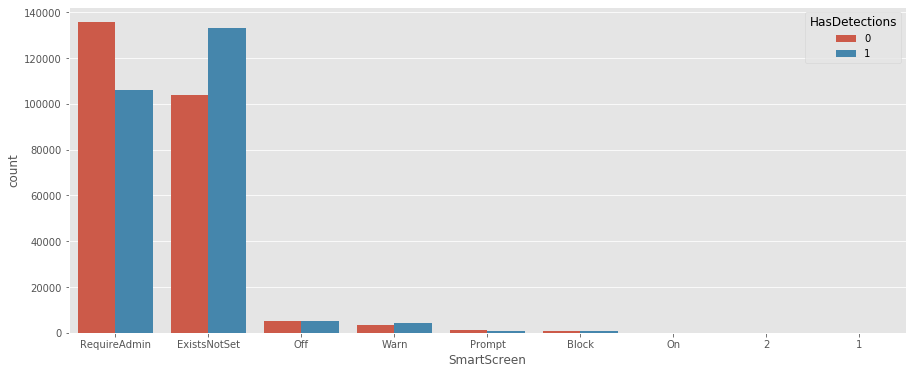

In [805]:
plt.figure(figsize= [15, 6])
sns.countplot(data=df, x='SmartScreen', hue='HasDetections', order=pd.value_counts(df['SmartScreen']).iloc[:10].index)

##### Atributo Firewall

Atributo booleano. Representa si es True un firewall funcionando. 

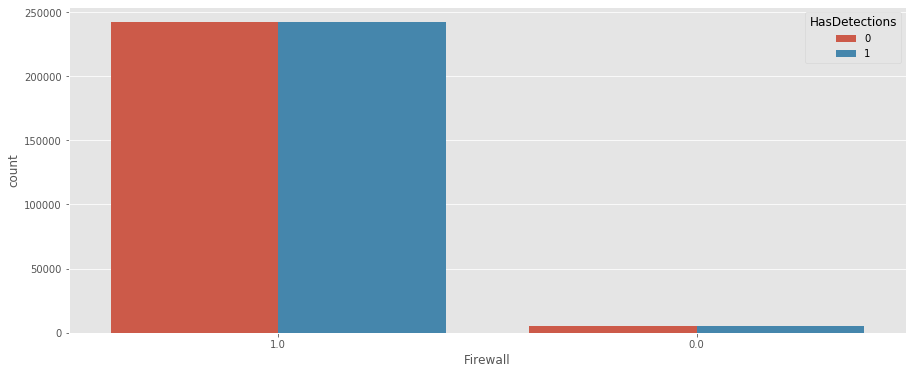

In [806]:
plt.figure(figsize= [15, 6])
sns.countplot(data=df, x='Firewall', hue='HasDetections', order=pd.value_counts(df['Firewall']).iloc[:10].index)

In [807]:
df['Firewall'].value_counts(normalize=False, dropna=False).sort_values(0, ascending=False).sort_values(0, ascending=False)

1.00    484071
0.00     10767
nan       5162
Name: Firewall, dtype: int64

In [808]:
pd.crosstab(df['Firewall'], df['HasDetections'], normalize=False).sort_values(0, ascending=False)

HasDetections,0,1
Firewall,,
1.00,241965,242106
0.00,5459,5308


Tiene una correlación mínima. Es un valor que borraría en otros casos. 

In [809]:
df['Firewall'].fillna(df['Firewall'].mode()[0], inplace=True)

In [810]:
df['Firewall'].value_counts(normalize=False, dropna=False).sort_values(0, ascending=False).sort_values(0, ascending=False)

1.00    489233
0.00     10767
Name: Firewall, dtype: int64

##### Atributo UacLuaenable

Atributo booleano pero con valores diferes de 0 y 1. This attribute reports whether or not the "administrator in Admin Approval Mode" user type is disabled or enabled in UAC. 
El objetivo de UAC es mejorar la seguridad de Windows al impedir que aplicaciones maliciosas hagan cambios no autorizados en el ordenador. 

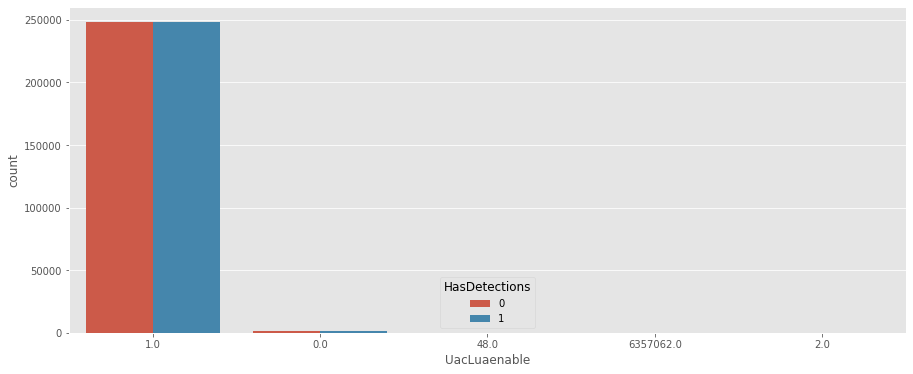

In [811]:
plt.figure(figsize= [15, 6])
sns.countplot(data=df, x='UacLuaenable', hue='HasDetections', order=pd.value_counts(df['UacLuaenable']).iloc[:10].index)

Valor con casi ninguna correlación del target. 

In [812]:
df['UacLuaenable'].nunique()

5

In [813]:
pd.crosstab(df['UacLuaenable'], df['HasDetections'], normalize=False).sort_values(0, ascending=False)

HasDetections,0,1
UacLuaenable,,
1.00,248161,248115
0.00,1590,1496
48.00,3,10
2.00,0,1
"6,357,062.00",0,1


In [814]:
df['UacLuaenable'].value_counts(normalize=False, dropna=False).sort_values(0, ascending=False).sort_values(0, ascending=False)

1.00            496276
0.00              3086
nan                623
48.00               13
6,357,062.00         1
2.00                 1
Name: UacLuaenable, dtype: int64

Termino de convertir la columna en booleana.

In [815]:
df.loc[df['UacLuaenable'] == 48.00 , 'UacLuaenable'] = df['UacLuaenable'].mode()[0]

In [816]:
df.loc[df['UacLuaenable'] == 2.00 , 'UacLuaenable'] = df['UacLuaenable'].mode()[0]

In [817]:
df.loc[df['UacLuaenable'] == 6357062.00 , 'UacLuaenable'] = df['UacLuaenable'].mode()[0]

In [818]:
df['UacLuaenable'].fillna(df['UacLuaenable'].mode()[0], inplace=True)

In [819]:
df['UacLuaenable'].value_counts(normalize=False, dropna=False).sort_values(0, ascending=False).sort_values(0, ascending=False)

1.00    496914
0.00      3086
Name: UacLuaenable, dtype: int64

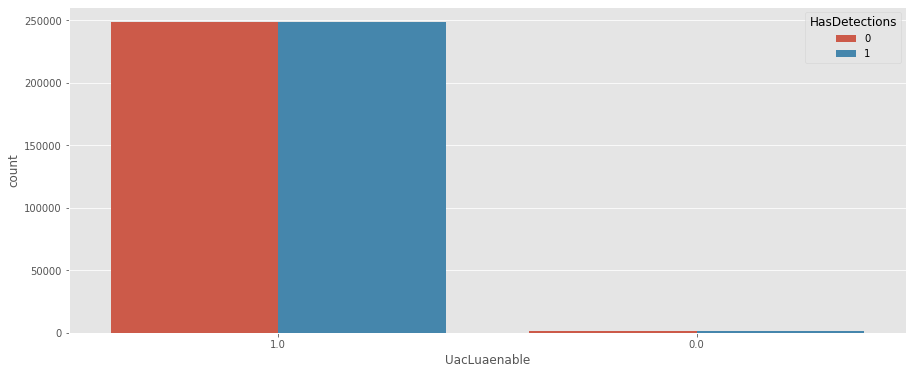

In [820]:
plt.figure(figsize= [15, 6])
sns.countplot(data=df, x='UacLuaenable', hue='HasDetections', order=pd.value_counts(df['UacLuaenable']).iloc[:10].index)

##### Atributo Census_MDC2FormFactor

Atributo categórico. A grouping based on a combination of Device Census level hardware characteristics. The logic used to define Form Factor is rooted in business and industry standards and aligns with how people think about their device. 

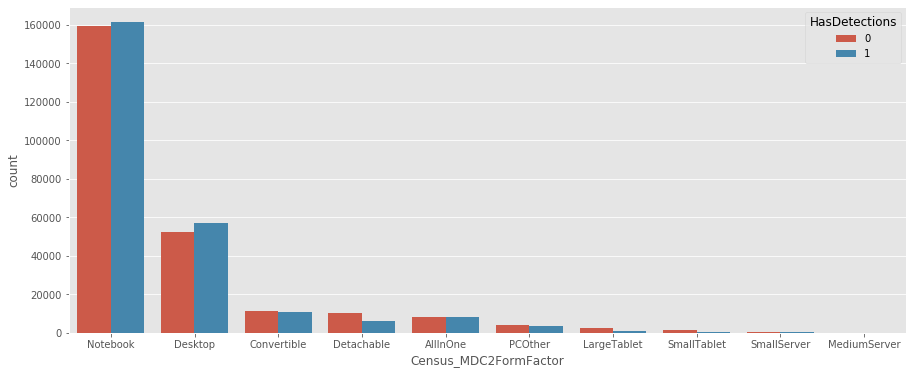

In [821]:
plt.figure(figsize= [15, 6])
sns.countplot(data=df, x='Census_MDC2FormFactor', hue='HasDetections', order=pd.value_counts(df['Census_MDC2FormFactor']).iloc[:10].index)

Actualmente se ve que la mayoría usa Notebook. El Desktop desciende en uso. 

In [822]:
df['Census_MDC2FormFactor'].value_counts(normalize=False, dropna=False).sort_values(0, ascending=False).sort_values(0, ascending=False)

Notebook        320948
Desktop         109527
Convertible      22369
Detachable       16802
AllInOne         16372
PCOther           7800
LargeTablet       3645
SmallTablet       1797
SmallServer        496
MediumServer       192
LargeServer         50
ServerOther          2
Name: Census_MDC2FormFactor, dtype: int64

In [823]:
df['Census_MDC2FormFactor'].astype(str)

0             Desktop
1            Notebook
2         Convertible
3            Notebook
4            Notebook
             ...     
499995    Convertible
499996       Notebook
499997        Desktop
499998       Notebook
499999        Desktop
Name: Census_MDC2FormFactor, Length: 500000, dtype: object

##### Atributo Census_DeviceFamily

Atributo categórico. Indicates the type of device that an edition of the OS is intended for. Example values: Windows.Desktop, Windows.Mobile, and iOS.Phone

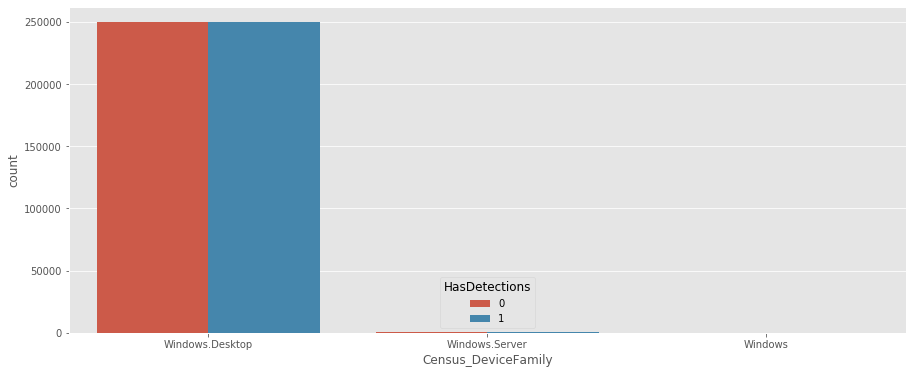

In [824]:
plt.figure(figsize= [15, 6])
sns.countplot(data=df, x='Census_DeviceFamily', hue='HasDetections', order=pd.value_counts(df['Census_DeviceFamily']).iloc[:10].index)

La correlación con el target es casi nula. 

In [825]:
df['Census_DeviceFamily'].value_counts(normalize=False, dropna=False).sort_values(0, ascending=False).sort_values(0, ascending=False)

Windows.Desktop    499183
Windows.Server        816
Windows                 1
Name: Census_DeviceFamily, dtype: int64

In [826]:
df.loc[df['Census_DeviceFamily'] == 'Windows' , 'Census_DeviceFamily'] = df['Census_DeviceFamily'].mode()[0]

In [827]:
df['Census_DeviceFamily'].value_counts(normalize=False, dropna=False).sort_values(0, ascending=False).sort_values(0, ascending=False)

Windows.Desktop    499184
Windows.Server        816
Name: Census_DeviceFamily, dtype: int64

Esta columna podría ser booleana facilmente sin usar OHE

In [828]:
df['Census_DeviceFamily'].astype(str)

0         Windows.Desktop
1         Windows.Desktop
2         Windows.Desktop
3         Windows.Desktop
4         Windows.Desktop
               ...       
499995    Windows.Desktop
499996    Windows.Desktop
499997    Windows.Desktop
499998    Windows.Desktop
499999    Windows.Desktop
Name: Census_DeviceFamily, Length: 500000, dtype: object

##### Atributo Census_OEMNameIdentifier

Atributo categorico. OEM, or original equipment manufacturer, is a broad term that describes a web of relationships among IT hardware vendors, hardware component makers, software vendors and channel partners such as resellers and distributors.

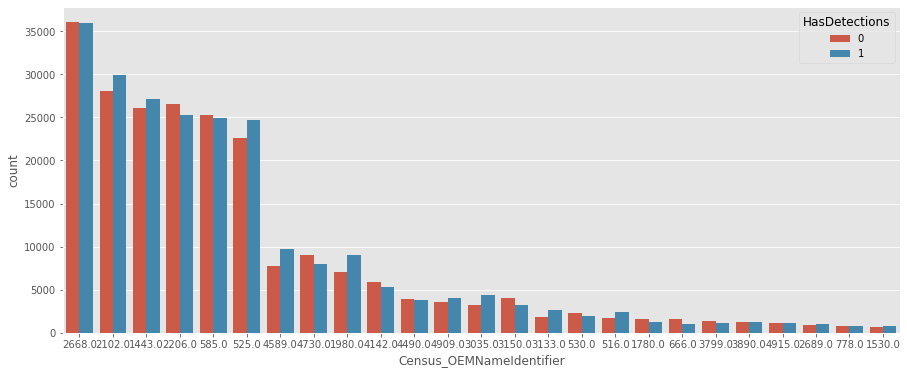

In [829]:
plt.figure(figsize= [15, 6])
sns.countplot(data=df, x='Census_OEMNameIdentifier', hue='HasDetections', order=pd.value_counts(df['Census_OEMNameIdentifier']).iloc[:25].index)

In [830]:
df['Census_OEMNameIdentifier'].value_counts(normalize=False, dropna=False).sort_values(0, ascending=False).sort_values(0, ascending=False)

2,668.00    72011
2,102.00    57924
1,443.00    53210
2,206.00    51888
585.00      50304
            ...  
5,014.00        1
3,062.00        1
3,067.00        1
5,002.00        1
883.00          1
Name: Census_OEMNameIdentifier, Length: 1590, dtype: int64

In [831]:
df['Census_OEMNameIdentifier'].nunique()

1589

In [832]:
df['Census_OEMNameIdentifier'].isnull().sum()

5381

In [833]:
df['Census_OEMNameIdentifier'].fillna(value='-999', inplace=True)

In [834]:
df['Census_OEMNameIdentifier'].value_counts(normalize=False, dropna=False).sort_values(0, ascending=False).sort_values(0, ascending=False)

2,668.00    72011
2,102.00    57924
1,443.00    53210
2,206.00    51888
585.00      50304
            ...  
2,484.00        1
1,577.00        1
4,611.00        1
4,638.00        1
54.00           1
Name: Census_OEMNameIdentifier, Length: 1590, dtype: int64

In [835]:
df['Census_OEMNameIdentifier'].astype(str)

0         1443.0
1         2102.0
2         2206.0
3          525.0
4         1443.0
           ...  
499995    2102.0
499996     666.0
499997    2206.0
499998    2668.0
499999    4589.0
Name: Census_OEMNameIdentifier, Length: 500000, dtype: object

##### Atributo Census_OEMModelIdentifier

Atributo catgórico. Sin información. 

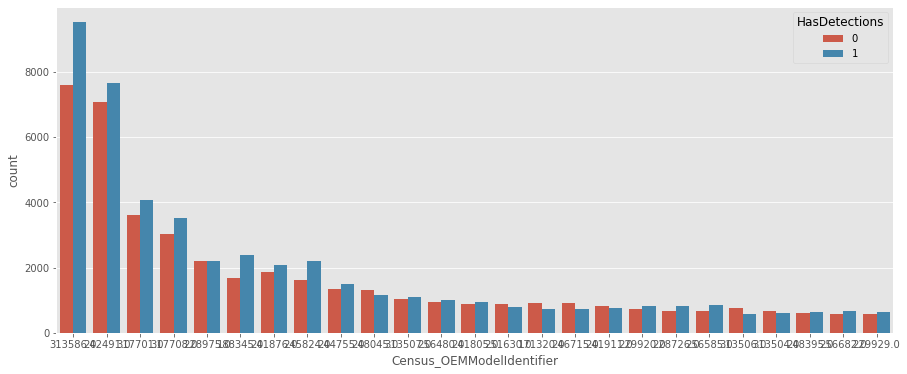

In [836]:
plt.figure(figsize= [15, 6])
sns.countplot(data=df, x='Census_OEMModelIdentifier', hue='HasDetections', order=pd.value_counts(df['Census_OEMModelIdentifier']).iloc[:25].index)

In [837]:
df['Census_OEMModelIdentifier'].nunique()

40697

In [838]:
pd.crosstab(df['Census_OEMModelIdentifier'], df['HasDetections'], normalize=False).sort_values(0, ascending=False)

HasDetections,0,1
Census_OEMModelIdentifier,,
"313,586.00",7577,9515
"242,491.00",7065,7661
"317,701.00",3598,4078
"317,708.00",3012,3529
"228,975.00",2193,2196
...,...,...
"199,543.00",0,1
"199,536.00",0,1
"199,494.00",0,3


No agrupamos ya que aplicaremos mean encoding

In [839]:
df['Census_OEMModelIdentifier'].value_counts(normalize=False, dropna=False).sort_values(0, ascending=False).sort_values(0, ascending=False)

313,586.00    17092
242,491.00    14726
317,701.00     7676
317,708.00     6541
nan            5764
              ...  
327,617.00        1
213,525.00        1
213,567.00        1
327,522.00        1
75,115.00         1
Name: Census_OEMModelIdentifier, Length: 40698, dtype: int64

In [840]:
df['Census_OEMModelIdentifier'].fillna(value='-999', inplace=True)

In [841]:
df['Census_OEMModelIdentifier'].astype(str)

0         275891.0
1         248850.0
2         238234.0
3         265410.0
4         256478.0
            ...   
499995    248445.0
499996    264566.0
499997    234834.0
499998     34576.0
499999    313586.0
Name: Census_OEMModelIdentifier, Length: 500000, dtype: object

##### Atributo Census_ProcessorCoreCount

Atríbuto numérico que describe el número de nucleos en los procesadores. 

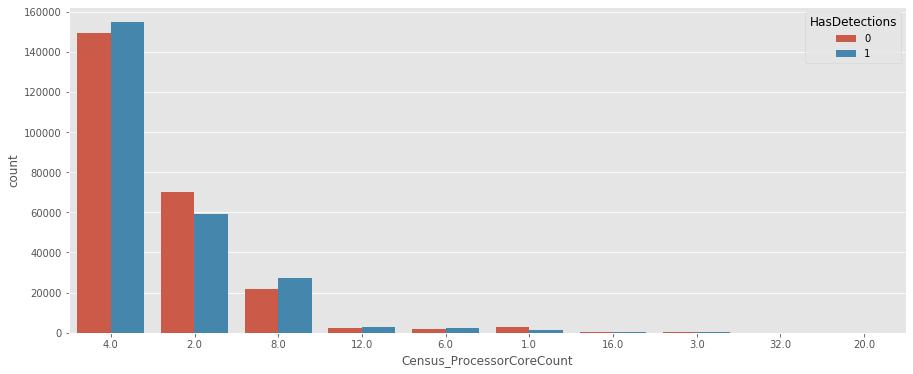

In [842]:
plt.figure(figsize= [15, 6])
sns.countplot(data=df, x='Census_ProcessorCoreCount', hue='HasDetections', order=pd.value_counts(df['Census_ProcessorCoreCount']).iloc[:10].index)

Se ve que la mayoría de los procesadores usados son de 4 nucelos. 

In [843]:
df['Census_ProcessorCoreCount'].value_counts(normalize=False, dropna=False).sort_values(0, ascending=False).sort_values(0, ascending=False)

4.00     304102
2.00     129178
8.00      48995
12.00      5184
6.00       4023
1.00       3980
nan        2347
16.00      1006
3.00        752
32.00       113
20.00        97
24.00        95
40.00        39
28.00        17
36.00        16
48.00        15
10.00        10
5.00         10
56.00         8
7.00          3
11.00         2
64.00         2
88.00         1
44.00         1
80.00         1
52.00         1
14.00         1
46.00         1
Name: Census_ProcessorCoreCount, dtype: int64

Aunque se puede trabajar los otuliers, se dejan por el decision-tree.

In [844]:
df['Census_ProcessorCoreCount'].fillna(df['Census_ProcessorCoreCount'].median(), inplace=True)

In [845]:
df['Census_ProcessorCoreCount'].value_counts(normalize=False, dropna=False).sort_values(0, ascending=False).sort_values(0, ascending=False)

4.00     306449
2.00     129178
8.00      48995
12.00      5184
6.00       4023
1.00       3980
16.00      1006
3.00        752
32.00       113
20.00        97
24.00        95
40.00        39
28.00        17
36.00        16
48.00        15
5.00         10
10.00        10
56.00         8
7.00          3
11.00         2
64.00         2
46.00         1
88.00         1
80.00         1
52.00         1
14.00         1
44.00         1
Name: Census_ProcessorCoreCount, dtype: int64

##### Atributo Census_ProcessorManufacturerIdentifier

Atributo categórico que identifica la fabrica del procesador

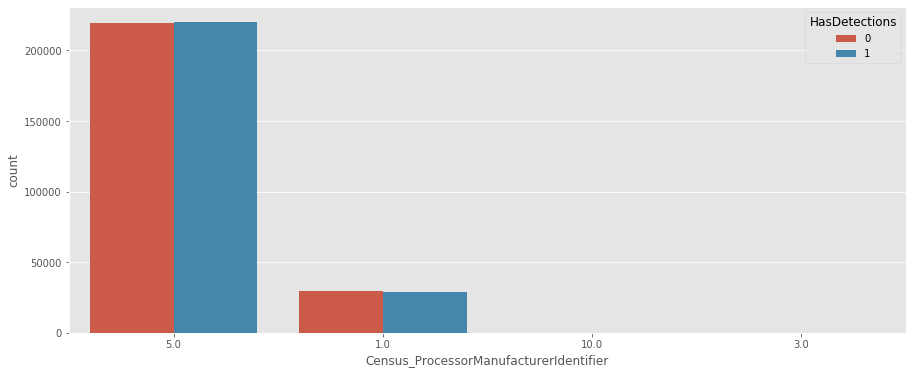

In [846]:
plt.figure(figsize= [15, 6])
sns.countplot(data=df, x='Census_ProcessorManufacturerIdentifier', hue='HasDetections', order=pd.value_counts(df['Census_ProcessorManufacturerIdentifier']).iloc[:10].index)

In [847]:
df['Census_ProcessorManufacturerIdentifier'].nunique()

4

In [848]:
df['Census_ProcessorManufacturerIdentifier'].value_counts(normalize=False, dropna=False).sort_values(0, ascending=False).sort_values(0, ascending=False)

5.00     439028
1.00      58604
nan        2347
10.00        14
3.00          7
Name: Census_ProcessorManufacturerIdentifier, dtype: int64

In [849]:
df['Census_ProcessorManufacturerIdentifier'].astype(str)

0         5.0
1         5.0
2         5.0
3         5.0
4         1.0
         ... 
499995    5.0
499996    5.0
499997    5.0
499998    5.0
499999    5.0
Name: Census_ProcessorManufacturerIdentifier, Length: 500000, dtype: object

In [850]:
df['Census_ProcessorManufacturerIdentifier'].fillna(value='-999', inplace=True)

In [851]:
df['Census_ProcessorManufacturerIdentifier'].value_counts(normalize=False, dropna=False).sort_values(0, ascending=False).sort_values(0, ascending=False)

5.0     439028
1.0      58604
-999      2347
10.0        14
3.0          7
Name: Census_ProcessorManufacturerIdentifier, dtype: int64

##### Atributo Census_ProcessorModelIdentifier

Atributo categórico. 

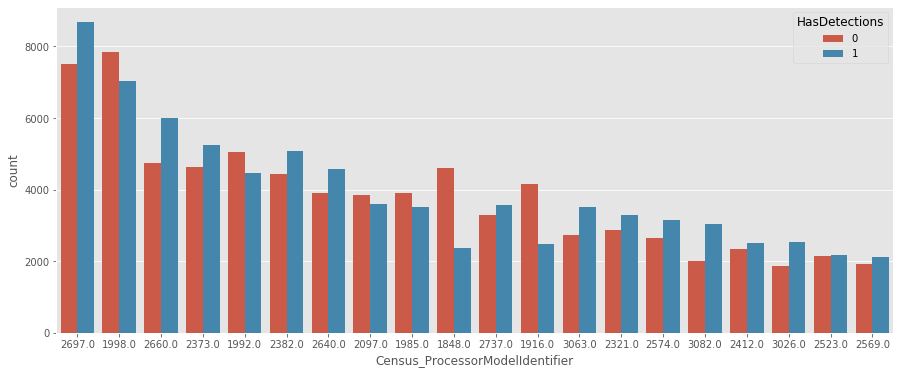

In [852]:
plt.figure(figsize= [15, 6])
sns.countplot(data=df, x='Census_ProcessorModelIdentifier', hue='HasDetections', order=pd.value_counts(df['Census_ProcessorModelIdentifier']).iloc[:20].index)

In [853]:
df['Census_ProcessorModelIdentifier'].nunique()

2243

Mean Encoding. No se agrupará.

In [854]:
df['Census_ProcessorModelIdentifier'].value_counts(normalize=False, dropna=False).sort_values(0, ascending=False).sort_values(0, ascending=False)

2,697.00    16180
1,998.00    14874
2,660.00    10736
2,373.00     9885
1,992.00     9502
            ...  
3,985.00        1
843.00          1
3,088.00        1
633.00          1
2,325.00        1
Name: Census_ProcessorModelIdentifier, Length: 2244, dtype: int64

In [855]:
df['Census_ProcessorModelIdentifier'].isnull().sum()

2349

In [856]:
df['Census_ProcessorModelIdentifier'].fillna(value='-999', inplace=True)

In [858]:
df['Census_ProcessorModelIdentifier'].astype(str)

0         2273.0
1         2660.0
2         2998.0
3         2880.0
4          198.0
           ...  
499995    3397.0
499996    2646.0
499997    2551.0
499998    2500.0
499999    2975.0
Name: Census_ProcessorModelIdentifier, Length: 500000, dtype: object

##### Atributo Census_PrimaryDiskTotalCapacity

Atributo numérico. Amount of disk space on primary disk of the machine in MB

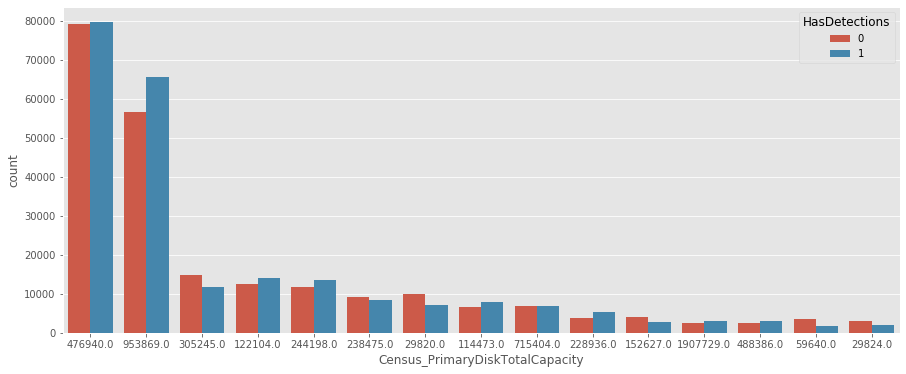

In [859]:
plt.figure(figsize= [15, 6])
sns.countplot(data=df, x='Census_PrimaryDiskTotalCapacity', hue='HasDetections', order=pd.value_counts(df['Census_PrimaryDiskTotalCapacity']).iloc[:15].index)

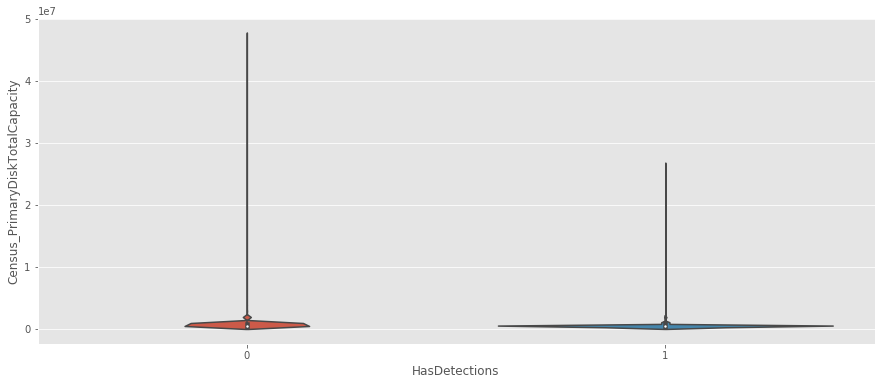

In [860]:
plt.figure(figsize= [15, 6])
sns.violinplot(data=df, y='Census_PrimaryDiskTotalCapacity', x='HasDetections')

Interesante que la mayoría de ordenadores son de 500gb de discoduro y el segundo lugar 1tb. Lo raro es como incide tener 1gb en la cantidad de detecciones

In [861]:
df['Census_PrimaryDiskTotalCapacity'].value_counts(normalize=False, dropna=False, sort=True, bins=7)

(-37437.429, 6821301.143]       497005
(6821301.143, 13632362.286]         13
(13632362.286, 20443423.429]         3
(40876606.857, 47687668.0]           1
(27254484.571, 34065545.714]         1
(20443423.429, 27254484.571]         1
(34065545.714, 40876606.857]         0
Name: Census_PrimaryDiskTotalCapacity, dtype: int64

In [862]:
df['Census_PrimaryDiskTotalCapacity'].sort_values(ascending=True)

832      10,240.00
1630     10,246.00
114814   10,471.00
58050    11,264.00
458821   11,264.00
            ...   
497960         nan
498024         nan
498223         nan
499268         nan
499279         nan
Name: Census_PrimaryDiskTotalCapacity, Length: 500000, dtype: float64

In [863]:
df['Census_PrimaryDiskTotalCapacity'].sort_values(ascending=False)

291414   47,687,668.00
61454    28,595,910.00
245320   26,707,905.00
73428    17,169,402.00
46877    17,166,135.00
              ...     
497960             nan
498024             nan
498223             nan
499268             nan
499279             nan
Name: Census_PrimaryDiskTotalCapacity, Length: 500000, dtype: float64

In [864]:
df['Census_PrimaryDiskTotalCapacity'].fillna(df['Census_PrimaryDiskTotalCapacity'].median(), inplace=True)

In [865]:
df['Census_PrimaryDiskTotalCapacity'].sort_values(ascending=False)

291414   47,687,668.00
61454    28,595,910.00
245320   26,707,905.00
73428    17,169,402.00
46877    17,166,135.00
              ...     
58050        11,264.00
458821       11,264.00
114814       10,471.00
1630         10,246.00
832          10,240.00
Name: Census_PrimaryDiskTotalCapacity, Length: 500000, dtype: float64

##### Atributo Census_PrimaryDiskTypeName

Atributo categórico. Friendly name of Primary Disk Type - HDD or SSD

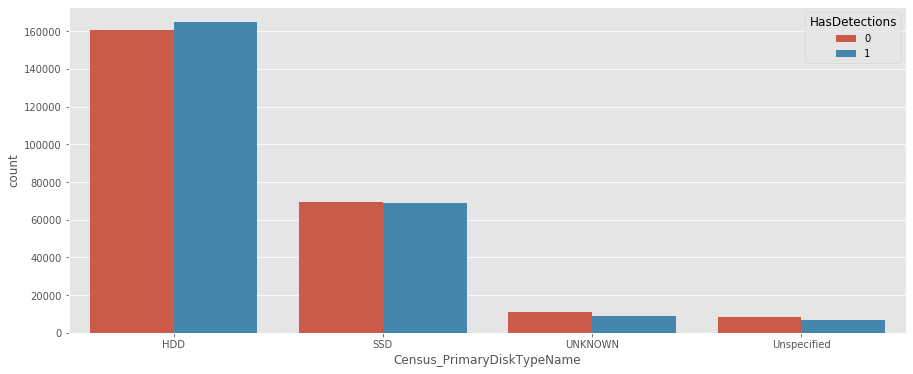

In [866]:
plt.figure(figsize= [15, 6])
sns.countplot(data=df, x='Census_PrimaryDiskTypeName', hue='HasDetections', order=pd.value_counts(df['Census_PrimaryDiskTypeName']).iloc[:15].index)

Se ve claramente que UNKNOWN y Unspecified se pueden juntar. 

In [867]:
df.loc[df['Census_PrimaryDiskTypeName'] == 'Unspecified' , 'Census_PrimaryDiskTypeName'] = 'UNKNOWN'

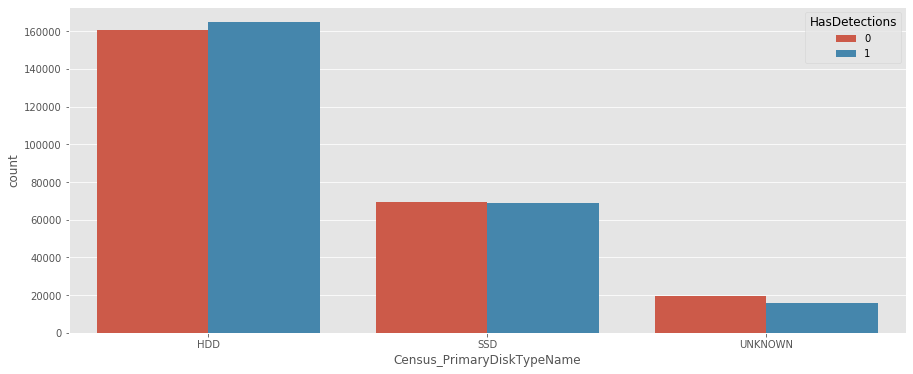

In [868]:
plt.figure(figsize= [15, 6])
sns.countplot(data=df, x='Census_PrimaryDiskTypeName', hue='HasDetections', order=pd.value_counts(df['Census_PrimaryDiskTypeName']).iloc[:15].index)

In [869]:
df['Census_PrimaryDiskTypeName'].fillna(value='-999', inplace=True)

In [870]:
df['Census_PrimaryDiskTypeName'].value_counts(normalize=False, dropna=False, sort=True)

HDD        325429
SSD        138155
UNKNOWN     35707
-999          709
Name: Census_PrimaryDiskTypeName, dtype: int64

##### Atributo Census_SystemVolumeTotalCapacity

Atributo numérico. The size of the partition that the System volume is installed on in MB

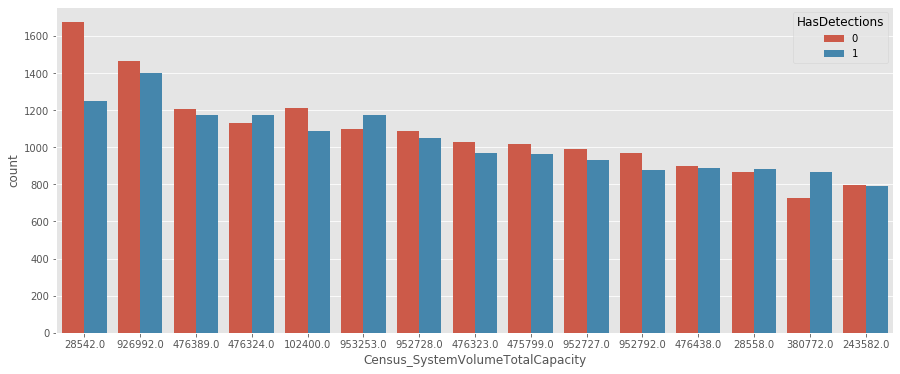

In [871]:
plt.figure(figsize= [15, 6])
sns.countplot(data=df, x='Census_SystemVolumeTotalCapacity', hue='HasDetections', order=pd.value_counts(df['Census_SystemVolumeTotalCapacity']).iloc[:15].index)

Es extraño que el valor con mayor frecuencia tengo un valor mucho más bajo que los demás. Igual es un error de datos de origen y no miden en muchos casos la partición real. 

In [872]:
df['Census_SystemVolumeTotalCapacity'].value_counts(normalize=False, dropna=False, sort=True)

nan             2976
28,542.00       2922
926,992.00      2866
476,389.00      2380
476,324.00      2306
                ... 
435,756.00         1
435,758.00         1
27,235.00          1
435,761.00         1
1,048,576.00       1
Name: Census_SystemVolumeTotalCapacity, Length: 142052, dtype: int64

In [873]:
df['Census_SystemVolumeTotalCapacity'].fillna(df['Census_SystemVolumeTotalCapacity'].median(), inplace=True)

##### Atributo Census_HasOpticalDiskDrive

Atributo booleano. True indicates that the machine has an optical disk drive (CD/DVD)

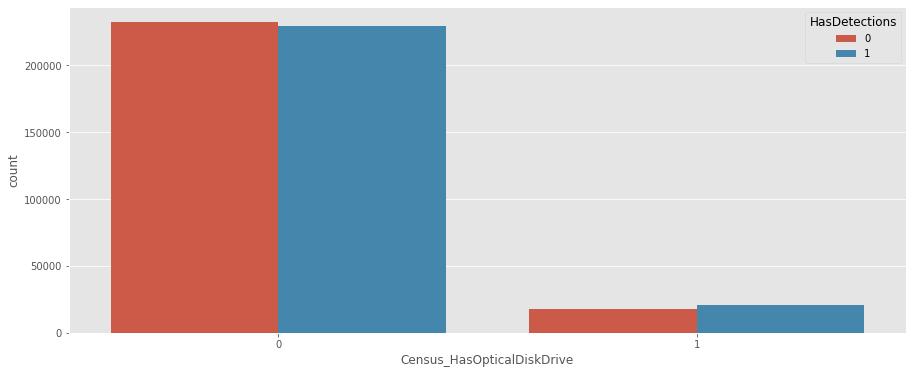

In [874]:
plt.figure(figsize= [15, 6])
sns.countplot(data=df, x='Census_HasOpticalDiskDrive', hue='HasDetections', order=pd.value_counts(df['Census_HasOpticalDiskDrive']).iloc[:15].index)

##### Atributo Census_TotalPhysicalRAM

Atributo numérico. Memoria ram del ordenador

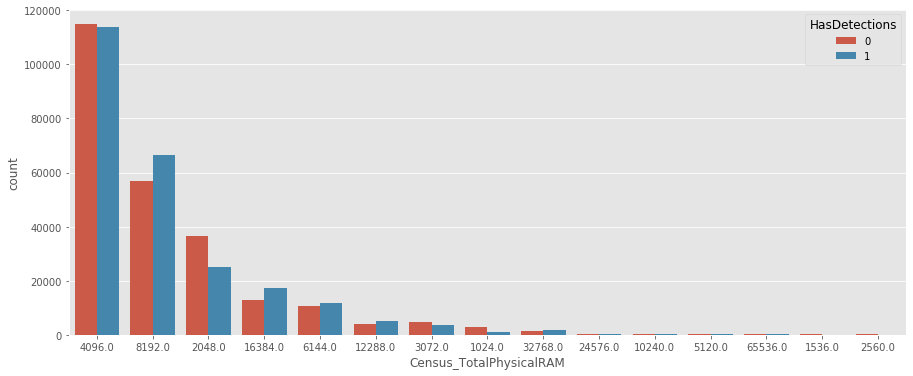

In [875]:
plt.figure(figsize= [15, 6])
sns.countplot(data=df, x='Census_TotalPhysicalRAM', hue='HasDetections', order=pd.value_counts(df['Census_TotalPhysicalRAM']).iloc[:15].index)

Interesante que la mayoría de los ordenadores tienen 4gb de ram

In [876]:
df['Census_TotalPhysicalRAM'].fillna(df['Census_TotalPhysicalRAM'].mode()[0], inplace=True)

##### Atributo Census_ChassisTypeName

Atributo categórico. Retrieves a numeric representation of what type of chassis the machine has

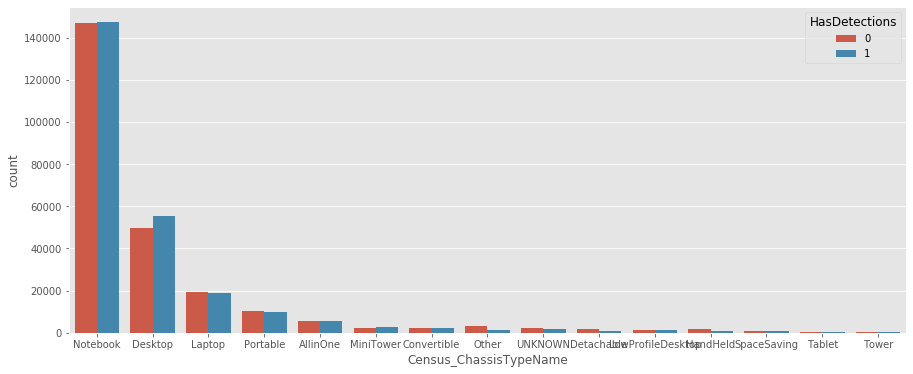

In [877]:
plt.figure(figsize= [15, 6])
sns.countplot(data=df, x='Census_ChassisTypeName', hue='HasDetections', order=pd.value_counts(df['Census_ChassisTypeName']).iloc[:15].index)

In [878]:
df['Census_ChassisTypeName'].value_counts(normalize=False, dropna=False).sort_values(0, ascending=False).sort_values(0, ascending=False)

Notebook               294232
Desktop                104979
Laptop                  38261
Portable                20181
AllinOne                11407
MiniTower                4849
Convertible              4685
Other                    4215
UNKNOWN                  3695
Detachable               2930
LowProfileDesktop        2878
HandHeld                 2652
SpaceSaving              1689
Tablet                    730
Tower                     692
Unknown                   575
MainServerChassis         512
MiniPC                    261
LunchBox                  224
RackMountChassis          189
SubNotebook                47
BusExpansionChassis        38
NaN                        37
30                         11
StickPC                     7
0                           5
35                          3
Blade                       3
PizzaBox                    3
MultisystemChassis          3
31                          2
SubChassis                  2
32                          1
25        

In [879]:
list = [   
'UNKNOWN',
'Other',
'30',
'StickPC',
'0',
'Blade',
'PizzaBox',
'35',
'MultisystemChassis',
'SubChassis',
'31',
'25',
'32',
'ExpansionChassis',  
]

In [880]:
df.loc[df['Census_ChassisTypeName'].isin(list) == True, 'Census_ChassisTypeName'] = 'Unknown'

In [881]:
df['Census_ChassisTypeName'].fillna(value='-999', inplace=True)

In [882]:
df['Census_ChassisTypeName'].value_counts(normalize=False, dropna=False).sort_values(0, ascending=False).sort_values(0, ascending=False)

Notebook               294232
Desktop                104979
Laptop                  38261
Portable                20181
AllinOne                11407
Unknown                  8527
MiniTower                4849
Convertible              4685
Detachable               2930
LowProfileDesktop        2878
HandHeld                 2652
SpaceSaving              1689
Tablet                    730
Tower                     692
MainServerChassis         512
MiniPC                    261
LunchBox                  224
RackMountChassis          189
SubNotebook                47
BusExpansionChassis        38
-999                       37
Name: Census_ChassisTypeName, dtype: int64

##### Atributo Census_InternalPrimaryDiagonalDisplaySizeInInches

Atributo numérico. Retrieves the physical diagonal length in inches of the primary display

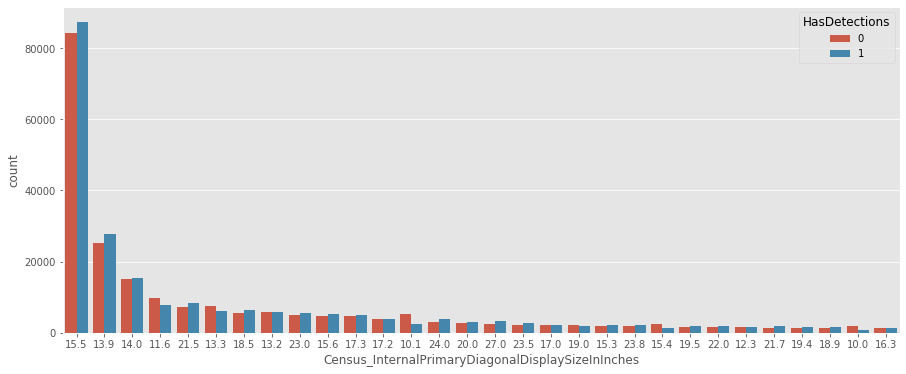

In [883]:
plt.figure(figsize= [15, 6])
sns.countplot(data=df, x='Census_InternalPrimaryDiagonalDisplaySizeInInches', hue='HasDetections', order=pd.value_counts(df['Census_InternalPrimaryDiagonalDisplaySizeInInches']).iloc[:30].index)

In [884]:
df['Census_InternalPrimaryDiagonalDisplaySizeInInches'].value_counts(normalize=False, dropna=False).sort_values(0, ascending=False).sort_values(0, ascending=False)

15.50     171319
13.90      52873
14.00      30492
11.60      17592
21.50      15441
           ...  
65.70          1
55.50          1
74.50          1
115.60         1
5.00           1
Name: Census_InternalPrimaryDiagonalDisplaySizeInInches, Length: 521, dtype: int64

In [885]:
df['Census_InternalPrimaryDiagonalDisplaySizeInInches'].describe()

count   497,346.00
mean         16.69
std           5.93
min           4.90
25%          13.90
50%          15.50
75%          17.20
max         142.00
Name: Census_InternalPrimaryDiagonalDisplaySizeInInches, dtype: float64

In [886]:
df['Census_InternalPrimaryDiagonalDisplaySizeInInches'].fillna(df['Census_InternalPrimaryDiagonalDisplaySizeInInches'].median(), inplace=True)

##### Atributo Census_InternalPrimaryDisplayResolutionHorizontal

Atributo numérico. Retrieves the number of pixels in the horizontal direction of the internal display.

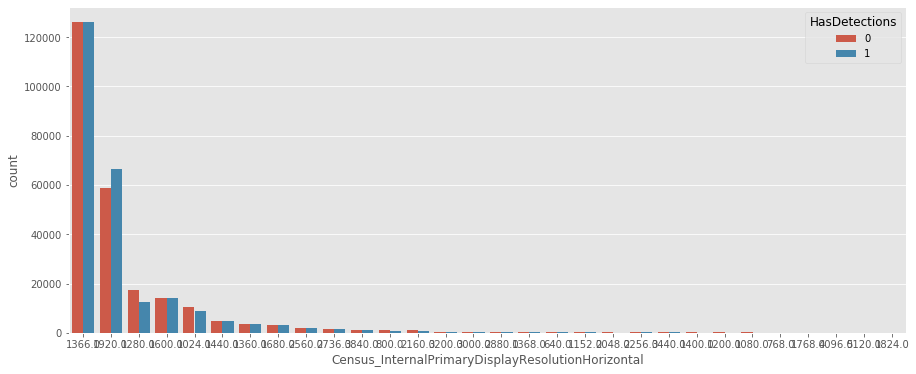

In [887]:
plt.figure(figsize= [15, 6])
sns.countplot(data=df, x='Census_InternalPrimaryDisplayResolutionHorizontal', hue='HasDetections', order=pd.value_counts(df['Census_InternalPrimaryDisplayResolutionHorizontal']).iloc[:30].index)

In [888]:
df['Census_InternalPrimaryDisplayResolutionHorizontal'].value_counts(normalize=False, dropna=False).sort_values(0, ascending=False).sort_values(0, ascending=False)

1,366.00     251999
1,920.00     125095
1,280.00      29690
1,600.00      28231
1,024.00      19327
1,440.00       9441
1,360.00       7058
1,680.00       6234
2,560.00       3989
2,736.00       3159
nan            2650
3,840.00       2479
800.00         1784
2,160.00       1760
3,200.00        978
3,000.00        606
2,880.00        557
1,368.00        480
640.00          464
1,152.00        433
2,048.00        308
2,256.00        300
3,440.00        284
1,400.00        261
1,200.00        211
1,080.00        195
768.00          178
1,768.00        112
4,096.00        106
5,120.00         95
1,824.00         95
2,304.00         94
1,800.00         93
3,240.00         82
1,776.00         82
3,360.00         70
1,536.00         67
600.00           53
1,842.00         50
1,364.00         37
4,500.00         34
1,916.00         29
900.00           21
1,050.00         19
1,176.00         19
5,760.00         18
1,716.00         17
1,862.00         16
720.00           13
1,792.00         11


In [889]:
df['Census_InternalPrimaryDisplayResolutionHorizontal'].describe()

count   497,350.00
mean      1,548.30
std         368.57
min          -1.00
25%       1,366.00
50%       1,366.00
75%       1,920.00
max      11,520.00
Name: Census_InternalPrimaryDisplayResolutionHorizontal, dtype: float64

In [890]:
df['Census_InternalPrimaryDisplayResolutionHorizontal'].sort_values(ascending=True).head(10)

212946    -1.00
100896    -1.00
365272    -1.00
269786    -1.00
372876   320.00
141391   360.00
46572    400.00
378491   480.00
103845   480.00
464832   480.00
Name: Census_InternalPrimaryDisplayResolutionHorizontal, dtype: float64

Los valores negativos deben ser un error.

In [891]:
df.loc[df['Census_InternalPrimaryDisplayResolutionHorizontal'] < 0, 'Census_InternalPrimaryDisplayResolutionHorizontal'] = df['Census_InternalPrimaryDisplayResolutionHorizontal'].median()

In [892]:
df['Census_InternalPrimaryDisplayResolutionHorizontal'].sort_values(ascending=False).head(10)

310525   11,520.00
37586    11,520.00
499582   10,320.00
266645    7,680.00
11608     7,680.00
412488    6,048.00
177910    6,016.00
117303    5,984.00
169679    5,870.00
495321    5,760.00
Name: Census_InternalPrimaryDisplayResolutionHorizontal, dtype: float64

In [893]:
df['Census_InternalPrimaryDisplayResolutionHorizontal'].fillna(df['Census_InternalPrimaryDisplayResolutionHorizontal'].median(), inplace=True)

##### Atributo Census_InternalPrimaryDisplayResolutionVertical

Atributo numérico. Retrieves the number of pixels in the verticalhorizontal direction of the internal display.

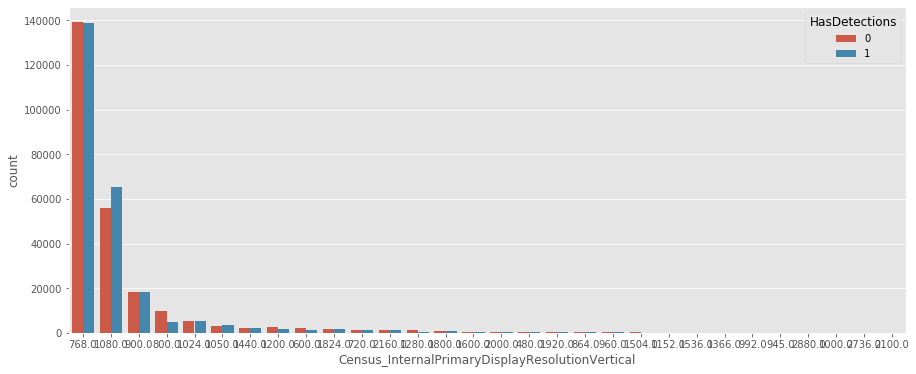

In [894]:
plt.figure(figsize= [15, 6])
sns.countplot(data=df, x='Census_InternalPrimaryDisplayResolutionVertical', hue='HasDetections', order=pd.value_counts(df['Census_InternalPrimaryDisplayResolutionVertical']).iloc[:30].index)

In [895]:
df['Census_InternalPrimaryDisplayResolutionVertical'].describe()

count   497,350.00
mean        898.24
std         214.86
min          -1.00
25%         768.00
50%         768.00
75%       1,080.00
max       4,320.00
Name: Census_InternalPrimaryDisplayResolutionVertical, dtype: float64

In [896]:
df['Census_InternalPrimaryDisplayResolutionVertical'].nunique()

514

In [897]:
df['Census_InternalPrimaryDisplayResolutionVertical'].value_counts(normalize=False, dropna=False).sort_values(0, ascending=False).sort_values(0, ascending=False)

768.00      277762
1,080.00    121145
900.00       36912
800.00       14687
1,024.00     10603
             ...  
778.00           1
782.00           1
784.00           1
1,570.00         1
1,535.00         1
Name: Census_InternalPrimaryDisplayResolutionVertical, Length: 515, dtype: int64

In [898]:
df['Census_InternalPrimaryDisplayResolutionVertical'].sort_values(ascending=True).head(10)

269786    -1.00
212946    -1.00
365272    -1.00
100896    -1.00
372876   200.00
46572    300.00
141391   360.00
295775   400.00
231366   400.00
429401   400.00
Name: Census_InternalPrimaryDisplayResolutionVertical, dtype: float64

Los valores negativos deben ser un error.

In [899]:
df.loc[df['Census_InternalPrimaryDisplayResolutionVertical'] < 0, 'Census_InternalPrimaryDisplayResolutionVertical'] = df['Census_InternalPrimaryDisplayResolutionVertical'].median()

In [900]:
df['Census_InternalPrimaryDisplayResolutionVertical'].sort_values(ascending=False).head(10)

11608    4,320.00
309871   3,840.00
140431   3,840.00
490244   3,840.00
182774   3,840.00
116686   3,840.00
158843   3,840.00
172348   3,840.00
280293   3,840.00
102819   3,840.00
Name: Census_InternalPrimaryDisplayResolutionVertical, dtype: float64

In [901]:
df['Census_InternalPrimaryDisplayResolutionVertical'].fillna(df['Census_InternalPrimaryDisplayResolutionVertical'].median(), inplace=True)

##### Atributo Census_PowerPlatformRoleName

Atributo categórico. Indicates the OEM preferred power management profile. This value helps identify the basic form factor of the device

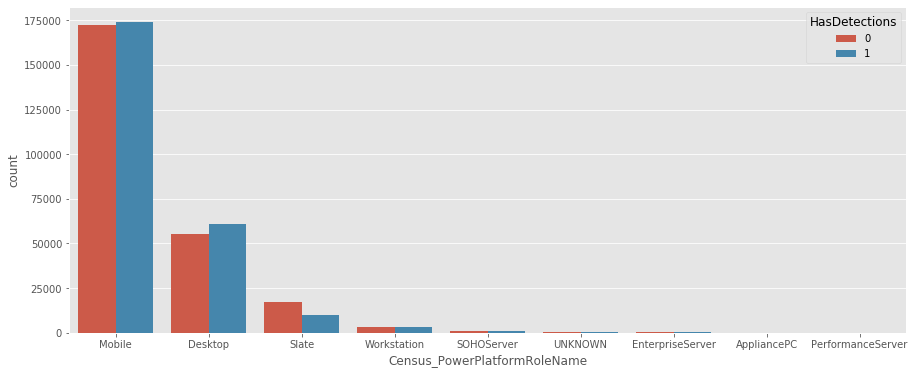

In [902]:
plt.figure(figsize= [15, 6])
sns.countplot(data=df, x='Census_PowerPlatformRoleName', hue='HasDetections', order=pd.value_counts(df['Census_PowerPlatformRoleName']).iloc[:30].index)

In [903]:
df['Census_PowerPlatformRoleName'].fillna(value='-999', inplace=True)

In [904]:
df['Census_PowerPlatformRoleName'].value_counts(normalize=False, dropna=False).sort_values(0, ascending=False).sort_values(0, ascending=False)

Mobile               346378
Desktop              116054
Slate                 27475
Workstation            6235
SOHOServer             2062
UNKNOWN                1172
EnterpriseServer        406
AppliancePC             212
PerformanceServer         4
-999                      2
Name: Census_PowerPlatformRoleName, dtype: int64

##### Atributo Census_InternalBatteryType

Atributo categórico. Sin información. 

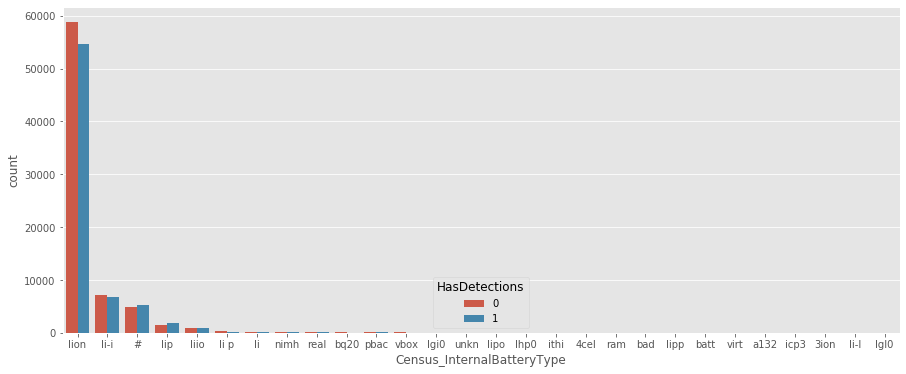

In [905]:
plt.figure(figsize= [15, 6])
sns.countplot(data=df, x='Census_InternalBatteryType', hue='HasDetections', order=pd.value_counts(df['Census_InternalBatteryType']).iloc[:30].index)

In [912]:
df['Census_InternalBatteryType'].value_counts(normalize=False, dropna=False).sort_values(0, ascending=False).sort_values(0, ascending=False)

resto    355800
lion     113500
li-i      13855
#         10176
lip        3326
liio       1814
li p        466
li          356
nimh        272
real        162
bq20        143
pbac        130
Name: Census_InternalBatteryType, dtype: int64

In [907]:
df['Census_InternalBatteryType'].nunique()

28

Se pueden agrupar las variables con menos frequencia

In [908]:
list = (df['Census_InternalBatteryType'].value_counts(dropna=True).values > 100)
len(list[list==True])

11

In [909]:
list_1 = df['Census_InternalBatteryType'].value_counts(dropna=True).head(len(list[list==True])).index
df.loc[df['Census_InternalBatteryType'].isin(list_1)==False, 'Census_InternalBatteryType'] = 'resto'

In [910]:
df['Census_InternalBatteryType'].fillna(value='-999', inplace=True)

In [911]:
df['Census_InternalBatteryType'].astype(str)

0         resto
1          lion
2          lion
3         resto
4         resto
          ...  
499995     lion
499996    resto
499997    resto
499998    resto
499999    resto
Name: Census_InternalBatteryType, Length: 500000, dtype: object

##### Atributo Census_InternalBatteryNumberOfCharges

Atributo numérico sin información

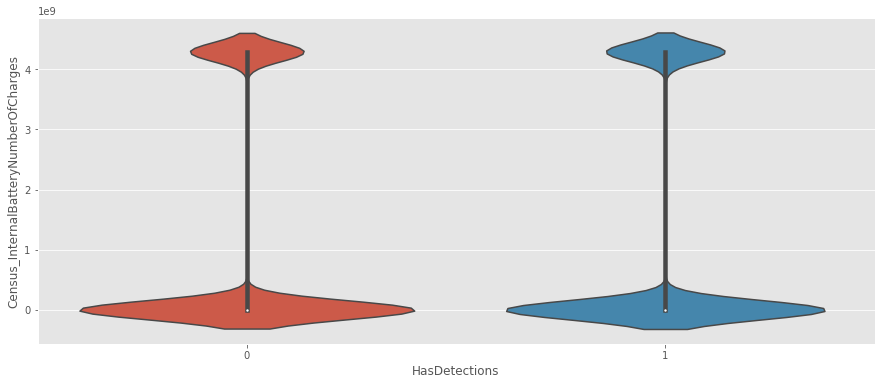

In [913]:
plt.figure(figsize= [15, 6])
sns.violinplot(data=df, y='Census_InternalBatteryNumberOfCharges', x='HasDetections')

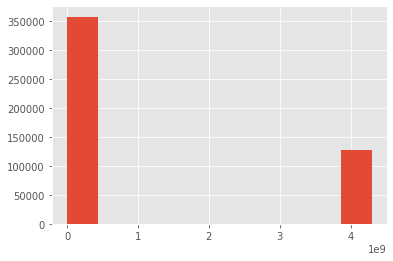

In [914]:
df['Census_InternalBatteryNumberOfCharges'].hist()

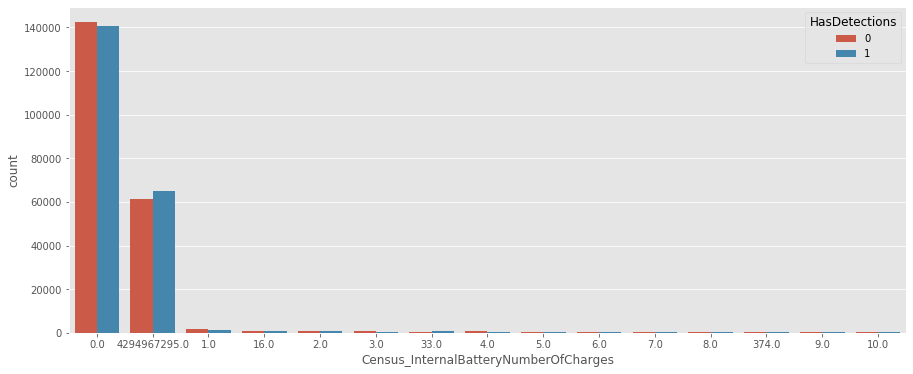

In [915]:
plt.figure(figsize= [15, 6])
sns.countplot(data=df, x='Census_InternalBatteryNumberOfCharges', hue='HasDetections', order=pd.value_counts(df['Census_InternalBatteryNumberOfCharges']).iloc[:15].index)

Son muy raros estos valores. Tiene un número muy elevado con una alta frequencia. Por ser decision-tree no creará problemas. Pero seguro en regresión lineal lo daría. 

In [916]:
df['Census_InternalBatteryNumberOfCharges'].fillna(df['Census_InternalBatteryNumberOfCharges'].median(), inplace=True)

##### Atributo Census_OSVersion

Atributo categórico. 

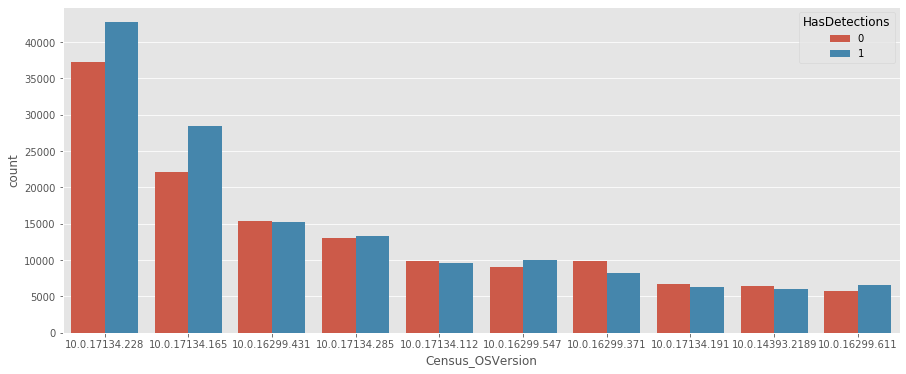

In [917]:
plt.figure(figsize= [15, 6])
sns.countplot(data=df, x='Census_OSVersion', hue='HasDetections', order=pd.value_counts(df['Census_OSVersion']).iloc[:10].index)

In [918]:
df['Census_OSVersion'].value_counts(normalize=False, dropna=False).sort_values(0, ascending=False).sort_values(0, ascending=False)

10.0.17134.228      79975
10.0.17134.165      50511
10.0.16299.431      30519
10.0.17134.285      26289
10.0.17134.112      19501
10.0.16299.547      19179
10.0.16299.371      18195
10.0.17134.191      12990
10.0.14393.2189     12409
10.0.16299.611      12267
10.0.16299.125      12038
10.0.10240.17443    11476
10.0.10586.1176     10235
10.0.16299.492       9467
10.0.16299.309       8293
10.0.17134.286       7840
10.0.16299.15        6717
10.0.17134.254       6292
10.0.15063.1206      5700
10.0.17134.1         5678
10.0.15063.1266      5642
10.0.16299.192       5563
10.0.17134.167       4842
10.0.17134.137       4420
10.0.16299.248       4282
10.0.17134.48        3808
10.0.15063.0         3619
10.0.15063.1088      3535
10.0.14393.0         3311
10.0.17134.81        3044
10.0.14393.693       2801
10.0.15063.1155      2565
10.0.10586.164       2322
10.0.10586.318       2257
10.0.10586.0         2242
10.0.14393.2214      2183
10.0.15063.786       2139
10.0.16299.665       2118
10.0.15063.6

Agrupamos las menos frecuentes

In [921]:
list = (df['Census_OSVersion'].value_counts(dropna=True).values > 100)
len(list[list==True])

136

In [922]:
list_1 = df['Census_OSVersion'].value_counts(dropna=True).head(len(list[list==True])).index
df.loc[df['Census_OSVersion'].isin(list_1)==False, 'Census_OSVersion'] = 'resto'

In [923]:
df['Census_OSVersion'].nunique()

137

In [924]:
df['Census_OSVersion'].astype(str)

0          10.0.17134.165
1          10.0.17134.165
2         10.0.10586.1176
3          10.0.17134.286
4          10.0.17134.228
               ...       
499995     10.0.16299.492
499996     10.0.16299.309
499997     10.0.17134.285
499998     10.0.16299.371
499999     10.0.17134.228
Name: Census_OSVersion, Length: 500000, dtype: object

##### Atributo Census_OSArchitecture

Valor categórico. Volvemos a sistema operativo. 

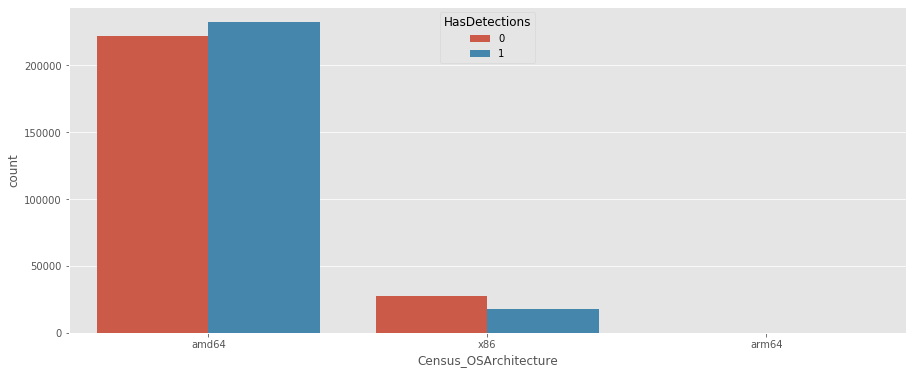

In [925]:
plt.figure(figsize= [15, 6])
sns.countplot(data=df, x='Census_OSArchitecture', hue='HasDetections', order=pd.value_counts(df['Census_OSArchitecture']).iloc[:10].index)

In [926]:
df['Census_OSArchitecture'].astype(str)

0         amd64
1         amd64
2         amd64
3         amd64
4         amd64
          ...  
499995    amd64
499996    amd64
499997      x86
499998    amd64
499999    amd64
Name: Census_OSArchitecture, Length: 500000, dtype: object

arm64 es un error

In [927]:
df.loc[df['Census_OSArchitecture'] == 'arm64', 'Census_OSArchitecture'] = 'amd64'

##### Atributo Census_OSBranch

Atributo categórico sobre el sistema operativo. 

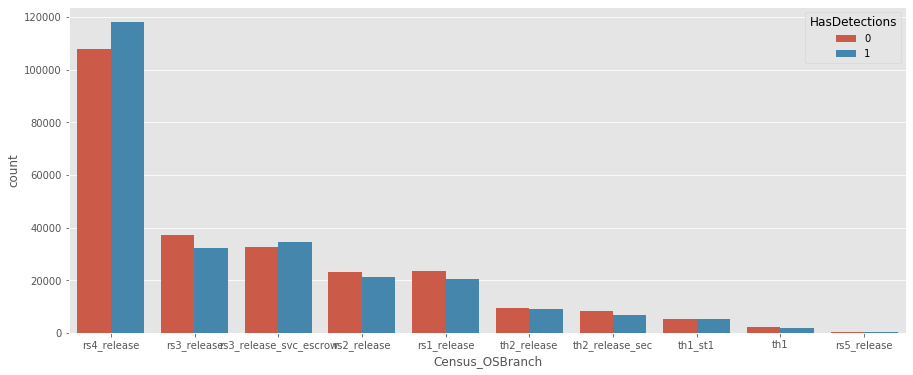

In [928]:
plt.figure(figsize= [15, 6])
sns.countplot(data=df, x='Census_OSBranch', hue='HasDetections', order=pd.value_counts(df['Census_OSBranch']).iloc[:10].index)

In [929]:
df['Census_OSBranch'].value_counts()

rs4_release                  226001
rs3_release                   69216
rs3_release_svc_escrow        67027
rs2_release                   44264
rs1_release                   43705
th2_release                   18298
th2_release_sec               14895
th1_st1                       10822
th1                            4284
rs5_release                     839
rs3_release_svc_escrow_im       329
rs_prerelease                   184
rs_prerelease_flt               132
rs5_release_sigma                 3
winblue_ltsb_escrow               1
Name: Census_OSBranch, dtype: int64

In [930]:
df['Census_OSBranch'].astype(str)

0                    rs4_release
1                    rs4_release
2                th2_release_sec
3                    rs4_release
4                    rs4_release
                   ...          
499995    rs3_release_svc_escrow
499996               rs3_release
499997               rs4_release
499998               rs3_release
499999               rs4_release
Name: Census_OSBranch, Length: 500000, dtype: object

##### Atributo Census_OSBuildNumber

Valor categírico. OS build.

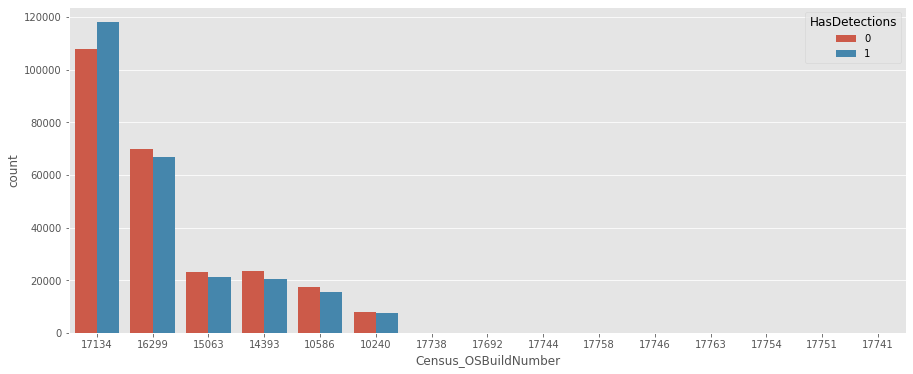

In [931]:
plt.figure(figsize= [15, 6])
sns.countplot(data=df, x='Census_OSBuildNumber', hue='HasDetections', order=pd.value_counts(df['Census_OSBuildNumber']).iloc[:15].index)

In [932]:
df['Census_OSBuildNumber'].astype(str)

0         17134
1         17134
2         10586
3         17134
4         17134
          ...  
499995    16299
499996    16299
499997    17134
499998    16299
499999    17134
Name: Census_OSBuildNumber, Length: 500000, dtype: object

In [933]:
df['Census_OSBuildNumber'].nunique()

61

In [938]:
df['Census_OSBuildNumber'].value_counts(normalize=False, dropna=False).sort_values(0, ascending=False)

17134    227107
16299    136572
15063     44262
14393     43702
10586     33193
10240     15106
Resto        58
Name: Census_OSBuildNumber, dtype: int64

Un poco de limpieza de outiers no irá mal.

In [935]:
df.loc[(df['Census_OSBuildNumber']>=17000) & (df['Census_OSBuildNumber']<18000),'Census_OSBuildNumber'] = 17134

In [936]:
list = df['Census_OSBuildNumber'].value_counts(normalize=False, dropna=False).sort_values(0, ascending=False).head(6).index

In [937]:
df.loc[df['Census_OSBuildNumber'].isin(list)==False, 'Census_OSBuildNumber'] = 'Resto'

##### Atributo Census_OSBuildRevision

Atributo categórico. 

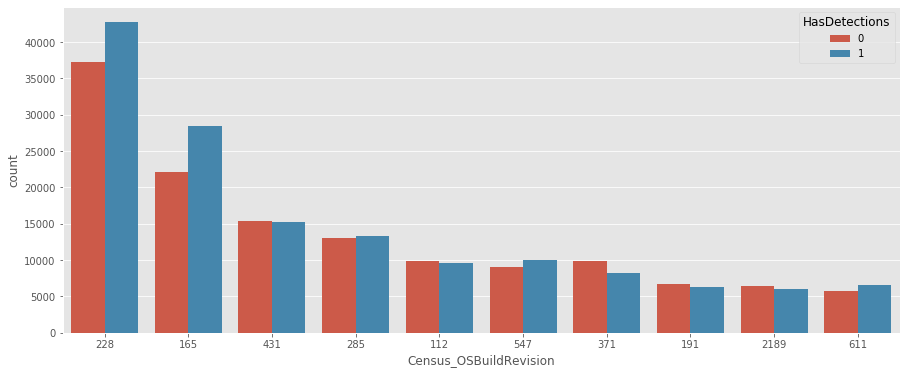

In [939]:
plt.figure(figsize= [15, 6])
sns.countplot(data=df, x='Census_OSBuildRevision', hue='HasDetections', order=pd.value_counts(df['Census_OSBuildRevision']).iloc[:10].index)

In [940]:
df['Census_OSBuildRevision'].astype(str)

0          165
1          165
2         1176
3          286
4          228
          ... 
499995     492
499996     309
499997     285
499998     371
499999     228
Name: Census_OSBuildRevision, Length: 500000, dtype: object

In [941]:
df['Census_OSBuildRevision'].nunique()

242

Agrupamos los valores menos frequentes.

In [944]:
list = (df['Census_OSBuildRevision'].value_counts(dropna=True).values > 100)
len(list[list==True])

133

In [945]:
list_1 = df['Census_OSBuildRevision'].value_counts(dropna=True).head(len(list[list==True])).index
df.loc[df['Census_OSBuildRevision'].isin(list_1)==False, 'Census_OSBuildRevision'] = 'resto'

##### Atributo Census_OSEdition

Atributo categórico

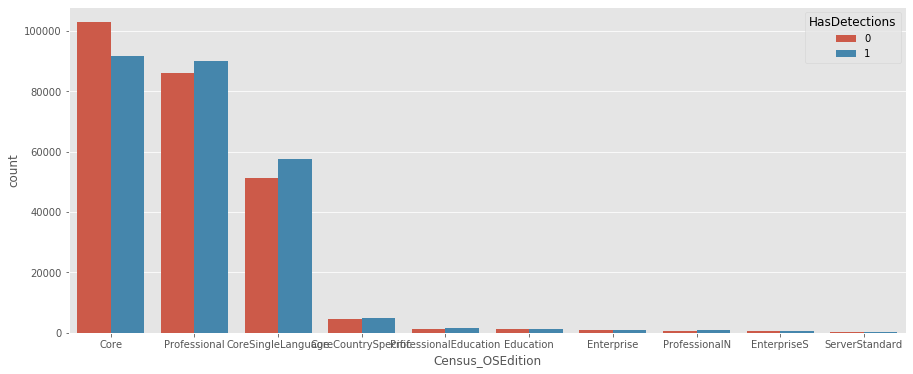

In [946]:
plt.figure(figsize= [15, 6])
sns.countplot(data=df, x='Census_OSEdition', hue='HasDetections', order=pd.value_counts(df['Census_OSEdition']).iloc[:10].index)

In [947]:
df['Census_OSEdition'].value_counts(normalize=False, dropna=False).sort_values(0, ascending=False).sort_values(0, ascending=False)

Core                        194469
Professional                175808
CoreSingleLanguage          108696
CoreCountrySpecific           9275
ProfessionalEducation         3100
Education                     2310
Enterprise                    2055
ProfessionalN                 1624
EnterpriseS                   1108
ServerStandard                 584
Cloud                          336
CoreN                          251
ServerStandardEval             151
EducationN                      61
EnterpriseSN                    47
ServerDatacenterEval            47
ServerSolution                  34
EnterpriseN                     28
ProfessionalEducationN          12
ProfessionalWorkstation          2
CloudN                           1
ProfessionalWorkstationN         1
Name: Census_OSEdition, dtype: int64

In [948]:
df['Census_OSEdition'].astype(str)

0         Professional
1         Professional
2                 Core
3                 Core
4         Professional
              ...     
499995            Core
499996            Core
499997    Professional
499998    Professional
499999    Professional
Name: Census_OSEdition, Length: 500000, dtype: object

##### Atributo Census_OSSkuName

Atributo categórico. OS edition friendly name 

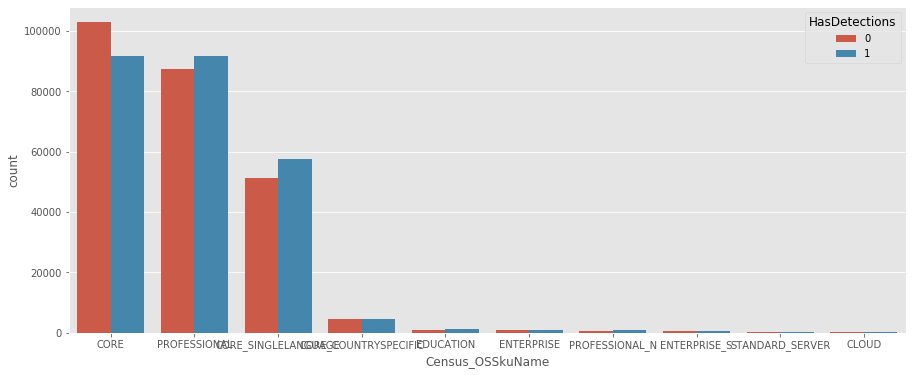

In [949]:
plt.figure(figsize= [15, 6])
sns.countplot(data=df, x='Census_OSSkuName', hue='HasDetections', order=pd.value_counts(df['Census_OSSkuName']).iloc[:10].index)

In [950]:
df['Census_OSSkuName'].value_counts(normalize=False, dropna=False).sort_values(0, ascending=False).sort_values(0, ascending=False)

CORE                            194464
PROFESSIONAL                    178947
CORE_SINGLELANGUAGE             108674
CORE_COUNTRYSPECIFIC              9257
EDUCATION                         2313
ENTERPRISE                        2063
PROFESSIONAL_N                    1634
ENTERPRISE_S                      1107
STANDARD_SERVER                    584
CLOUD                              332
CORE_N                             251
STANDARD_EVALUATION_SERVER         151
EDUCATION_N                         61
ENTERPRISE_S_N                      48
DATACENTER_EVALUATION_SERVER        47
SB_SOLUTION_SERVER                  34
ENTERPRISE_N                        28
PRO_WORKSTATION                      2
PRO_WORKSTATION_N                    1
UNLICENSED                           1
CLOUDN                               1
Name: Census_OSSkuName, dtype: int64

In [951]:
df['Census_OSSkuName'].astype(str)

0         PROFESSIONAL
1         PROFESSIONAL
2                 CORE
3                 CORE
4         PROFESSIONAL
              ...     
499995            CORE
499996            CORE
499997    PROFESSIONAL
499998    PROFESSIONAL
499999    PROFESSIONAL
Name: Census_OSSkuName, Length: 500000, dtype: object

##### Atributo Census_OSInstallTypeName

Atributo categórico. Friendly description of what install was used on the machine 

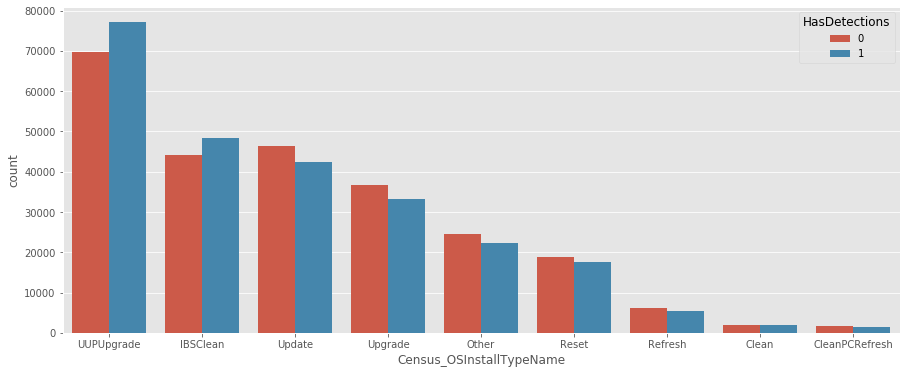

In [952]:
plt.figure(figsize= [15, 6])
sns.countplot(data=df, x='Census_OSInstallTypeName', hue='HasDetections', order=pd.value_counts(df['Census_OSInstallTypeName']).iloc[:10].index)

In [953]:
df['Census_OSInstallTypeName'].value_counts(normalize=False, dropna=False).sort_values(0, ascending=False).sort_values(0, ascending=False)

UUPUpgrade        146780
IBSClean           92403
Update             88892
Upgrade            70013
Other              46960
Reset              36510
Refresh            11540
Clean               3885
CleanPCRefresh      3017
Name: Census_OSInstallTypeName, dtype: int64

Ojo con el UUPUpgrade que parece un error de Upgrade. Se dejó porque tiene muchas repeticiones y no estamos seguros del error.

In [955]:
df['Census_OSInstallTypeName'].astype(str)

0         UUPUpgrade
1         UUPUpgrade
2             Update
3           IBSClean
4             Update
             ...    
499995       Upgrade
499996       Upgrade
499997       Upgrade
499998       Upgrade
499999    UUPUpgrade
Name: Census_OSInstallTypeName, Length: 500000, dtype: object

##### Atributo Census_OSInstallLanguageIdentifier

Atributo categórico. No tiene información. 

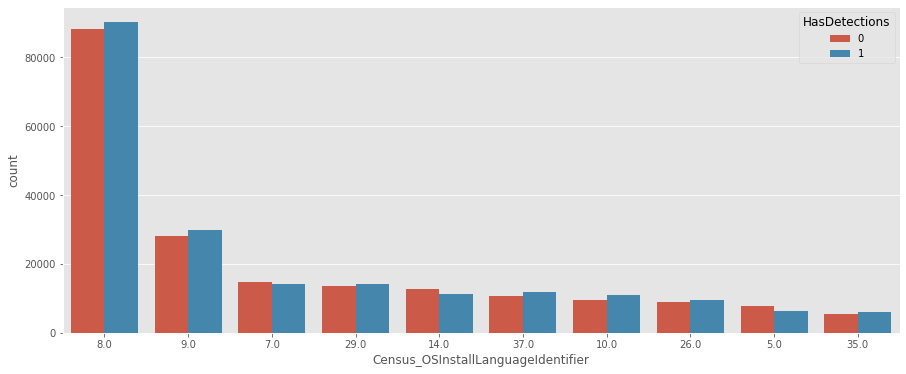

In [956]:
plt.figure(figsize= [15, 6])
sns.countplot(data=df, x='Census_OSInstallLanguageIdentifier', hue='HasDetections', order=pd.value_counts(df['Census_OSInstallLanguageIdentifier']).iloc[:10].index)

In [957]:
df['Census_OSInstallLanguageIdentifier'].value_counts(normalize=False, dropna=False).sort_values(0, ascending=False).sort_values(0, ascending=False)

8.00     178405
9.00      58013
7.00      28766
29.00     27669
14.00     24191
37.00     22635
10.00     20268
26.00     18520
5.00      14085
35.00     11497
39.00     11221
18.00     10600
20.00      9512
24.00      8127
25.00      7502
27.00      5956
19.00      4775
17.00      4695
1.00       4516
3.00       4067
nan        3332
6.00       2881
33.00      2807
15.00      2311
4.00       1996
30.00      1793
23.00      1652
31.00      1213
12.00      1119
2.00       1096
36.00       846
16.00       837
28.00       713
34.00       584
13.00       581
21.00       413
32.00       246
11.00       197
38.00       185
22.00       178
Name: Census_OSInstallLanguageIdentifier, dtype: int64

In [958]:
df['Census_OSInstallLanguageIdentifier'].nunique()

39

In [959]:
df['Census_OSInstallLanguageIdentifier'].fillna(value='-999', inplace=True)

In [960]:
df['Census_OSInstallLanguageIdentifier'].astype(str)

0         27.0
1         18.0
2         24.0
3         27.0
4          8.0
          ... 
499995     8.0
499996    24.0
499997     8.0
499998     8.0
499999     8.0
Name: Census_OSInstallLanguageIdentifier, Length: 500000, dtype: object

##### Atributo Census_OSUILocaleIdentifier

Atributo categórico. 

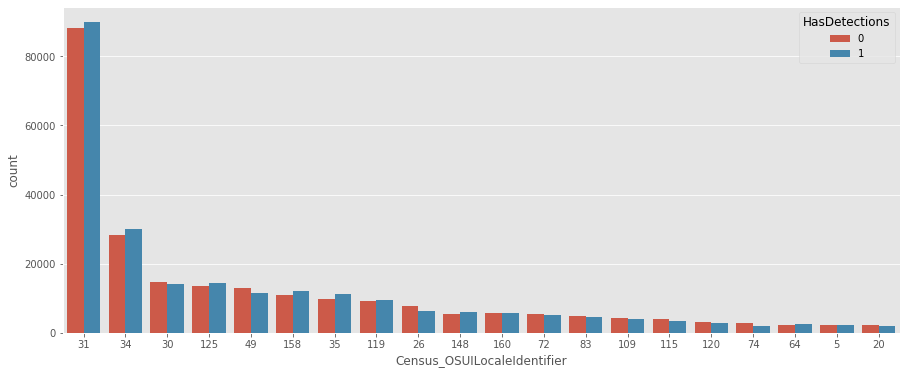

In [961]:
plt.figure(figsize= [15, 6])
sns.countplot(data=df, x='Census_OSUILocaleIdentifier', hue='HasDetections', order=pd.value_counts(df['Census_OSUILocaleIdentifier']).iloc[:20].index)

In [962]:
df['Census_OSUILocaleIdentifier'].nunique()

92

In [966]:
df['Census_OSUILocaleIdentifier'].value_counts(normalize=False, dropna=False).sort_values(0, ascending=False).sort_values(0, ascending=False)

31       177983
34        58307
30        28798
125       28001
49        24423
158       22930
35        20890
119       18696
26        14096
148       11617
160       11244
72        10662
83         9596
109        8143
115        7496
120        5993
74         4791
64         4747
5          4599
20         4087
28         2895
140        2815
58         2339
24         2004
128        1808
105        1654
130        1246
11         1120
44         1118
151         863
62          857
123         718
48          597
145         589
90          432
156         421
68          259
136         256
38          206
Resto       195
159         195
92          188
17          126
Name: Census_OSUILocaleIdentifier, dtype: int64

Se limpiará un poco los outliers

In [964]:
list = df['Census_OSUILocaleIdentifier'].value_counts(normalize=False, dropna=False).sort_values(0, ascending=False).head(42).index
df.loc[df['Census_OSUILocaleIdentifier'].isin(list)==False, 'Census_OSUILocaleIdentifier'] = 'Resto'


In [965]:
df['Census_OSUILocaleIdentifier'].astype(str)

0         120
1          72
2         109
3         120
4          31
         ... 
499995     31
499996    109
499997     31
499998     31
499999     31
Name: Census_OSUILocaleIdentifier, Length: 500000, dtype: object

##### Atributo Census_OSWUAutoUpdateOptionsName

Categórica sin información

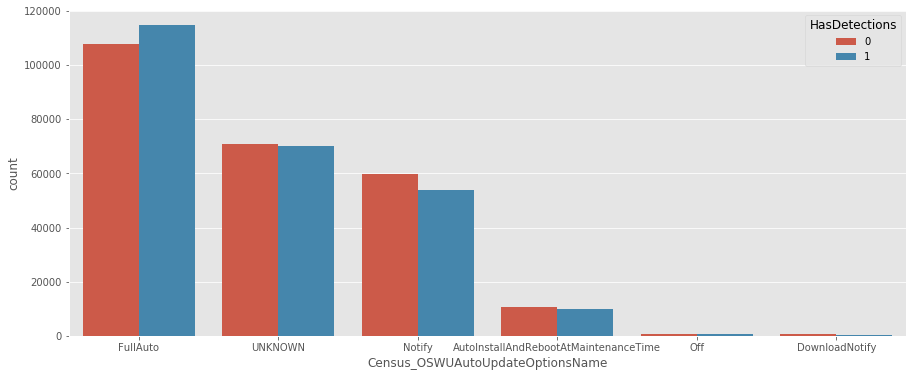

In [967]:
plt.figure(figsize= [15, 6])
sns.countplot(data=df, x='Census_OSWUAutoUpdateOptionsName', hue='HasDetections', order=pd.value_counts(df['Census_OSWUAutoUpdateOptionsName']).iloc[:20].index)

In [968]:
df['Census_OSWUAutoUpdateOptionsName'].value_counts(normalize=False, dropna=False).sort_values(0, ascending=False).sort_values(0, ascending=False)

FullAuto                                 222482
UNKNOWN                                  140961
Notify                                   113507
AutoInstallAndRebootAtMaintenanceTime     20731
Off                                        1506
DownloadNotify                              813
Name: Census_OSWUAutoUpdateOptionsName, dtype: int64

In [969]:
df['Census_OSWUAutoUpdateOptionsName'].astype(str)

0         FullAuto
1         FullAuto
2           Notify
3         FullAuto
4         FullAuto
            ...   
499995      Notify
499996     UNKNOWN
499997    FullAuto
499998    FullAuto
499999    FullAuto
Name: Census_OSWUAutoUpdateOptionsName, Length: 500000, dtype: object

##### Atributo Census_IsPortableOperatingSystem

Booleano que informa si es portatil el sistema operativo.

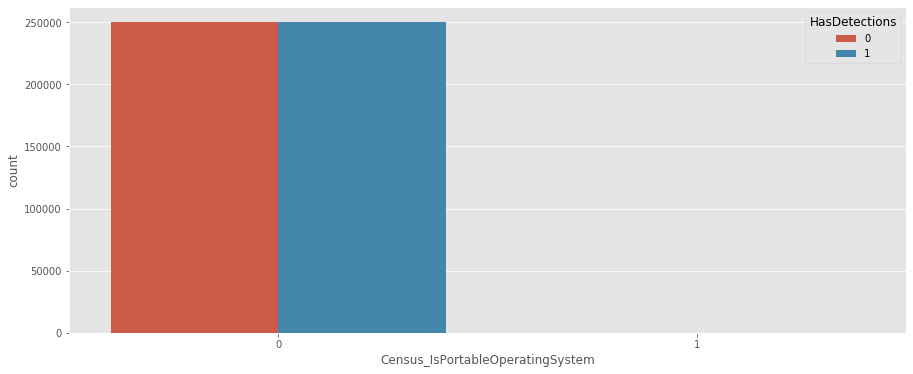

In [970]:
plt.figure(figsize= [15, 6])
sns.countplot(data=df, x='Census_IsPortableOperatingSystem', hue='HasDetections', order=pd.value_counts(df['Census_IsPortableOperatingSystem']).iloc[:20].index)

In [971]:
df['Census_IsPortableOperatingSystem'].value_counts(normalize=False, dropna=False).sort_values(0, ascending=False).sort_values(0, ascending=False)

0    499739
1       261
Name: Census_IsPortableOperatingSystem, dtype: int64

In [972]:
pd.crosstab(df['Census_IsPortableOperatingSystem'], df['HasDetections'], normalize=False)

HasDetections,0,1
Census_IsPortableOperatingSystem,,
0,249921,249818
1,126,135


Es un atributo que no genera ningún tipo de valor al modelo. 

In [973]:
df.drop(columns='Census_IsPortableOperatingSystem', inplace=True)

##### Atributo Census_GenuineStateName

Categórica. Friendly name of OSGenuineStateID

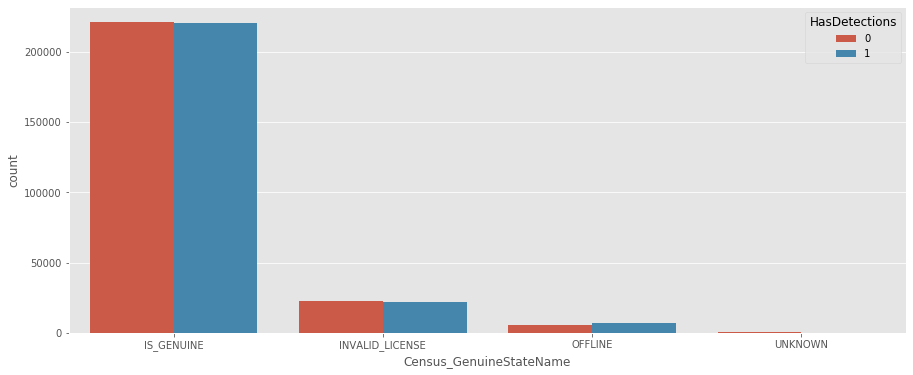

In [974]:
plt.figure(figsize= [15, 6])
sns.countplot(data=df, x='Census_GenuineStateName', hue='HasDetections', order=pd.value_counts(df['Census_GenuineStateName']).iloc[:20].index)

##### Atributo Census_ActivationChannel

Categórica. Retail license key or Volume license key for a machine

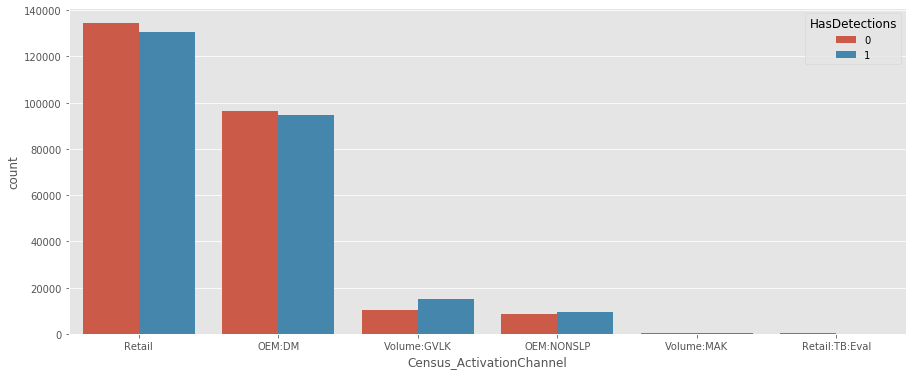

In [975]:
plt.figure(figsize= [15, 6])
sns.countplot(data=df, x='Census_ActivationChannel', hue='HasDetections', order=pd.value_counts(df['Census_ActivationChannel']).iloc[:20].index)

##### Atributo Census_IsFlightingInternal

Booleano sin información. 

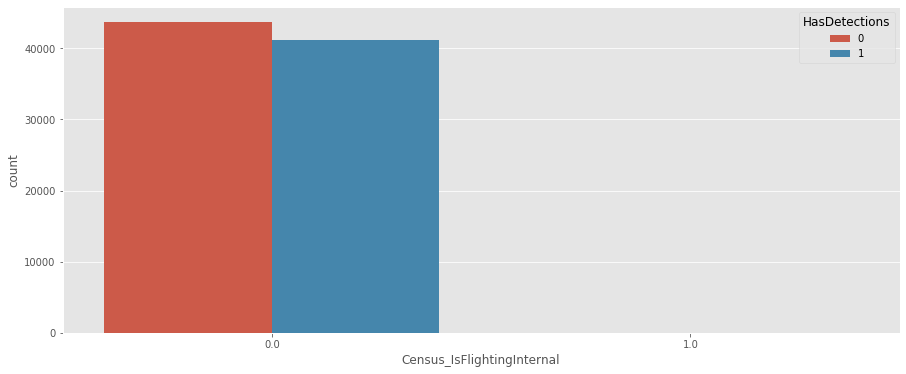

In [976]:
plt.figure(figsize= [15, 6])
sns.countplot(data=df, x='Census_IsFlightingInternal', hue='HasDetections', order=pd.value_counts(df['Census_IsFlightingInternal']).iloc[:20].index)

In [977]:
df['Census_IsFlightingInternal'].value_counts(normalize=False, dropna=False).sort_values(0, ascending=False).sort_values(0, ascending=False)

nan     415225
0.00     84773
1.00         2
Name: Census_IsFlightingInternal, dtype: int64

Este atributo no tiene ninguna información para el modelo.

In [978]:
df.drop(columns=['Census_IsFlightingInternal'], inplace=True)

##### Atributo Census_IsFlightsDisabled

Atributo booleano. Indicates if the machine is participating in flighting.

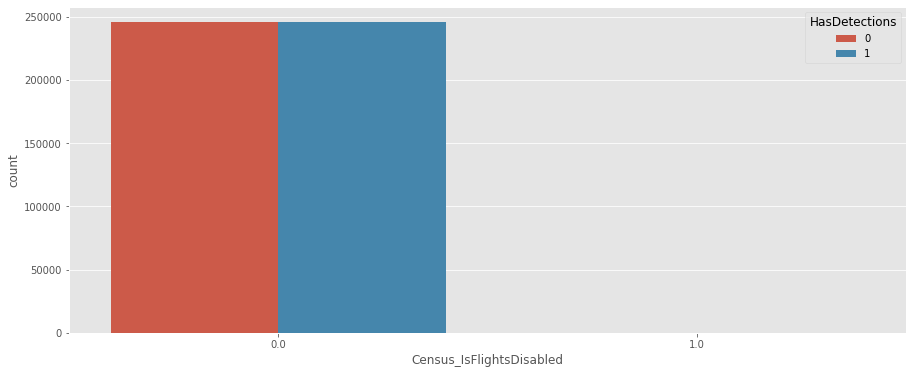

In [979]:
plt.figure(figsize= [15, 6])
sns.countplot(data=df, x='Census_IsFlightsDisabled', hue='HasDetections', order=pd.value_counts(df['Census_IsFlightsDisabled']).iloc[:20].index)

In [980]:
df['Census_IsFlightsDisabled'].value_counts(normalize=False, dropna=False).sort_values(0, ascending=False).sort_values(0, ascending=False)

0.00    491060
nan       8933
1.00         7
Name: Census_IsFlightsDisabled, dtype: int64

Atributo sin ninguna información. Será borrada

In [981]:
df.drop(columns=['Census_IsFlightsDisabled'], inplace=True)

##### Atributo Census_FlightRing

Categórica. The ring that the device user would like to receive flights for. This might be different from the ring of the OS which is currently installed if the user changes the ring after getting a flight from a different ring.

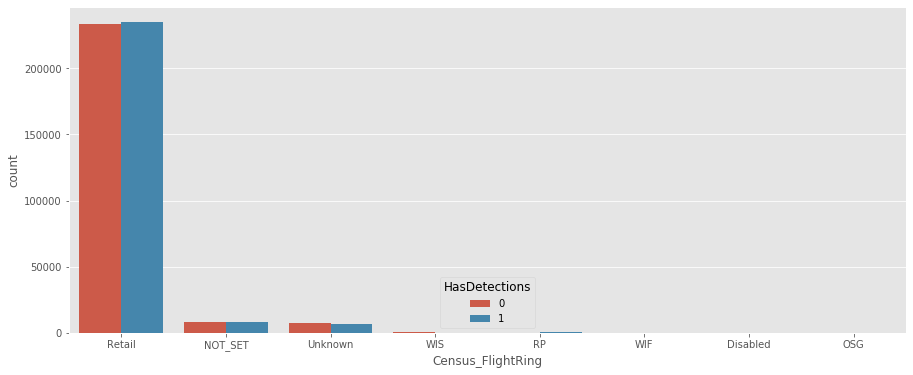

In [982]:
plt.figure(figsize= [15, 6])
sns.countplot(data=df, x='Census_FlightRing', hue='HasDetections', order=pd.value_counts(df['Census_FlightRing']).iloc[:20].index)

In [983]:
df['Census_FlightRing'].value_counts(normalize=False, dropna=False).sort_values(0, ascending=False).sort_values(0, ascending=False)

Retail      468299
NOT_SET      16044
Unknown      13701
WIS            606
RP             583
WIF            549
Disabled       217
OSG              1
Name: Census_FlightRing, dtype: int64

##### Atributo Census_ThresholdOptIn

Booleano. Sin información. 

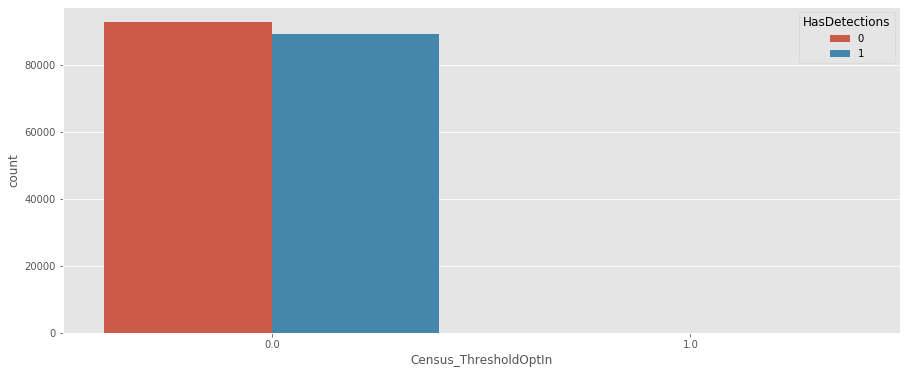

In [984]:
plt.figure(figsize= [15, 6])
sns.countplot(data=df, x='Census_ThresholdOptIn', hue='HasDetections', order=pd.value_counts(df['Census_ThresholdOptIn']).iloc[:20].index)

In [985]:
df['Census_ThresholdOptIn'].value_counts(normalize=False, dropna=False).sort_values(0, ascending=False).sort_values(0, ascending=False)

nan     318104
0.00    181849
1.00        47
Name: Census_ThresholdOptIn, dtype: int64

No genera ningín valor al modelo. Se borra el atributo. 

In [986]:
df.drop(columns=['Census_ThresholdOptIn'], inplace=True)

##### Atributo Census_FirmwareManufacturerIdentifier

Categórico. Sin información. 

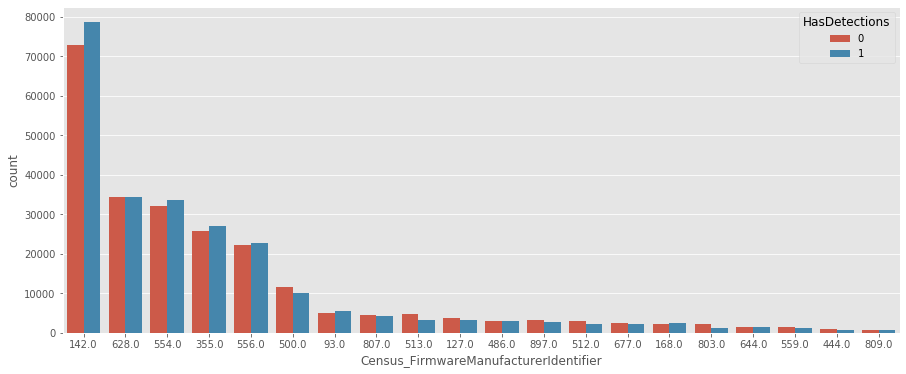

In [987]:
plt.figure(figsize= [15, 6])
sns.countplot(data=df, x='Census_FirmwareManufacturerIdentifier', hue='HasDetections', order=pd.value_counts(df['Census_FirmwareManufacturerIdentifier']).iloc[:20].index)

In [988]:
df['Census_FirmwareManufacturerIdentifier'].value_counts(normalize=False, dropna=False).sort_values(0, ascending=False).sort_values(0, ascending=False)

142.00      151374
628.00       68781
554.00       65673
355.00       52758
556.00       44919
500.00       21686
93.00        10666
nan          10349
807.00        8803
513.00        7899
127.00        6933
486.00        6060
897.00        6001
512.00        5303
677.00        4656
168.00        4603
803.00        3321
644.00        2756
559.00        2575
444.00        1666
809.00        1369
152.00        1342
134.00        1105
781.00         839
440.00         782
691.00         663
789.00         560
105.00         506
798.00         484
442.00         329
633.00         305
491.00         287
299.00         286
1,075.00       283
361.00         258
106.00         247
465.00         245
360.00         232
845.00         165
446.00         140
1,030.00       128
560.00         124
819.00         123
869.00         117
639.00         104
827.00         104
820.00          96
831.00          84
839.00          79
311.00          69
196.00          62
369.00          60
1,080.00    

In [989]:
df['Census_FirmwareManufacturerIdentifier'].nunique()

303

In [990]:
list = df['Census_FirmwareManufacturerIdentifier'].value_counts(normalize=False, dropna=False).sort_values(0, ascending=False).head(46).index
df.loc[df['Census_FirmwareManufacturerIdentifier'].isin(list)==False, 'Census_FirmwareManufacturerIdentifier'] = 'Resto'


In [991]:
df['Census_FirmwareManufacturerIdentifier'].fillna(value='-999', inplace=True)

In [992]:
df['Census_FirmwareManufacturerIdentifier'].astype(str)

0         355.0
1         486.0
2         554.0
3         142.0
4         355.0
          ...  
499995    554.0
499996     -999
499997    500.0
499998    628.0
499999    142.0
Name: Census_FirmwareManufacturerIdentifier, Length: 500000, dtype: object

##### Atributo Census_FirmwareVersionIdentifier

Categórico sin información

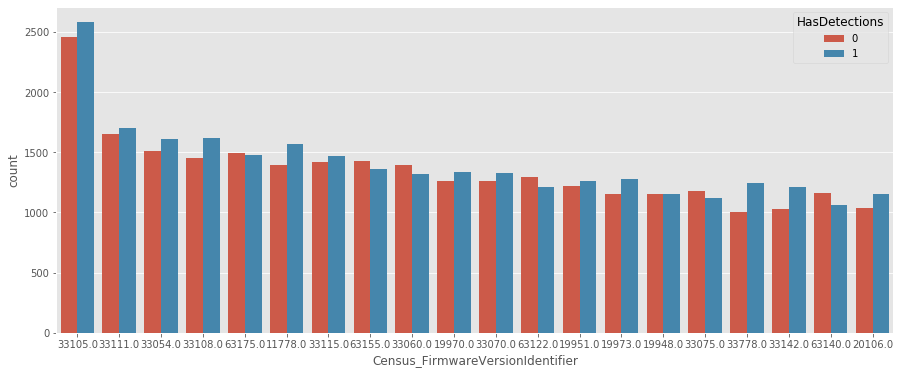

In [993]:
plt.figure(figsize= [15, 6])
sns.countplot(data=df, x='Census_FirmwareVersionIdentifier', hue='HasDetections', order=pd.value_counts(df['Census_FirmwareVersionIdentifier']).iloc[:20].index)

In [994]:
df['Census_FirmwareVersionIdentifier'].value_counts(normalize=False, dropna=False).sort_values(0, ascending=False).sort_values(0, ascending=False)

nan          9061
33,105.00    5036
33,111.00    3356
33,054.00    3124
33,108.00    3071
             ... 
9,705.00        1
38,823.00       1
45,643.00       1
48,235.00       1
3,185.00        1
Name: Census_FirmwareVersionIdentifier, Length: 23570, dtype: int64

In [995]:
df['Census_FirmwareVersionIdentifier'].nunique()

23569

Por la gran cardinalidad no se usará OHE. Se dejan los outliers. Posible mean encoding

In [996]:
df['Census_FirmwareVersionIdentifier'].fillna(value='-999', inplace=True)

In [997]:
df['Census_FirmwareVersionIdentifier'].astype(str)

0         19951.0
1         48753.0
2         33111.0
3         48473.0
4          4343.0
           ...   
499995    33088.0
499996       -999
499997    41727.0
499998    11947.0
499999    12103.0
Name: Census_FirmwareVersionIdentifier, Length: 500000, dtype: object

##### Atributo Census_IsSecureBootEnabled

Booleano. Indicates if Secure Boot mode is enabled

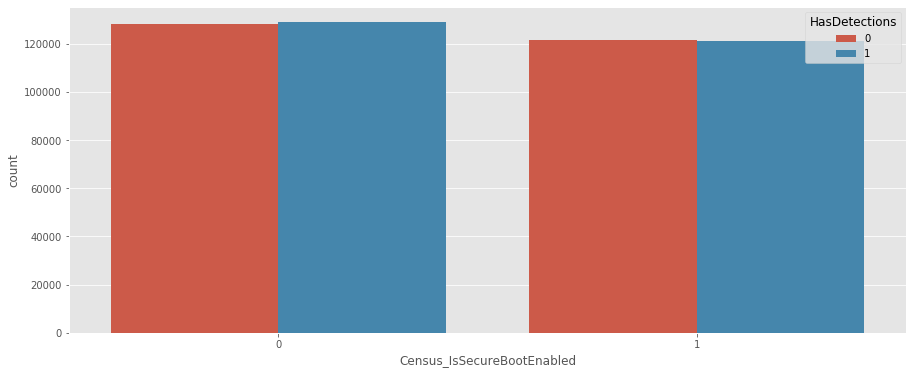

In [998]:
plt.figure(figsize= [15, 6])
sns.countplot(data=df, x='Census_IsSecureBootEnabled', hue='HasDetections', order=pd.value_counts(df['Census_IsSecureBootEnabled']).iloc[:20].index)

##### Atributo Census_IsWIMBootEnabled

Booleano. Identifies a Virtual Machine 

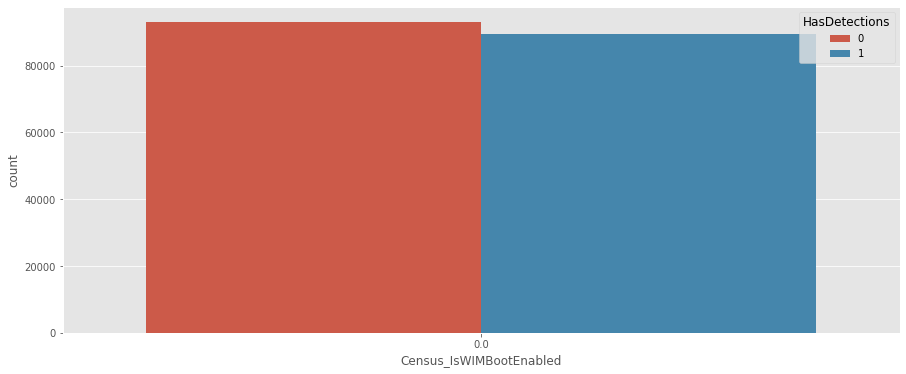

In [999]:
plt.figure(figsize= [15, 6])
sns.countplot(data=df, x='Census_IsWIMBootEnabled', hue='HasDetections', order=pd.value_counts(df['Census_IsWIMBootEnabled']).iloc[:20].index)

In [1000]:
df['Census_IsWIMBootEnabled'].value_counts(normalize=False, dropna=False).sort_values(0, ascending=False).sort_values(0, ascending=False)

nan     317666
0.00    182334
Name: Census_IsWIMBootEnabled, dtype: int64

Atributo sin ninguna información. 

In [1001]:
df.drop(columns=['Census_IsWIMBootEnabled'], inplace=True)

##### Atributo Census_IsVirtualDevice

Atributo booleano que identifica si se existe maquina virtual.

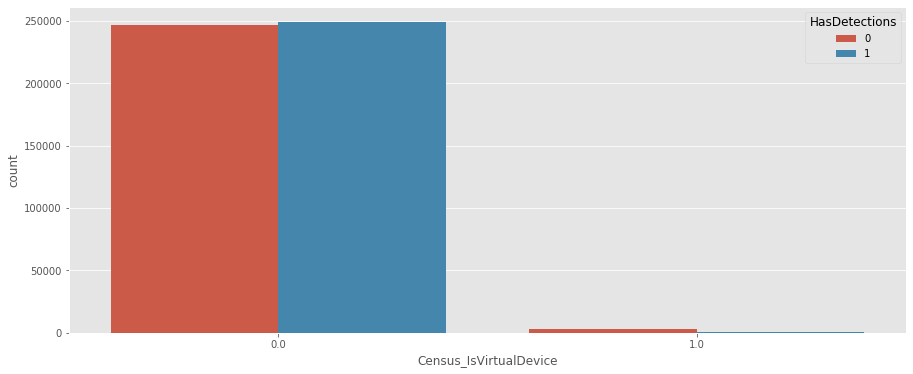

In [1002]:
plt.figure(figsize= [15, 6])
sns.countplot(data=df, x='Census_IsVirtualDevice', hue='HasDetections', order=pd.value_counts(df['Census_IsVirtualDevice']).iloc[:20].index)

In [1003]:
df['Census_IsVirtualDevice'].value_counts(normalize=False, dropna=False).sort_values(0, ascending=False).sort_values(0, ascending=False)

0.00    495572
1.00      3527
nan        901
Name: Census_IsVirtualDevice, dtype: int64

In [1004]:
df['Census_IsVirtualDevice'].fillna(df['Census_IsVirtualDevice'].mode()[0], inplace=True)

In [1005]:
df['Census_IsVirtualDevice'].value_counts(normalize=False, dropna=False).sort_values(0, ascending=False).sort_values(0, ascending=False)

0.00    496473
1.00      3527
Name: Census_IsVirtualDevice, dtype: int64

##### Atributo Census_IsTouchEnabled

Atributo booleano. Identifica si el equipo es touch. 

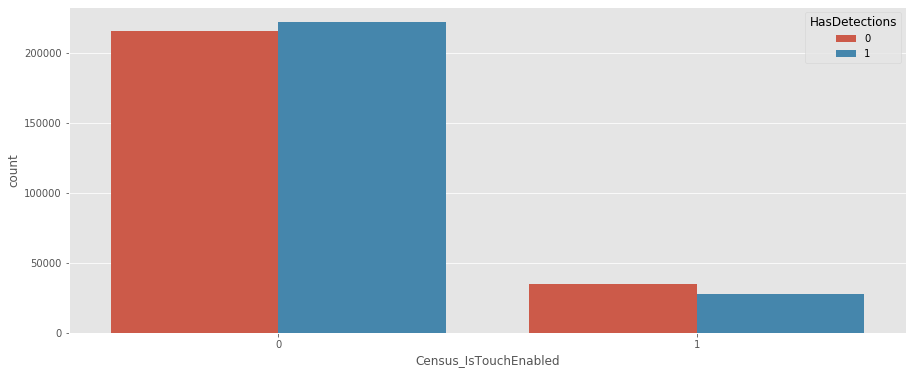

In [1006]:
plt.figure(figsize= [15, 6])
sns.countplot(data=df, x='Census_IsTouchEnabled', hue='HasDetections', order=pd.value_counts(df['Census_IsTouchEnabled']).iloc[:20].index)

In [1007]:
df['Census_IsTouchEnabled'].value_counts(normalize=False, dropna=False).sort_values(0, ascending=False).sort_values(0, ascending=False)

0    437283
1     62717
Name: Census_IsTouchEnabled, dtype: int64

##### Atributo Census_IsPenCapable

Atributo booleano. Identifica si el equipo está adapatado para lapiz táctil. 

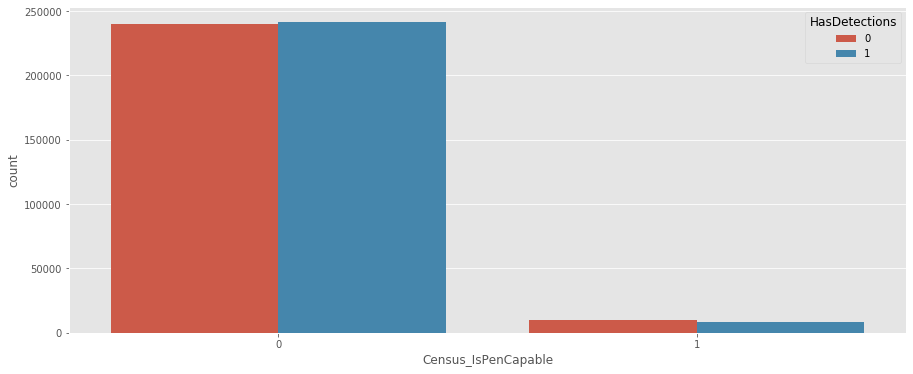

In [1008]:
plt.figure(figsize= [15, 6])
sns.countplot(data=df, x='Census_IsPenCapable', hue='HasDetections', order=pd.value_counts(df['Census_IsPenCapable']).iloc[:20].index)

In [1009]:
df['Census_IsPenCapable'].value_counts(normalize=False, dropna=False).sort_values(0, ascending=False).sort_values(0, ascending=False)

0    481128
1     18872
Name: Census_IsPenCapable, dtype: int64

##### Atributo Census_IsAlwaysOnAlwaysConnectedCapable

Atributo booleano. Retreives information about whether the battery enables the device to be AlwaysOnAlwaysConnected 

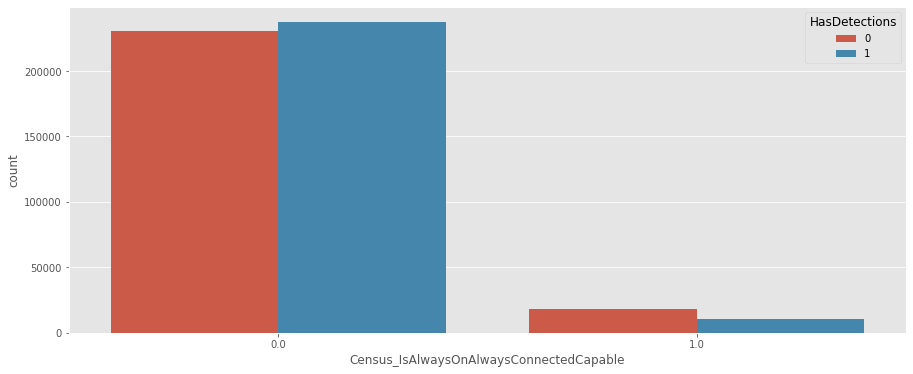

In [1010]:
plt.figure(figsize= [15, 6])
sns.countplot(data=df, x='Census_IsAlwaysOnAlwaysConnectedCapable', hue='HasDetections', order=pd.value_counts(df['Census_IsAlwaysOnAlwaysConnectedCapable']).iloc[:20].index)

In [1011]:
df['Census_IsAlwaysOnAlwaysConnectedCapable'].value_counts(normalize=False, dropna=False).sort_values(0, ascending=False).sort_values(0, ascending=False)

0.00    467569
1.00     28391
nan       4040
Name: Census_IsAlwaysOnAlwaysConnectedCapable, dtype: int64

In [1012]:
df['Census_IsAlwaysOnAlwaysConnectedCapable'].fillna(df['Census_IsAlwaysOnAlwaysConnectedCapable'].mode()[0], inplace=True)

##### Atributo Wdft_IsGamer

Attibuto booleano. Identifica si el ordenador es gamer. 

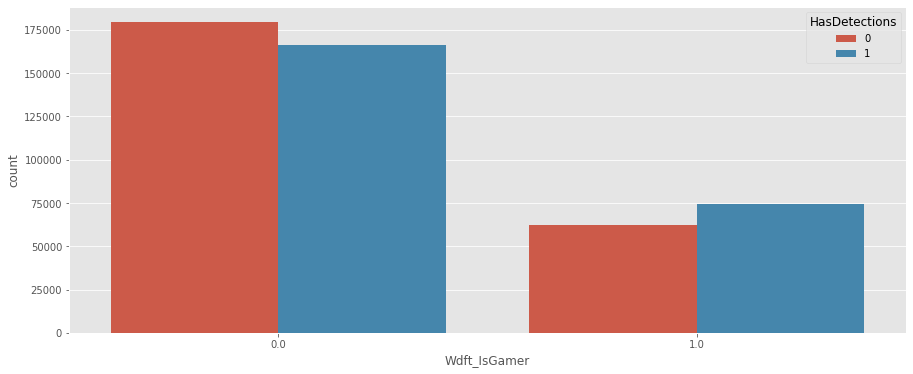

In [1013]:
plt.figure(figsize= [15, 6])
sns.countplot(data=df, x='Wdft_IsGamer', hue='HasDetections', order=pd.value_counts(df['Wdft_IsGamer']).iloc[:20].index)

In [1014]:
df['Wdft_IsGamer'].value_counts(normalize=False, dropna=False).sort_values(0, ascending=False).sort_values(0, ascending=False)

0.00    345835
1.00    137215
nan      16950
Name: Wdft_IsGamer, dtype: int64

In [1015]:
df['Wdft_IsGamer'].fillna(df['Wdft_IsGamer'].mode()[0], inplace=True)

##### Atributo Wdft_RegionIdentifier

Parece categórica. No tiene información. 

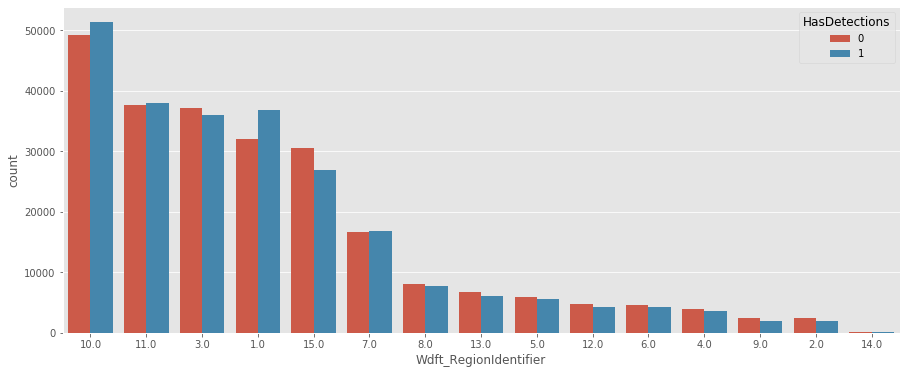

In [1016]:
plt.figure(figsize= [15, 6])
sns.countplot(data=df, x='Wdft_RegionIdentifier', hue='HasDetections', order=pd.value_counts(df['Wdft_RegionIdentifier']).iloc[:20].index)

In [1017]:
df['Wdft_RegionIdentifier'].value_counts(normalize=False, dropna=False).sort_values(0, ascending=False)

10.00    100392
11.00     75612
3.00      73069
1.00      68692
15.00     57346
7.00      33362
nan       16950
8.00      15761
13.00     12681
5.00      11466
12.00      9115
6.00       8750
4.00       7586
9.00       4521
2.00       4470
14.00       227
Name: Wdft_RegionIdentifier, dtype: int64

In [1018]:
df['Wdft_RegionIdentifier'].nunique()

15

In [1019]:
df['Wdft_RegionIdentifier'].fillna(value='-999', inplace=True)

In [1020]:
df['Wdft_RegionIdentifier'].astype(str)

0         11.0
1          3.0
2         15.0
3         15.0
4         13.0
          ... 
499995    10.0
499996    15.0
499997     8.0
499998     1.0
499999     4.0
Name: Wdft_RegionIdentifier, Length: 500000, dtype: object

### Separación de atributos

Se usa una función para separar los valores en categóricas, booleanas y numéricas. No se usará en el cálculo ya que no divide bien las variables, sin embargo da una buena visión.

In [1021]:
target = df['HasDetections']

In [1022]:
def obtener_lista_variables(dataset, target=[]):
    lista_numericas=[]
    lista_boolean=[]
    lista_categoricas=[]

    for i in dataset:
        if    (dataset[i].dtype=="float64" or dataset[i].dtype=="int64") and len(dataset[i].unique())!= 2  and i not in target:
              lista_numericas.append(i)
        elif  (dataset[i].dtype=="float64" or dataset[i].dtype=="int64") and len(dataset[i].unique())== 2  and i not in target:
              lista_boolean.append(i)
        elif  (dataset[i].dtype=="object" or dataset[i].dtype != "int64") and i not in target:
              lista_categoricas.append(i)
                
    return lista_numericas, lista_boolean, lista_categoricas

In [1023]:
list_num, list_bool, list_cat = obtener_lista_variables(df, target)

In [1024]:
list_num

['RtpStateBitfield',
 'AVProductsInstalled',
 'AVProductsEnabled',
 'CountryIdentifier',
 'OsBuild',
 'OsSuite',
 'Census_ProcessorCoreCount',
 'Census_PrimaryDiskTotalCapacity',
 'Census_SystemVolumeTotalCapacity',
 'Census_TotalPhysicalRAM',
 'Census_InternalPrimaryDiagonalDisplaySizeInInches',
 'Census_InternalPrimaryDisplayResolutionHorizontal',
 'Census_InternalPrimaryDisplayResolutionVertical',
 'Census_InternalBatteryNumberOfCharges']

In [1025]:
list_bool

['IsSxsPassiveMode',
 'HasTpm',
 'IsProtected',
 'SMode',
 'Firewall',
 'UacLuaenable',
 'Census_HasOpticalDiskDrive',
 'Census_IsSecureBootEnabled',
 'Census_IsVirtualDevice',
 'Census_IsTouchEnabled',
 'Census_IsPenCapable',
 'Census_IsAlwaysOnAlwaysConnectedCapable',
 'Wdft_IsGamer',
 'HasDetections']

In [1026]:
list_cat

['ProductName',
 'EngineVersion',
 'AppVersion',
 'AvSigVersion',
 'DefaultBrowsersIdentifier',
 'AVProductStatesIdentifier',
 'CityIdentifier',
 'OrganizationIdentifier',
 'GeoNameIdentifier',
 'LocaleEnglishNameIdentifier',
 'Platform',
 'Processor',
 'OsPlatformSubRelease',
 'OsBuildLab',
 'SkuEdition',
 'IeVerIdentifier',
 'SmartScreen',
 'Census_MDC2FormFactor',
 'Census_DeviceFamily',
 'Census_OEMNameIdentifier',
 'Census_OEMModelIdentifier',
 'Census_ProcessorManufacturerIdentifier',
 'Census_ProcessorModelIdentifier',
 'Census_PrimaryDiskTypeName',
 'Census_ChassisTypeName',
 'Census_PowerPlatformRoleName',
 'Census_InternalBatteryType',
 'Census_OSVersion',
 'Census_OSArchitecture',
 'Census_OSBranch',
 'Census_OSBuildNumber',
 'Census_OSBuildRevision',
 'Census_OSEdition',
 'Census_OSSkuName',
 'Census_OSInstallTypeName',
 'Census_OSInstallLanguageIdentifier',
 'Census_OSUILocaleIdentifier',
 'Census_OSWUAutoUpdateOptionsName',
 'Census_GenuineStateName',
 'Census_ActivationC

In [1027]:
df.isnull().sum()

ProductName                                          0
EngineVersion                                        0
AppVersion                                           0
AvSigVersion                                         0
RtpStateBitfield                                     0
IsSxsPassiveMode                                     0
DefaultBrowsersIdentifier                            0
AVProductStatesIdentifier                            0
AVProductsInstalled                                  0
AVProductsEnabled                                    0
HasTpm                                               0
CountryIdentifier                                    0
CityIdentifier                                       0
OrganizationIdentifier                               0
GeoNameIdentifier                                    0
LocaleEnglishNameIdentifier                          0
Platform                                             0
Processor                                            0
OsBuild   

### Correlación entre atributos numéricos

Aunque se coloque todo el dataframe en el mapa de calor, solo tomará los valores numéricos y booleanos. 

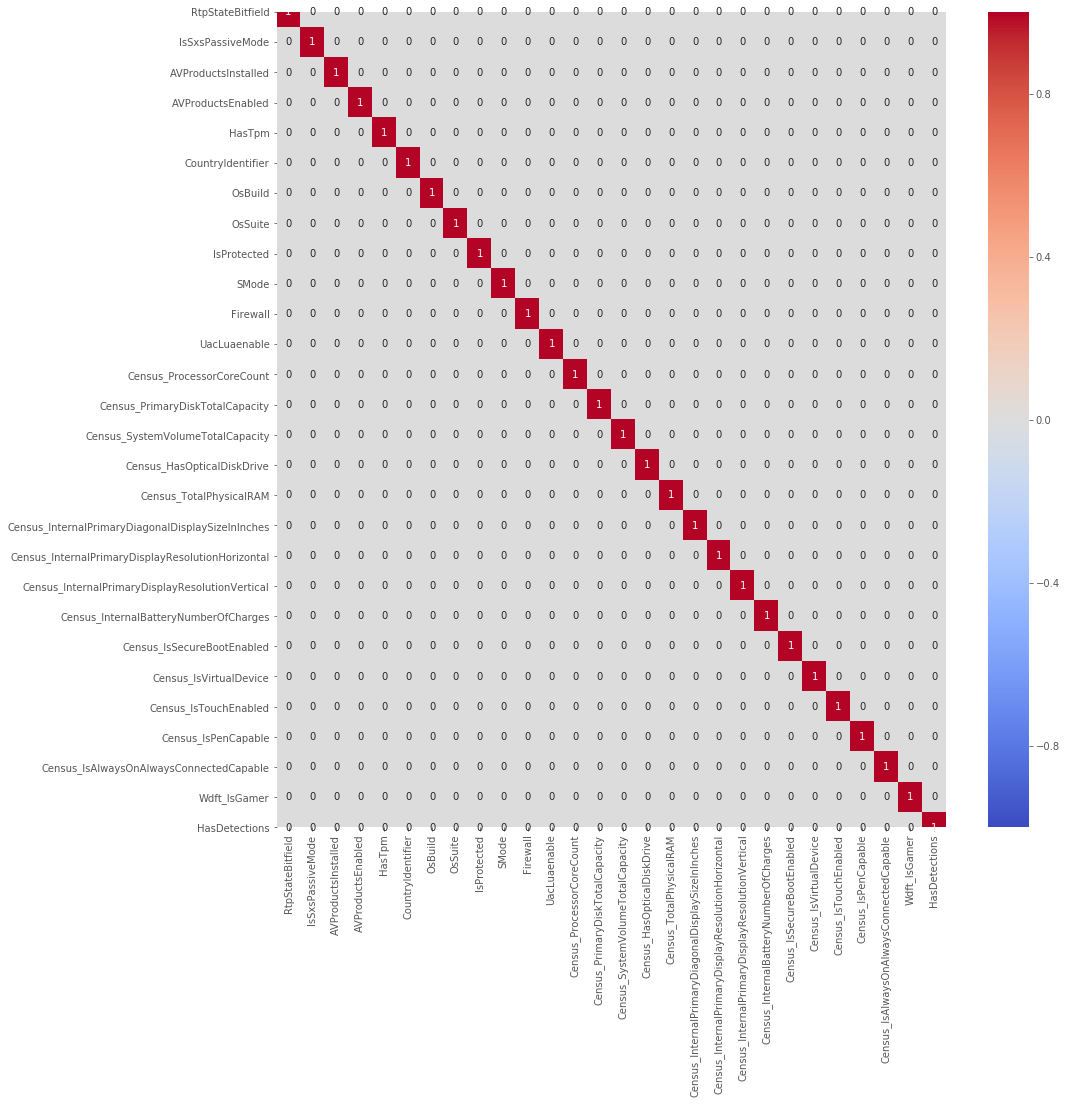

In [1028]:
corr = df.corr()
corr[np.abs(corr)<.9] = 0
plt.figure(figsize=(15,15))
sns.heatmap(corr,
            vmin=-1,
            vmax=1,
            cmap='coolwarm',
            annot=True);

Entre los atributos numéricos y booleanos hay muy poca correlación. La máxima correlación es 0.94 y no se borrará ningún atributo porque todavía hay información que podemos aprovechar para el modelo.  

### Tramiento de las categóricas.

#### Análisis de categóricas

Se realizarán dos tipos de encoding, Por un lado el OHE para todos los atributos que lo permiten, y por otro lado el mean encoding para los atributos con demasiada cardinalidad. 

Las columnas se obtienen del análisis en un Excel aparte.

In [1029]:
list_mean = [
'AvSigVersion', 
'AVProductStatesIdentifier', 
'CityIdentifier',
'Census_OEMNameIdentifier',
'Census_OEMModelIdentifier',
'Census_ProcessorModelIdentifier',
'Census_FirmwareVersionIdentifier'
]

In [1030]:
list_ohe = [
'ProductName', 
'EngineVersion', 
'AppVersion', 
'DefaultBrowsersIdentifier',
'CountryIdentifier',
'OsBuildLab',
'IeVerIdentifier',
'OrganizationIdentifier',
'LocaleEnglishNameIdentifier',
'GeoNameIdentifier',
'Platform',
'Processor',
'OsVer',
'OsBuild',
'OsSuite',
'OsPlatformSubRelease',
'SkuEdition',
'SmartScreen',
'Census_MDC2FormFactor',
'Census_DeviceFamily',
'Census_ProcessorManufacturerIdentifier',
'Census_PrimaryDiskTypeName',
'Census_ChassisTypeName',
'Census_PowerPlatformRoleName',
'Census_InternalBatteryType',
'Census_OSArchitecture',
'Census_OSBranch',
'Census_OSEdition',
'Census_FirmwareManufacturerIdentifier',
'Census_OSVersion',
'Census_OSUILocaleIdentifier',
'Census_OSSkuName',
'Census_OSBuildRevision',
'Census_OSInstallTypeName',
'Census_OSInstallLanguageIdentifier',
'Census_OSWUAutoUpdateOptionsName',
'Census_GenuineStateName',
'Census_OSBuildNumber',
'Census_ActivationChannel',
'Census_OSUILocaleIdentifier',
'Census_FlightRing',
'Wdft_RegionIdentifier'
]


In [1031]:
for i in list_ohe:
    print(i," ",df[i].nunique())

ProductName   2
EngineVersion   53
AppVersion   95
DefaultBrowsersIdentifier   50
CountryIdentifier   222
OsBuildLab   454
IeVerIdentifier   63
OrganizationIdentifier   45
LocaleEnglishNameIdentifier   108
GeoNameIdentifier   269
Platform   4
Processor   3
OsVer   3
OsBuild   48
OsSuite   9
OsPlatformSubRelease   9
SkuEdition   8
SmartScreen   9
Census_MDC2FormFactor   12
Census_DeviceFamily   2
Census_ProcessorManufacturerIdentifier   5
Census_PrimaryDiskTypeName   4
Census_ChassisTypeName   21
Census_PowerPlatformRoleName   10
Census_InternalBatteryType   12
Census_OSArchitecture   2
Census_OSBranch   15
Census_OSEdition   22
Census_FirmwareManufacturerIdentifier   47
Census_OSVersion   137
Census_OSUILocaleIdentifier   43
Census_OSSkuName   21
Census_OSBuildRevision   134
Census_OSInstallTypeName   9
Census_OSInstallLanguageIdentifier   40
Census_OSWUAutoUpdateOptionsName   6
Census_GenuineStateName   4
Census_OSBuildNumber   7
Census_ActivationChannel   6
Census_OSUILocaleIdentifie

In [1032]:
for i in list_mean:
    print(i," ",df[i].nunique())

AvSigVersion   6455
AVProductStatesIdentifier   5517
CityIdentifier   37158
Census_OEMNameIdentifier   1590
Census_OEMModelIdentifier   40698
Census_ProcessorModelIdentifier   2244
Census_FirmwareVersionIdentifier   23570


#### One Hot Encoding

In [1033]:
df_d=pd.get_dummies(data=df,
                   prefix=None, 
                   prefix_sep="_",
                   columns=list_ohe,
                   drop_first="True",
                   dtype=None)

In [1034]:
df_d.head(2)

,AvSigVersion,RtpStateBitfield,IsSxsPassiveMode,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CityIdentifier,IsProtected,SMode,...,Wdft_RegionIdentifier_7.0,Wdft_RegionIdentifier_8.0,Wdft_RegionIdentifier_9.0,Wdft_RegionIdentifier_10.0,Wdft_RegionIdentifier_11.0,Wdft_RegionIdentifier_12.0,Wdft_RegionIdentifier_13.0,Wdft_RegionIdentifier_14.0,Wdft_RegionIdentifier_15.0,Wdft_RegionIdentifier_-999
0,1.273.1234.0,7.00,0,"53,447.00",1.00,1.00,1,"85,219.00",1.00,0.00,...,0,0,0,0,1,0,0,0,0,0
1,1.273.1282.0,7.00,0,"53,447.00",1.00,1.00,1,"54,198.00",1.00,0.00,...,0,0,0,0,0,0,0,0,0,0


#### Frequency Encoding

In [1035]:
#for i in list_freq:
    #fe = df.groupby(i).size()/len
    #df_dummies.loc[:,i+'_freq'] = df[i].map(fe)

No fue utilizado al final

#### Mean Encoding

In [1036]:
for i in list_mean:
    mean_encode = df.groupby(i)['HasDetections'].mean()
    df_d[i+'_mean'] = df[i].map(mean_encode)

In [1037]:
df_d.head(2)

,AvSigVersion,RtpStateBitfield,IsSxsPassiveMode,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CityIdentifier,IsProtected,SMode,...,Wdft_RegionIdentifier_14.0,Wdft_RegionIdentifier_15.0,Wdft_RegionIdentifier_-999,AvSigVersion_mean,AVProductStatesIdentifier_mean,CityIdentifier_mean,Census_OEMNameIdentifier_mean,Census_OEMModelIdentifier_mean,Census_ProcessorModelIdentifier_mean,Census_FirmwareVersionIdentifier_mean
0,1.273.1234.0,7.00,0,"53,447.00",1.00,1.00,1,"85,219.00",1.00,0.00,...,0,0,0,0.52,0.56,0.49,0.51,0.55,0.52,0.51
1,1.273.1282.0,7.00,0,"53,447.00",1.00,1.00,1,"54,198.00",1.00,0.00,...,0,0,0,0.51,0.56,0.29,0.52,0.50,0.56,0.52


In [1038]:
df_d.drop(columns=list_mean,axis=1,inplace=True)

In [1039]:
df_d.head(1)

,RtpStateBitfield,IsSxsPassiveMode,AVProductsInstalled,AVProductsEnabled,HasTpm,IsProtected,SMode,Firewall,UacLuaenable,Census_ProcessorCoreCount,...,Wdft_RegionIdentifier_14.0,Wdft_RegionIdentifier_15.0,Wdft_RegionIdentifier_-999,AvSigVersion_mean,AVProductStatesIdentifier_mean,CityIdentifier_mean,Census_OEMNameIdentifier_mean,Census_OEMModelIdentifier_mean,Census_ProcessorModelIdentifier_mean,Census_FirmwareVersionIdentifier_mean
0,7.00,0,1.00,1.00,1,1.00,0.00,1.00,1.00,4.00,...,0,0,0,0.52,0.56,0.49,0.51,0.55,0.52,0.51


## Modelelling

### Train / Test Split

#### Generación de la partición de validación

Como el dataset no está particionado temporalmente tomaremos una porción aleatoria. 

In [1040]:
val_df = df_d.sample(frac=0.2, random_state=42)

In [1041]:
val_df.shape

(100000, 2070)

In [1042]:
dev_df = df_d.drop(val_df.index)

In [1043]:
dev_df.shape

(400000, 2070)

Una vez realizada la selección de particiones, vamos a asignar los atributos y el target a las variables X e y, respectivamente.

In [1044]:
dev_df_X = dev_df.drop('HasDetections', axis=1)
dev_df_y = dev_df[['HasDetections']]

In [1045]:
val_df_X = val_df.drop('HasDetections', axis=1)
val_df_y = val_df[['HasDetections']]

#### Random Holdout

In [1046]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(
                                        dev_df_X, # X 
                                        dev_df_y, # y
                                        test_size = 0.30, # tamaño del split aleatorio 
                                        random_state = 42
                                     )

In [1047]:
X_train.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 280000 entries, 376066 to 152343
Columns: 2069 entries, RtpStateBitfield to Census_FirmwareVersionIdentifier_mean
dtypes: float64(25), int64(6), uint8(2038)
memory usage: 612.6 MB


In [1048]:
X_test.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120000 entries, 28915 to 451013
Columns: 2069 entries, RtpStateBitfield to Census_FirmwareVersionIdentifier_mean
dtypes: float64(25), int64(6), uint8(2038)
memory usage: 262.5 MB


In [1049]:
X_train.describe().T.head()

,count,mean,std,min,25%,50%,75%,max
RtpStateBitfield,"280,000.00",6.85,1.02,0.00,7.00,7.00,7.00,8.00
IsSxsPassiveMode,"280,000.00",0.02,0.13,0.00,0.00,0.00,0.00,1.00
AVProductsInstalled,"280,000.00",1.32,0.52,1.00,1.00,1.00,2.00,5.00
AVProductsEnabled,"280,000.00",1.02,0.17,0.00,1.00,1.00,1.00,4.00
HasTpm,"280,000.00",0.99,0.11,0.00,1.00,1.00,1.00,1.00


In [1050]:
X_test.describe().T.head()

,count,mean,std,min,25%,50%,75%,max
RtpStateBitfield,"120,000.00",6.84,1.03,0.00,7.00,7.00,7.00,8.00
IsSxsPassiveMode,"120,000.00",0.02,0.13,0.00,0.00,0.00,0.00,1.00
AVProductsInstalled,"120,000.00",1.33,0.52,1.00,1.00,1.00,2.00,5.00
AVProductsEnabled,"120,000.00",1.02,0.17,0.00,1.00,1.00,1.00,4.00
HasTpm,"120,000.00",0.99,0.11,0.00,1.00,1.00,1.00,1.00


In [1051]:
y_train.describe().T.head()

,count,mean,std,min,25%,50%,75%,max
HasDetections,"280,000.00",0.50,0.50,0.00,0.00,0.00,1.00,1.00


In [1052]:
y_test.describe().T.head()

,count,mean,std,min,25%,50%,75%,max
HasDetections,"120,000.00",0.50,0.50,0.00,0.00,0.00,1.00,1.00


### Model definition

Directamente probamos a diferentes profundidades el modelo a ver en que momento empieza a generar overfitting

In [1053]:
for i in range(1, 20):
    dt = DecisionTreeClassifier(max_depth=i, random_state=42)
    dt.fit(X_train, y_train)
    
    y_train_pred = pd.DataFrame(dt.predict(X_train), index=y_train.index)
    y_test_pred = pd.DataFrame(dt.predict(X_test), index=y_test.index)
    
    train_f1_score = metrics.f1_score(y_train, y_train_pred)
    test_f1_score = metrics.f1_score(y_test, y_test_pred) 
    
    print('Profundidad del árbol: {}. Train: {} - Test: {}'.format(i, train_f1_score, test_f1_score))

Profundidad del árbol: 1. Train: 0.6901468177422442 - Test: 0.6890331149817369
Profundidad del árbol: 2. Train: 0.6873172310139503 - Test: 0.6869921855697757
Profundidad del árbol: 3. Train: 0.7043696751965788 - Test: 0.7040669393720136
Profundidad del árbol: 4. Train: 0.7084116778412688 - Test: 0.7081944275893578
Profundidad del árbol: 5. Train: 0.708723855639723 - Test: 0.7084374152475842
Profundidad del árbol: 6. Train: 0.7055411730361445 - Test: 0.7045750655185324
Profundidad del árbol: 7. Train: 0.7056577621776321 - Test: 0.704440949599341
Profundidad del árbol: 8. Train: 0.7145484135527193 - Test: 0.7126486648216023
Profundidad del árbol: 9. Train: 0.6921177081433043 - Test: 0.6868306113920005
Profundidad del árbol: 10. Train: 0.6990968558620906 - Test: 0.6926199561581553
Profundidad del árbol: 11. Train: 0.7127732710023373 - Test: 0.705750583517396
Profundidad del árbol: 12. Train: 0.7119222635504996 - Test: 0.7019142103087539
Profundidad del árbol: 13. Train: 0.7100862266947826

A partir de la profundidad 8 en el modelo se empieza a generar overfitting

Se prueba el modelo con diferentes valores de min_samples_split

In [1054]:
for i in (100, 500, 1000, 5000):
    dt = DecisionTreeClassifier(max_depth=8, random_state=42, min_samples_split=i)
    dt.fit(X_train, y_train)
    
    y_train_pred = pd.DataFrame(dt.predict(X_train), index=y_train.index)
    y_test_pred = pd.DataFrame(dt.predict(X_test), index=y_test.index)
    
    train_f1_score = metrics.f1_score(y_train, y_train_pred)
    test_f1_score = metrics.f1_score(y_test, y_test_pred) 
    
    print('Profundidad del árbol: {}. Train: {} - Test: {}'.format(i, train_f1_score, test_f1_score))

Profundidad del árbol: 100. Train: 0.7143699298996552 - Test: 0.7125994853689187
Profundidad del árbol: 500. Train: 0.7142198249907115 - Test: 0.7126512420920389
Profundidad del árbol: 1000. Train: 0.7140696981540691 - Test: 0.7126476330099557
Profundidad del árbol: 5000. Train: 0.7135551511112249 - Test: 0.7121084017328715


Se puede observar que hay muy poco cambio entre 100 y 5000. Se usará el valor de 500. 

In [1055]:
dt = DecisionTreeClassifier(
                        # criterion='gini',
                        # splitter='best',
                        max_depth=8, # Importante, regulará el sobreajuste
                        min_samples_split=500,
                        # min_samples_leaf=1,
                        # min_weight_fraction_leaf=0.0,
                        # max_features=None,
                        random_state=42,
                        # max_leaf_nodes=None,
                        # min_impurity_decrease=0.0,
                        # min_impurity_split=None,
                        # class_weight=None,
                        # presort=False,  
                )


In [1056]:
dt.fit(
    X=X_train, 
    y=y_train, 
    # sample_weight=None, 
    # check_input=True, 
    # X_idx_sorted=None
)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=500,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

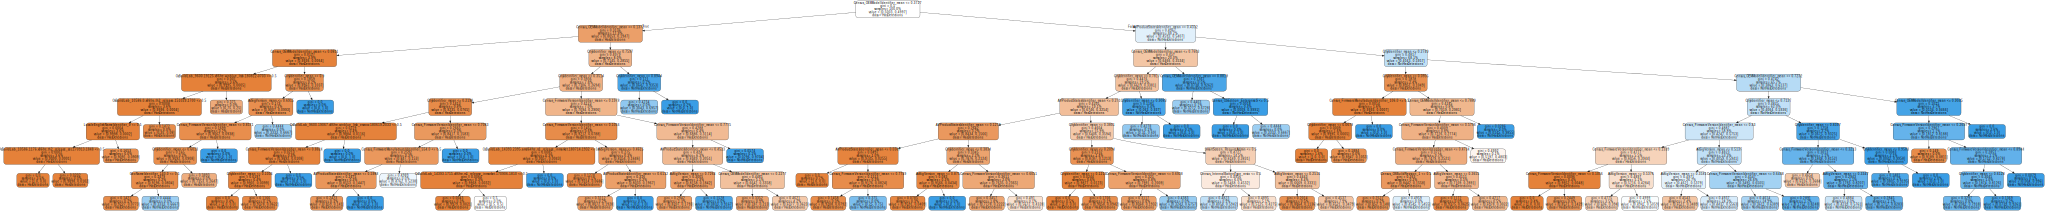

In [1058]:
dot_data = export_graphviz(
                        decision_tree = dt,
                        # out_file=None,
                        # max_depth=None,
                        feature_names=X_test.columns,
                        class_names=['HasDetections', 'NotHasDetections'],
                        # label='all',
                        filled=True,
                        # leaves_parallel=False,
                        impurity=True,
                        # node_ids=False,
                        proportion=True,
                        rotate=False,
                        rounded=True,
                        # special_characters=False,
                        precision=4,
                        )

graph = graphviz.Source(dot_data)
graph

En el arbol se logra ver que la variable más relevante es Census_OEMModelIdentifier. En segundo lugar AVProductStatesIdentifier.

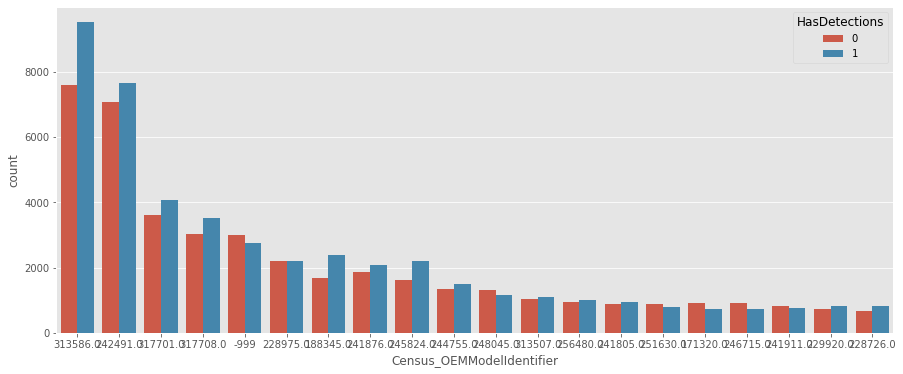

In [1059]:
plt.figure(figsize= [15, 6])
sns.countplot(data=df, x='Census_OEMModelIdentifier', hue='HasDetections', order=pd.value_counts(df['Census_OEMModelIdentifier']).iloc[:20].index)

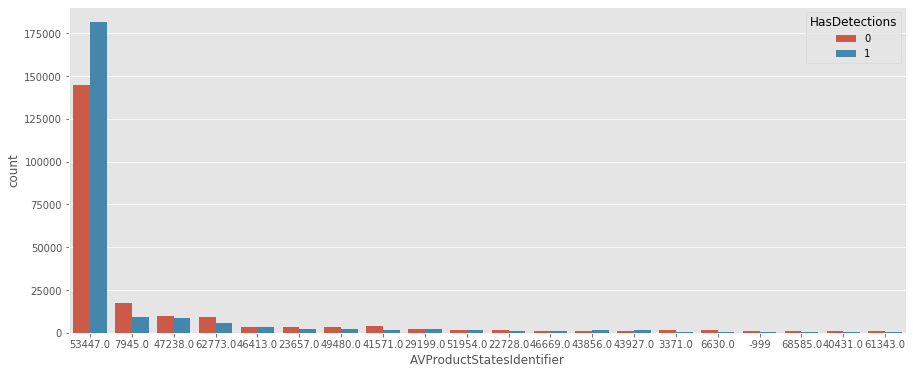

In [1060]:
plt.figure(figsize= [15, 6])
sns.countplot(data=df, x='AVProductStatesIdentifier', hue='HasDetections', order=pd.value_counts(df['AVProductStatesIdentifier']).iloc[:20].index)

### Model evaluation

#### Matriz de Confusión

In [1061]:
y_test_pred = pd.DataFrame(dt.predict(X_test), index=y_test.index, columns=['DetectionsPrediction'])

In [1062]:
y_val_pred = pd.DataFrame(dt.predict(val_df_X), index=val_df_y.index, columns=['DetectionsPrediction'])

In [1063]:
y_test_pred.head()

,DetectionsPrediction
28915,1
25836,1
49390,1
184384,1
392701,1


In [1064]:
y_val_pred.head()

,DetectionsPrediction
104241,1
199676,1
140199,1
132814,0
408697,1


In [1067]:
results_test_df = y_test.join(y_test_pred)

In [1068]:
results_val_df = y_test.join(y_test_pred)

Hacemos la matriz de confusión

In [419]:
confusion_matrix(y_test, y_test_pred, labels=None, sample_weight=None)

array([[40226, 19832],
       [17193, 42749]], dtype=int64)

Obtenemos los valores de accuracy

Test

In [1072]:
metrics.accuracy_score(y_test, y_test_pred)

0.6797833333333333

Validación

In [1073]:
metrics.accuracy_score(val_df_y, y_val_pred)

0.68002

Interesante ver que el valor en validación da mayor que en test.

#### F1 Score

Test

In [1075]:
metrics.f1_score(y_test, y_test_pred)

0.7126512420920389

Validación

In [1078]:
metrics.f1_score(val_df_y, y_val_pred)

0.7134849570200574

Interesante ver que el valor en validación da mayor que en test.

#### Roc AUC Score

Test

In [1080]:
print(metrics.roc_auc_score(results_test_df['HasDetections'], results_test_df['DetectionsPrediction']))

0.6798945392125638


Validación

In [1081]:
print(metrics.roc_auc_score(results_val_df['HasDetections'], results_val_df['DetectionsPrediction']))

0.6798945392125638


#### Otras validaciones

In [1087]:
results_test_df['Success'] = (results_test_df['HasDetections'] == results_test_df['DetectionsPrediction']).astype(int)

In [1089]:
results_test_df['Success'].mean()

0.6797833333333333

In [1090]:
y_score = pd.DataFrame(dt.predict_proba(X_test)[:,1], index=y_test.index, columns=['DetectionsScore'])

In [1095]:
results_test_df = results_test_df.join(y_score)

In [1096]:
results_test_df.head(10)

,HasDetections,DetectionsPrediction,Success,DetectionsScore
28915,1,1,1,0.56
25836,1,1,1,0.64
49390,0,1,0,0.64
184384,1,1,1,0.56
392701,1,1,1,1.00
238687,1,1,1,0.64
370799,1,1,1,0.56
176805,0,0,1,0.00
61303,0,0,1,0.00
260001,0,0,1,0.35


In [1104]:
results_test_df.pivot_table(index='DetectionsScore', values='Success', aggfunc=[len, sum, np.mean])

,len,sum,mean
,Success,Success,Success
DetectionsScore,,,
0.00,8654,8647,1.00
0.00,391,388,0.99
0.01,40,39,0.97
0.04,343,325,0.95
0.06,75,67,0.89
0.06,42,38,0.90
0.07,85,74,0.87
0.08,256,234,0.91


In [1100]:
results_by_score = results_test_df.pivot_table(index='DetectionsScore', values='Success', aggfunc=[len, sum, np.mean])

In [1101]:
results_by_score.columns = ['Count', 'Sum', 'Mean']

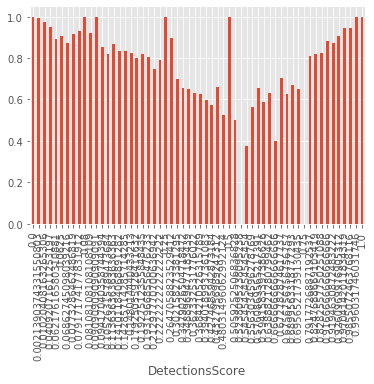

In [1102]:
results_by_score['Mean'].plot(kind='bar')

ROC curve

In [442]:
fpr, tpr, _ = metrics.roc_curve(results_df['HasDetections'], results_df['DetectionsScore'])

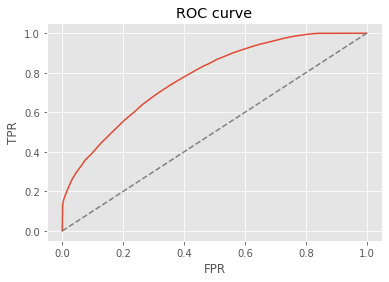

In [443]:
plt.clf()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()